In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import gc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
# Load dataset
from keras.datasets import mnist
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, PReLU, Activation, MaxPooling2D
import tensorflow.keras.initializers 
import random
random.seed(666)
np.random.seed(666)
tf.random.set_seed(666)

In [2]:
# Split the dataset
(X_train , y_train) , (X_test , y_test)=mnist.load_data()
# Shape of the dataset
print(X_train.shape , y_train.shape)
# Reshape of the dataset
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train=X_train/255
X_test=X_test/255

In [4]:
print('X_train.shape', X_test.shape)
print(X_train.shape[0],'Train Sample')
print(X_test.shape[0],'Test Sample')

X_train.shape (10000, 28, 28, 1)
60000 Train Sample
10000 Test Sample


In [5]:
initializers=[ 
    {'class_name': 'RandomNormal', 'config': {"seed":666}},
    {'class_name': 'RandomUniform', 'config': {"seed":666}}, 
    {'class_name': 'TruncatedNormal', 'config': {"seed":666}}, 
    'Zeros',
    'Ones',
    {'class_name': 'GlorotNormal', 'config': {"seed":666}},
    { 'class_name': 'GlorotUniform', 'config': {"seed":666}}, 
    { 'class_name': 'HeNormal', 'config': {"seed":666}},
    { 'class_name': 'HeUniform', 'config': {"seed":666}},
    {'class_name': 'Orthogonal', 'config': {"seed":666}}] 

activation=[
    'relu',
    'sigmoid',
    'tanh'
]    

In [6]:
def learning_curves(history, title):
    '''The function plots learning curves of specific model '''
    H = history
    plt.plot(H['accuracy'], label = 'acc')
    plt.plot(H['val_accuracy'], label = 'val_acc')
    plt.plot(H['loss'], label = 'loss')
    plt.plot(H['val_loss'], label = 'val_loss')
    plt.title(f'{title} learning curves')
    plt.grid(); plt.legend()
    
def plot_weights(model,title):
    '''Plot weights of model layers'''
    for layer in model.layers:
        weights = layer.get_weights()
        if weights:
            ax.hist(weights[0].flatten(), bins = 100, label = layer.name, alpha = 0.5)
        plt.legend()
        plt.title(title)
    plt.yscale('log')

In [7]:
def create_model(act,init):
  model = Sequential()
  model.add(Conv2D(32, 3, input_shape = (28, 28, 1), kernel_initializer = init, padding = 'same',activation=act))
  model.add(Conv2D(32, 3, kernel_initializer = init,activation=act, padding = 'same'))
  model.add(MaxPooling2D())

  model.add(Conv2D(64, 3, kernel_initializer = init,activation=act, padding = 'same'))
  model.add(Conv2D(64, 3, kernel_initializer = init,activation=act, padding = 'same'))
  model.add(MaxPooling2D())

  model.add(Flatten())
  model.add(Dense(128, kernel_initializer = init,activation=act))
  model.add(Dense(10, activation = 'softmax', kernel_initializer = init))

  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

In [8]:
all_models=[]
for act in activation:
  models=[]
  for cfg in initializers:
    models.append(create_model(act,cfg))
  all_models.append(models)  

In [9]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)

train for 8 epochs

____________________ <keras.engine.sequential.Sequential object at 0x7f4369846f10> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9929


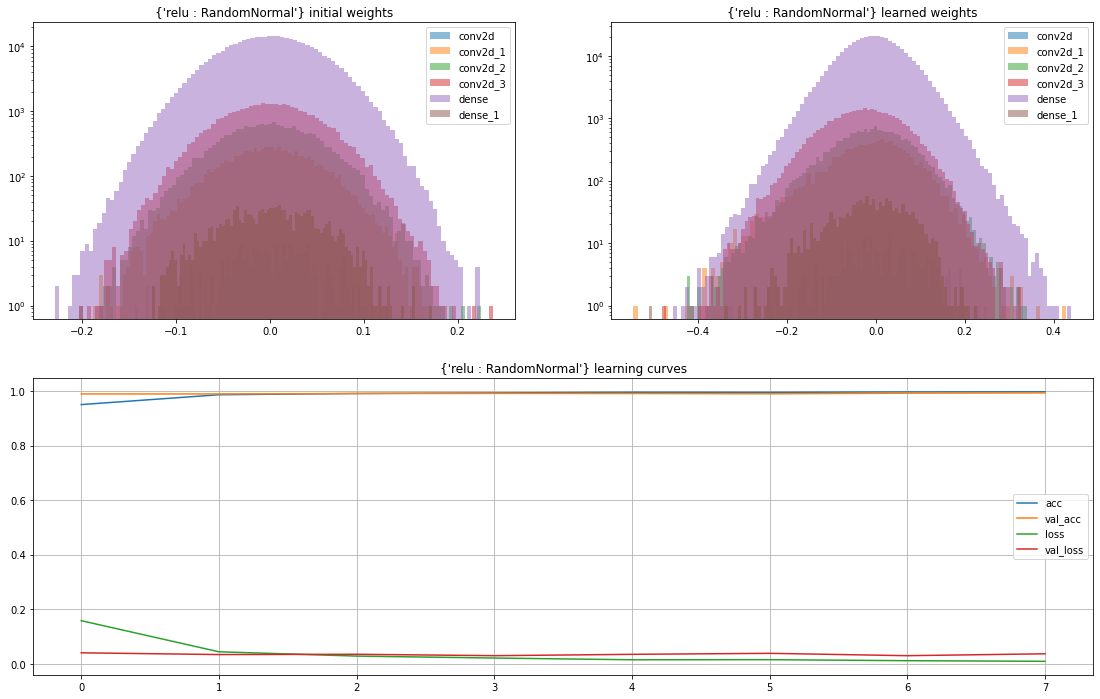

____________________ <keras.engine.sequential.Sequential object at 0x7f43d5331e90> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9914


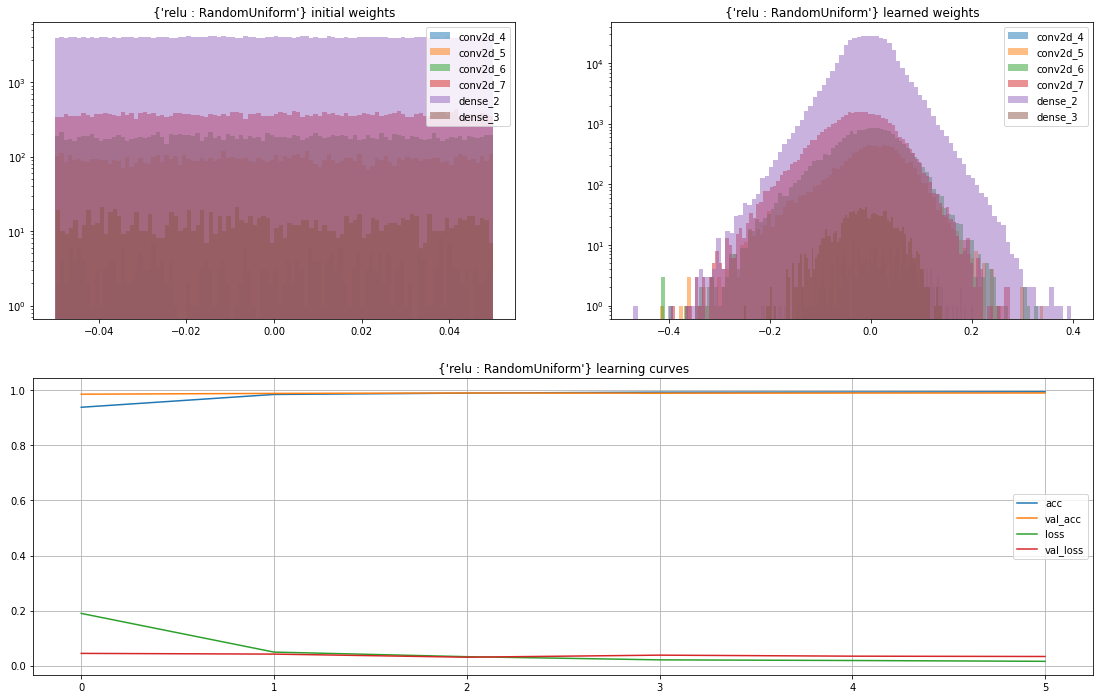

____________________ <keras.engine.sequential.Sequential object at 0x7f42ec0fa210> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9914


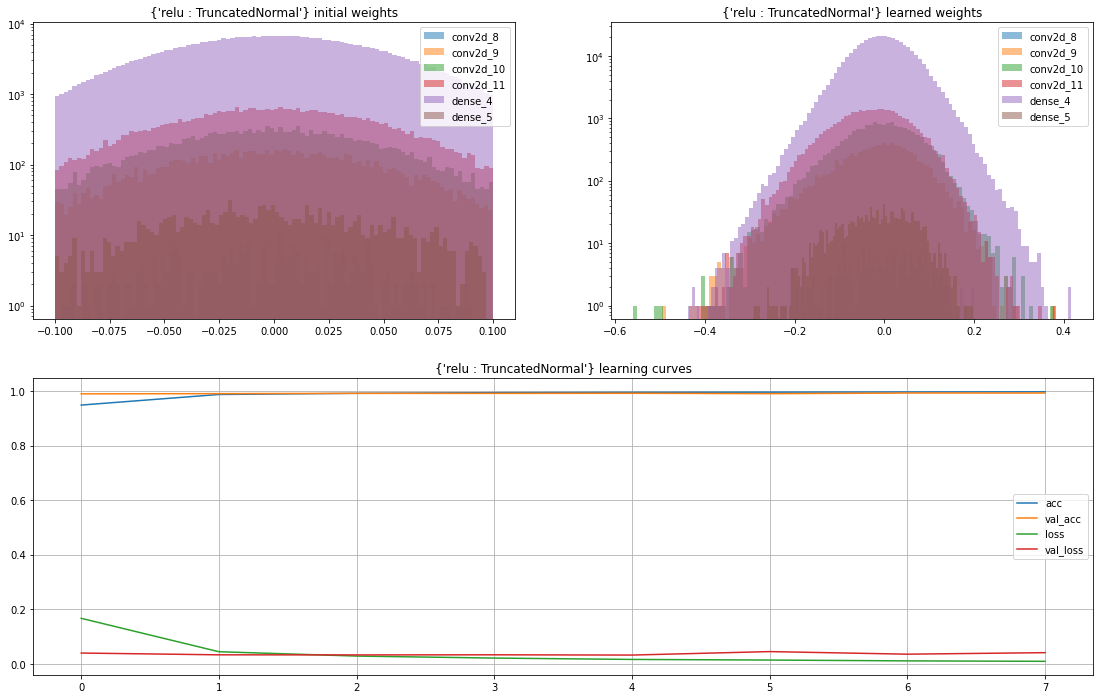

____________________ <keras.engine.sequential.Sequential object at 0x7f42ec0360d0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1135


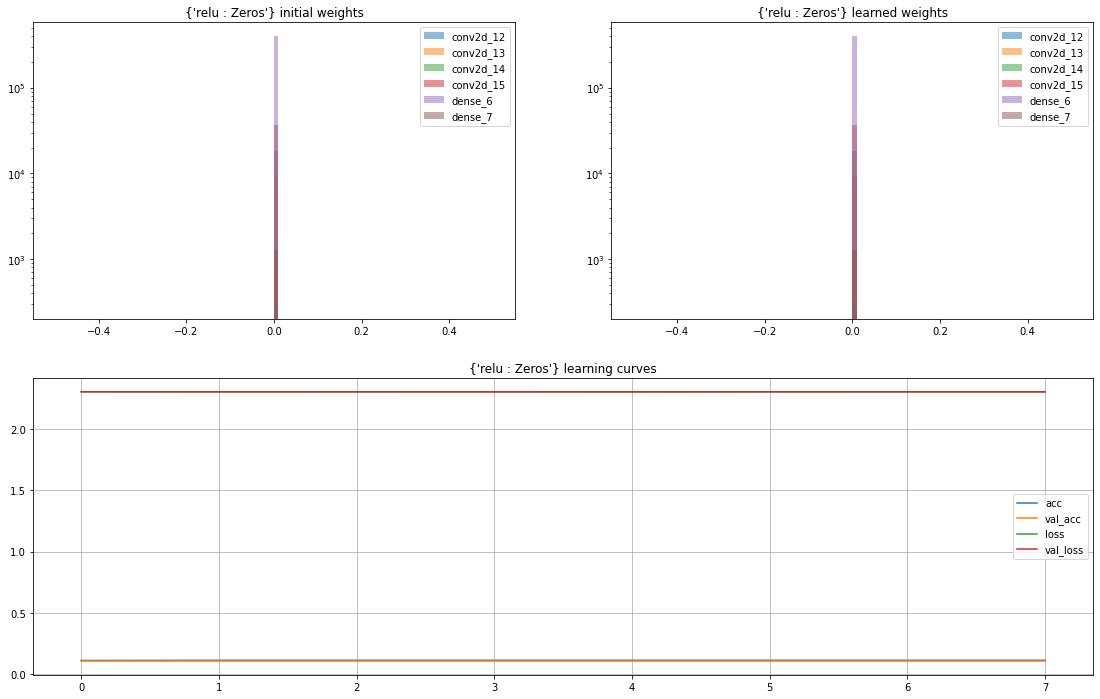

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7bd8590> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 3019125.0000 - accuracy: 0.0958


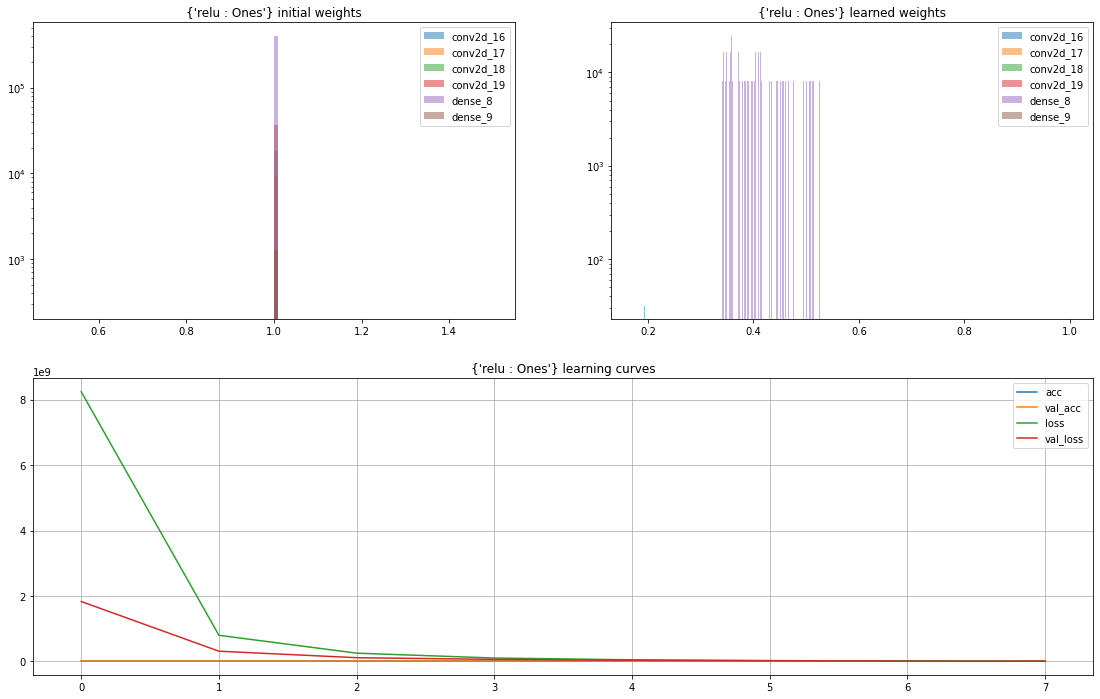

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7b77e10> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9910


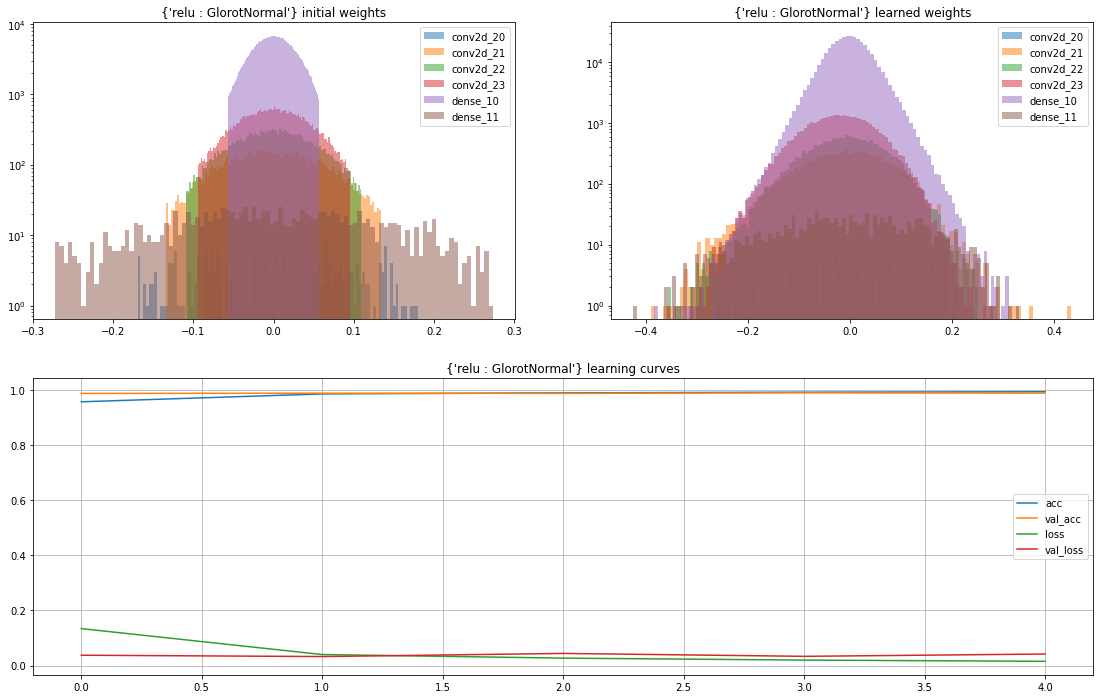

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7ba0f90> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9912


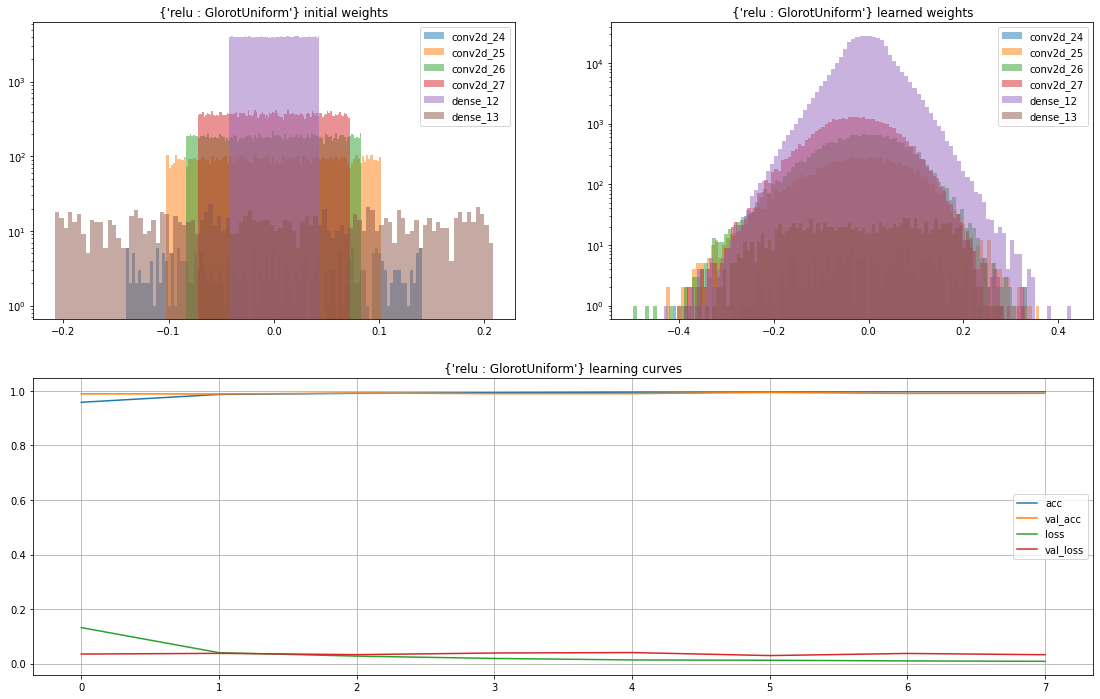

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7b5e450> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9912


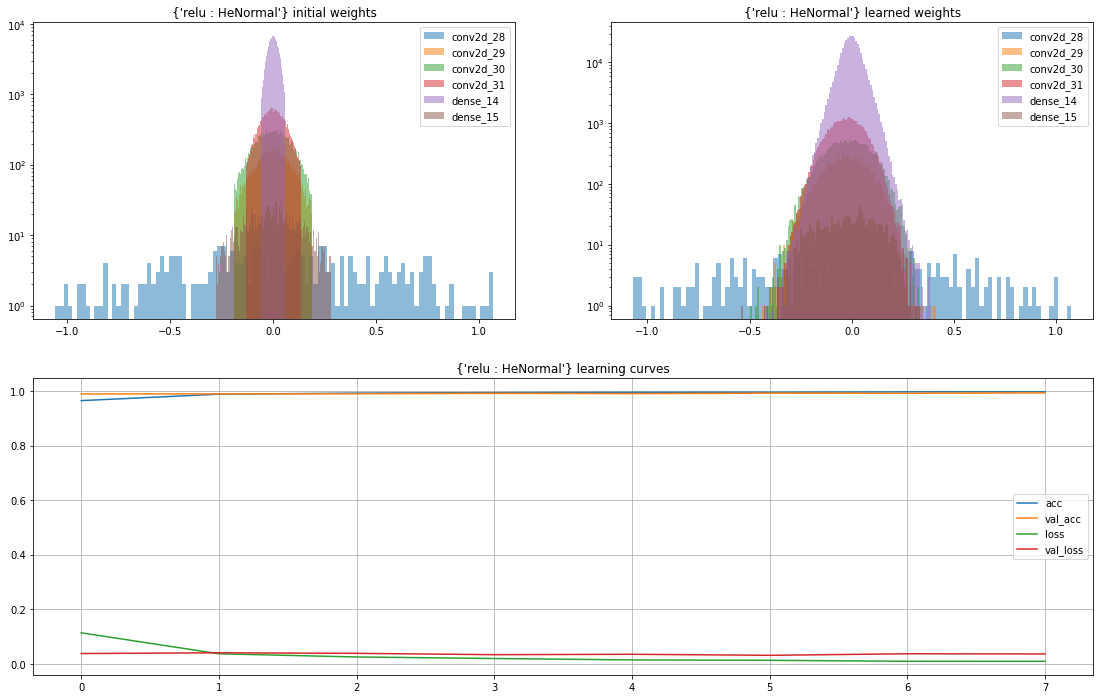

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7b02250> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9924


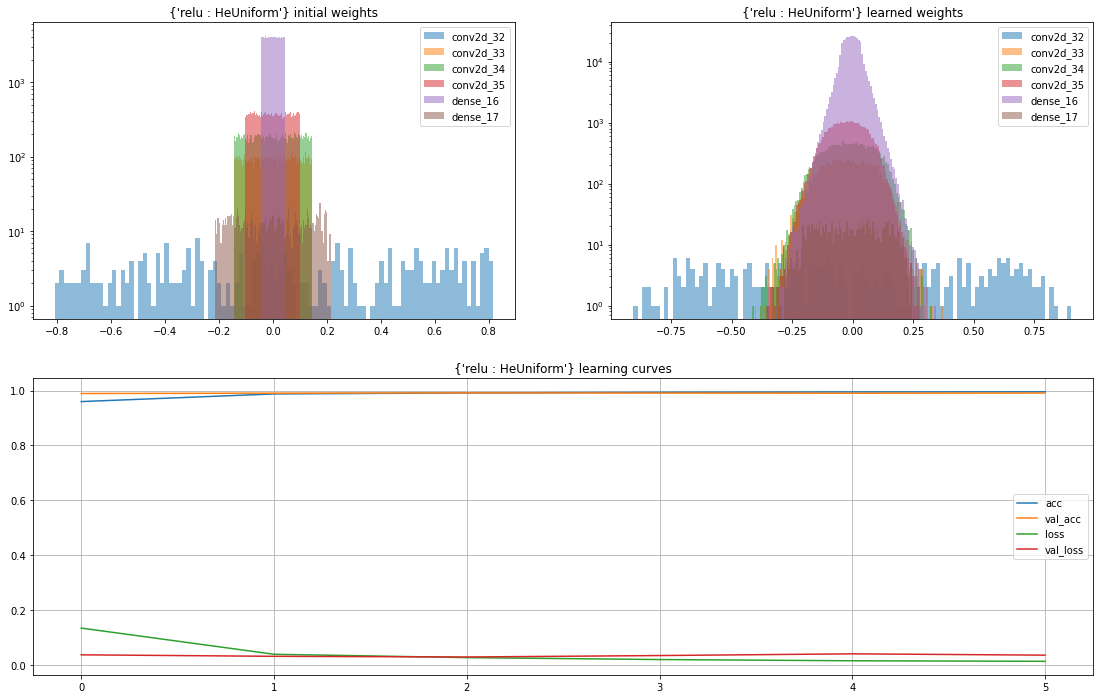

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7b77410> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9902


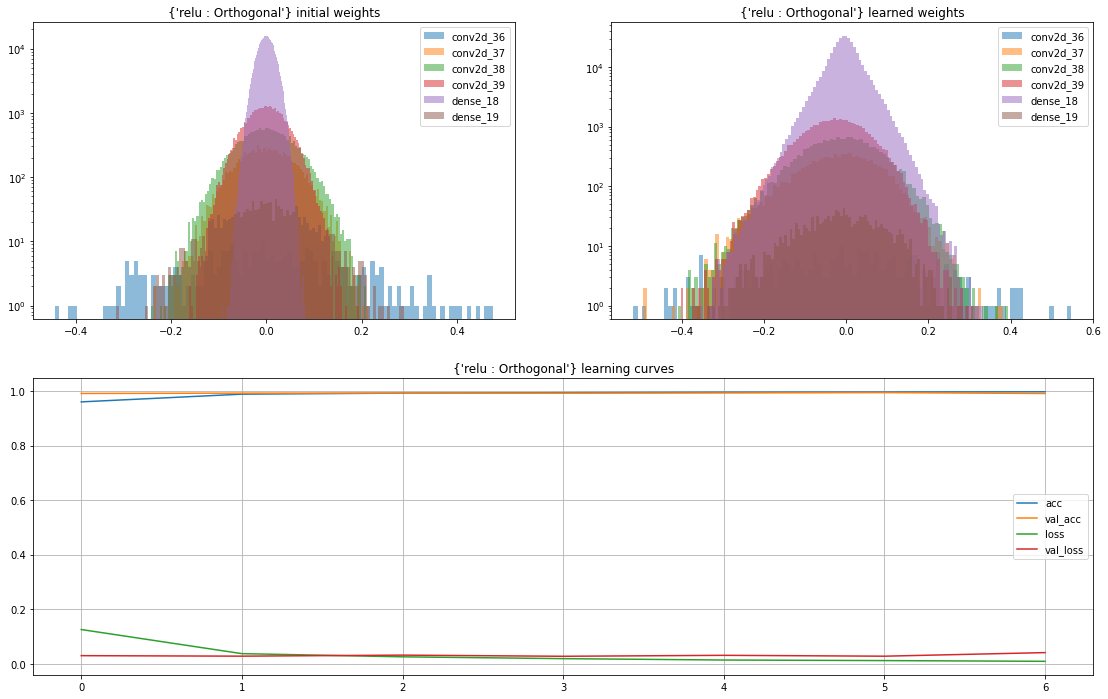

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7a78450> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3039 - accuracy: 0.1032


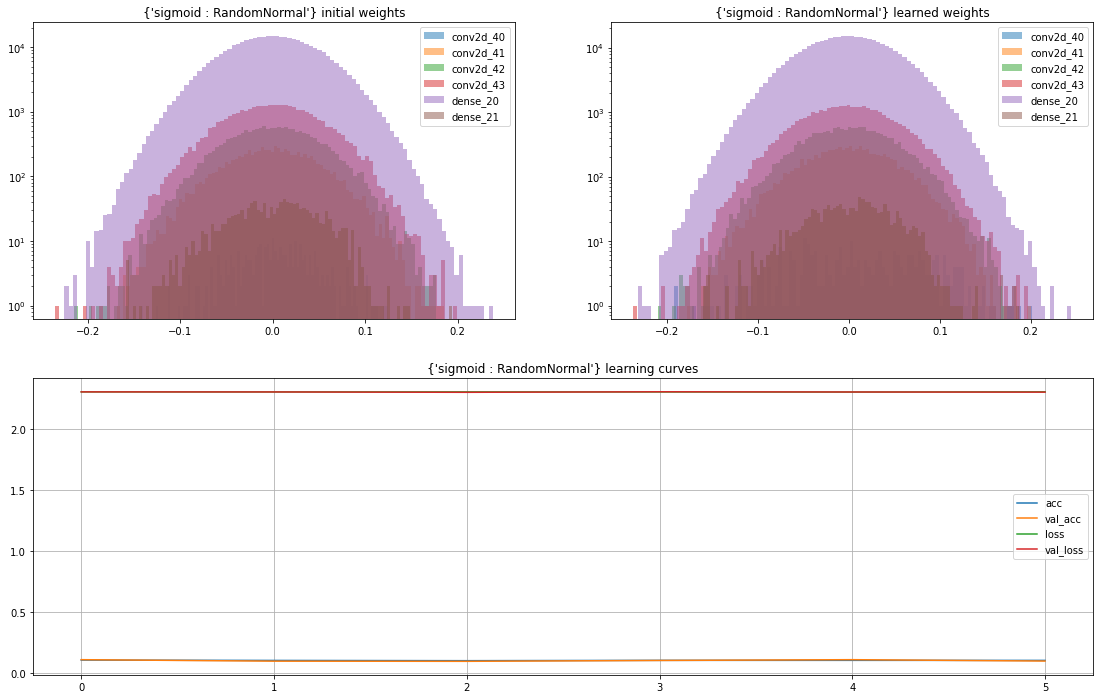

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7a38c50> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9885


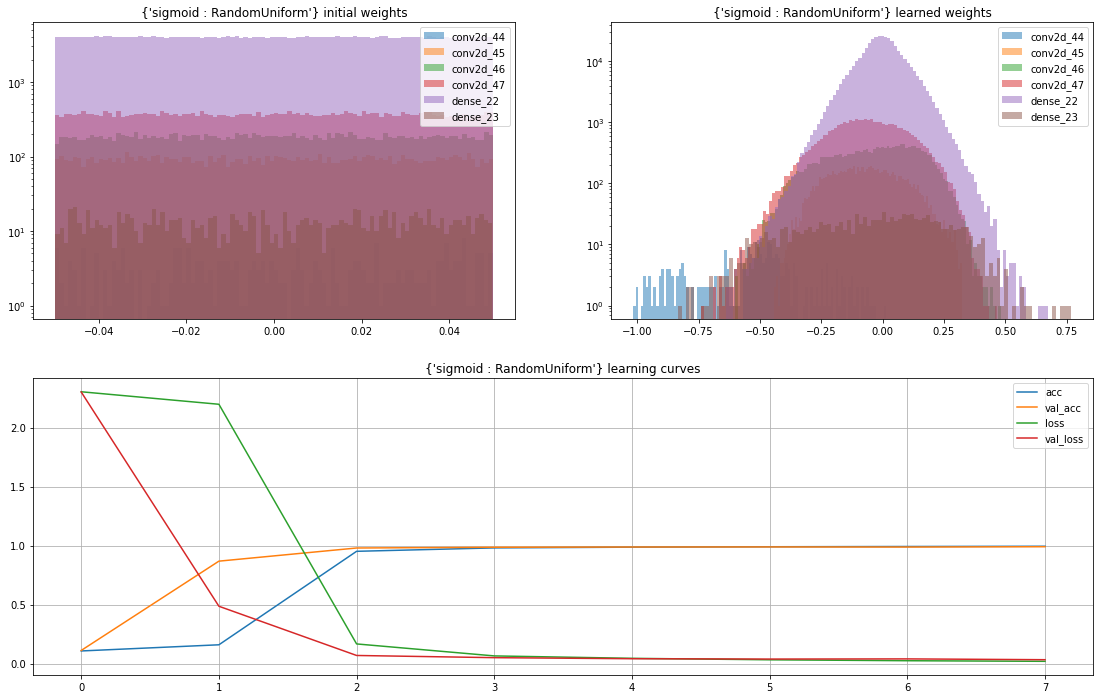

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7a5bc10> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3040 - accuracy: 0.1010


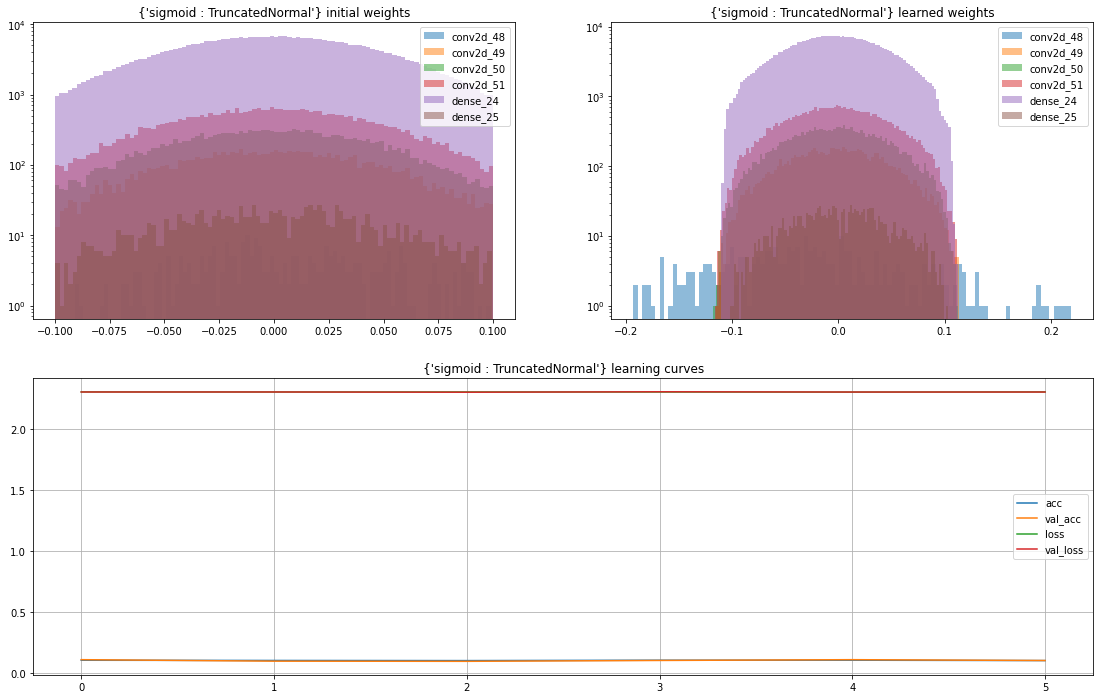

____________________ <keras.engine.sequential.Sequential object at 0x7f42d79fd410> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1135


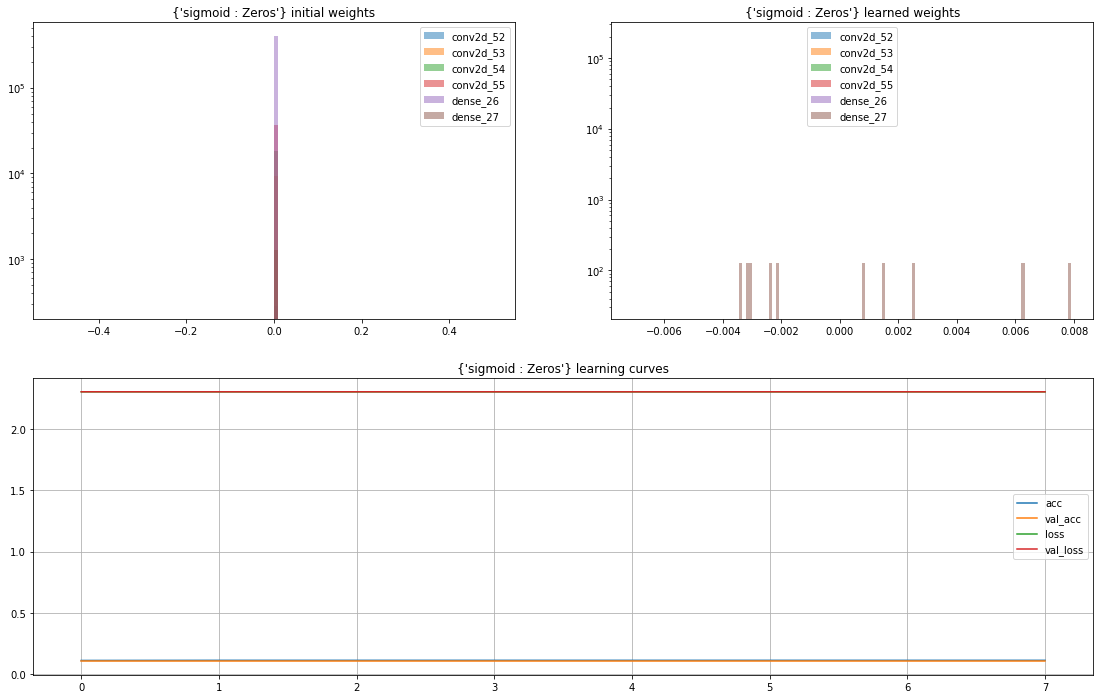

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7a12b50> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3143 - accuracy: 0.0974


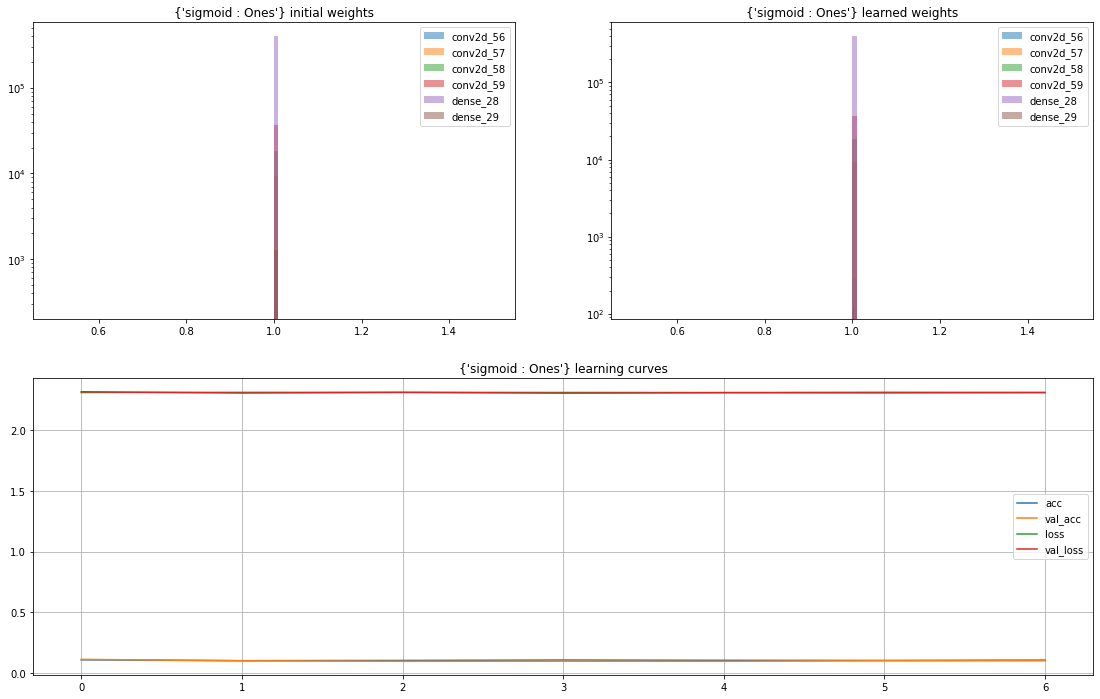

____________________ <keras.engine.sequential.Sequential object at 0x7f42d79df150> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9909


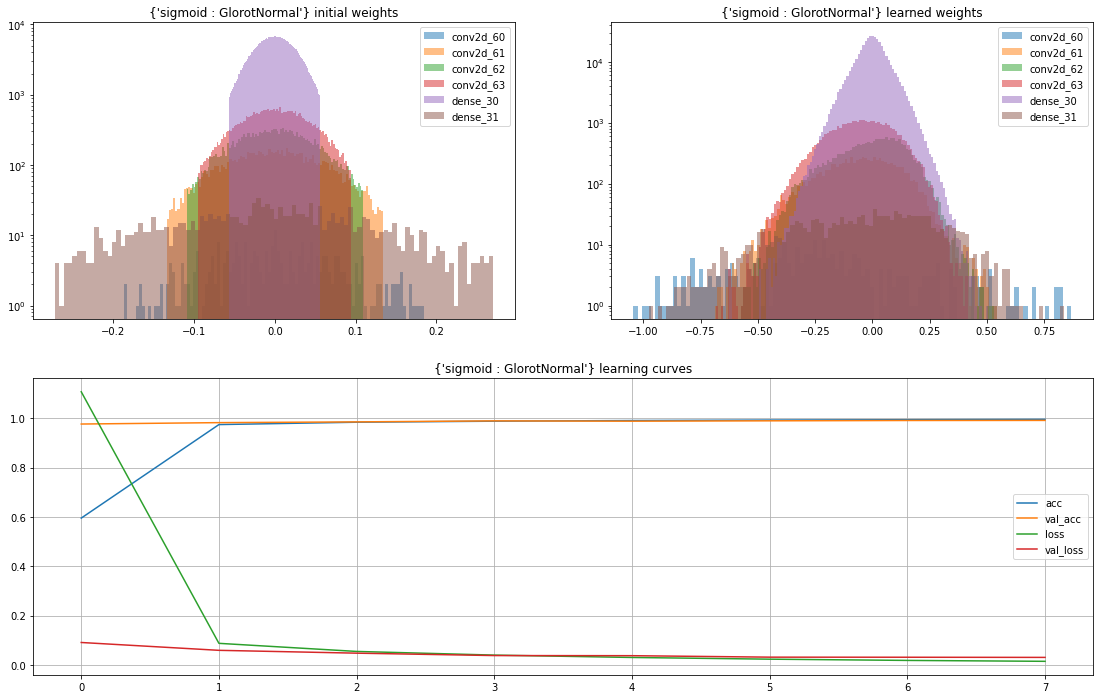

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7995dd0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9871


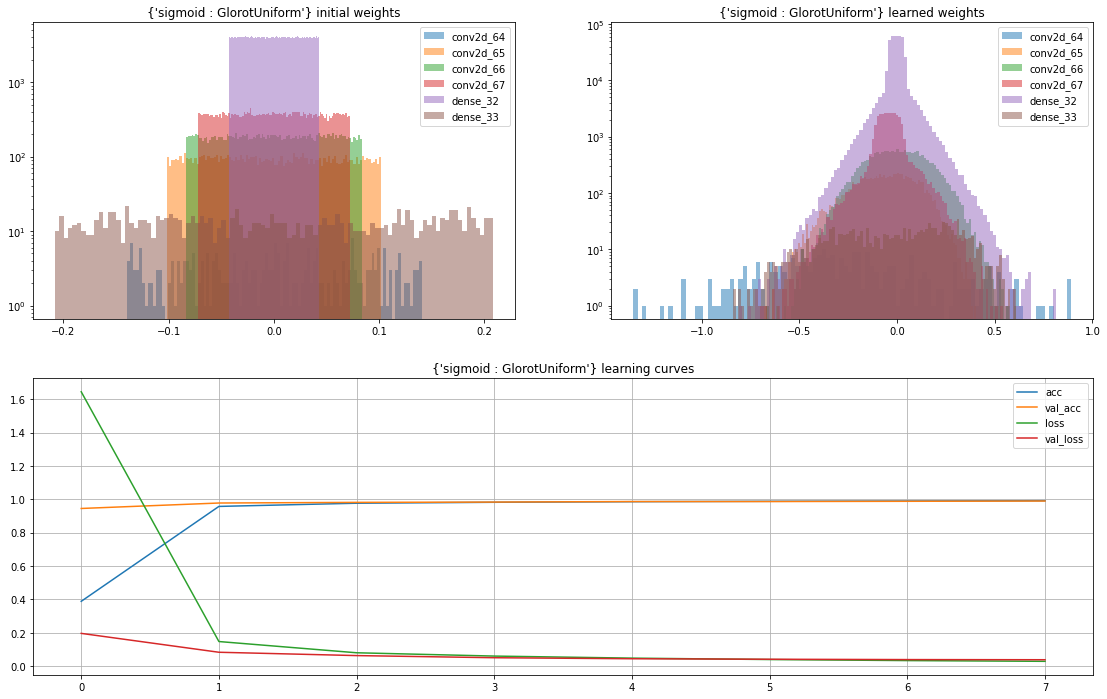

____________________ <keras.engine.sequential.Sequential object at 0x7f42d79cd9d0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9899


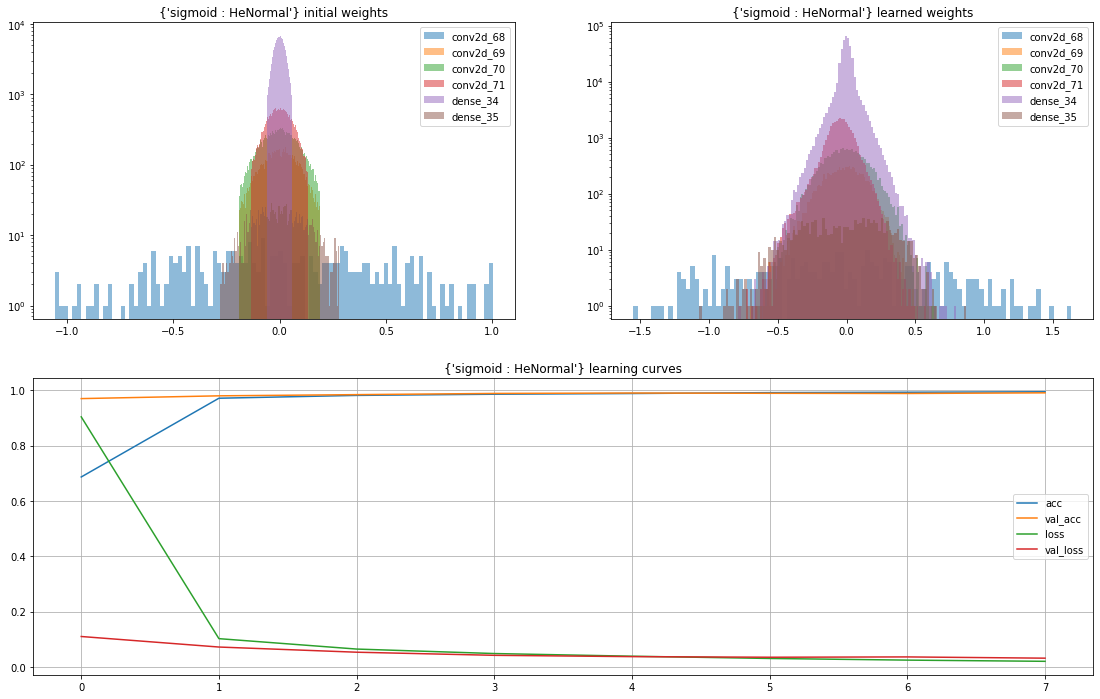

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7937690> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0256 - accuracy: 0.9918


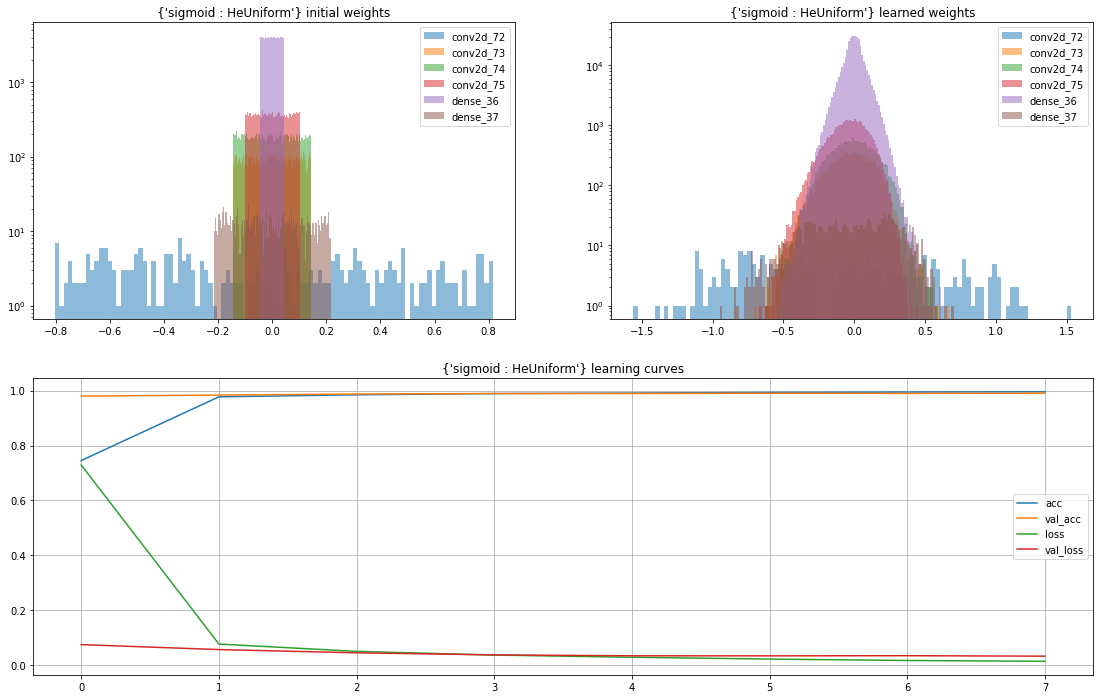

____________________ <keras.engine.sequential.Sequential object at 0x7f42d79df8d0> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0396 - accuracy: 0.9864


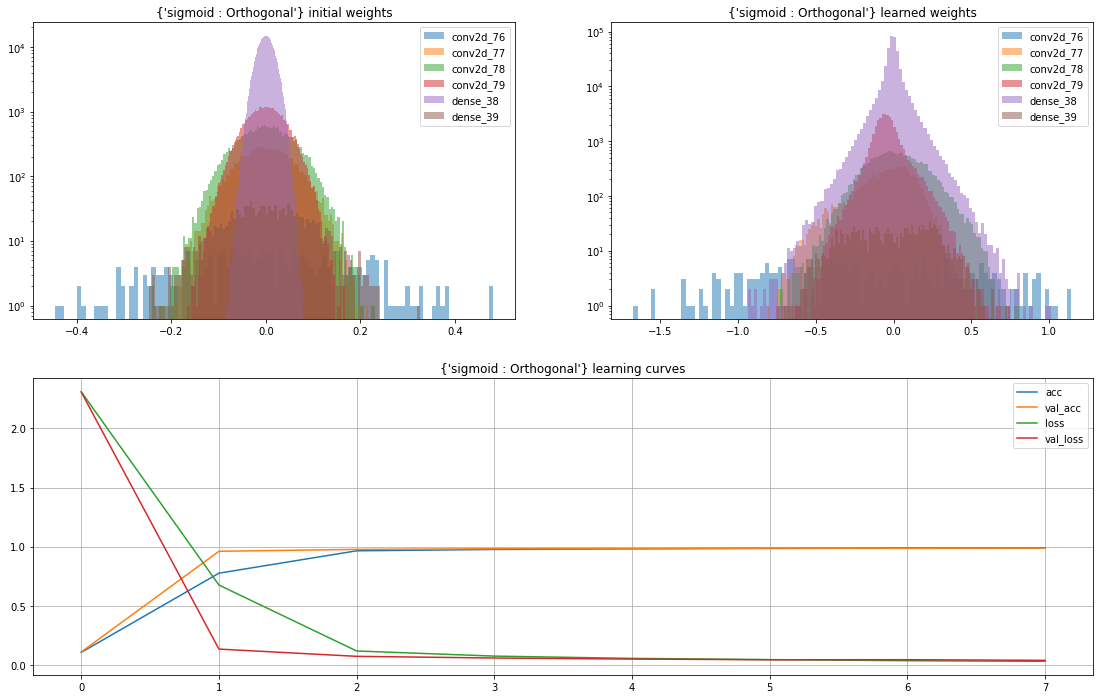

____________________ <keras.engine.sequential.Sequential object at 0x7f42d78da3d0> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0346 - accuracy: 0.9882


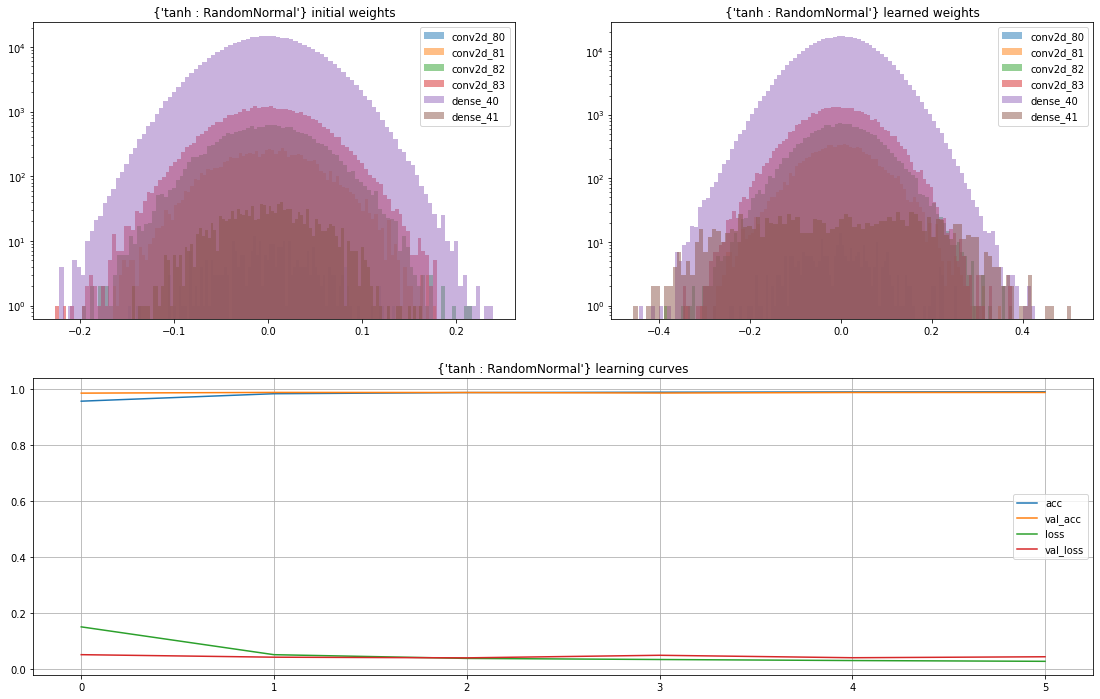

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7986350> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9884


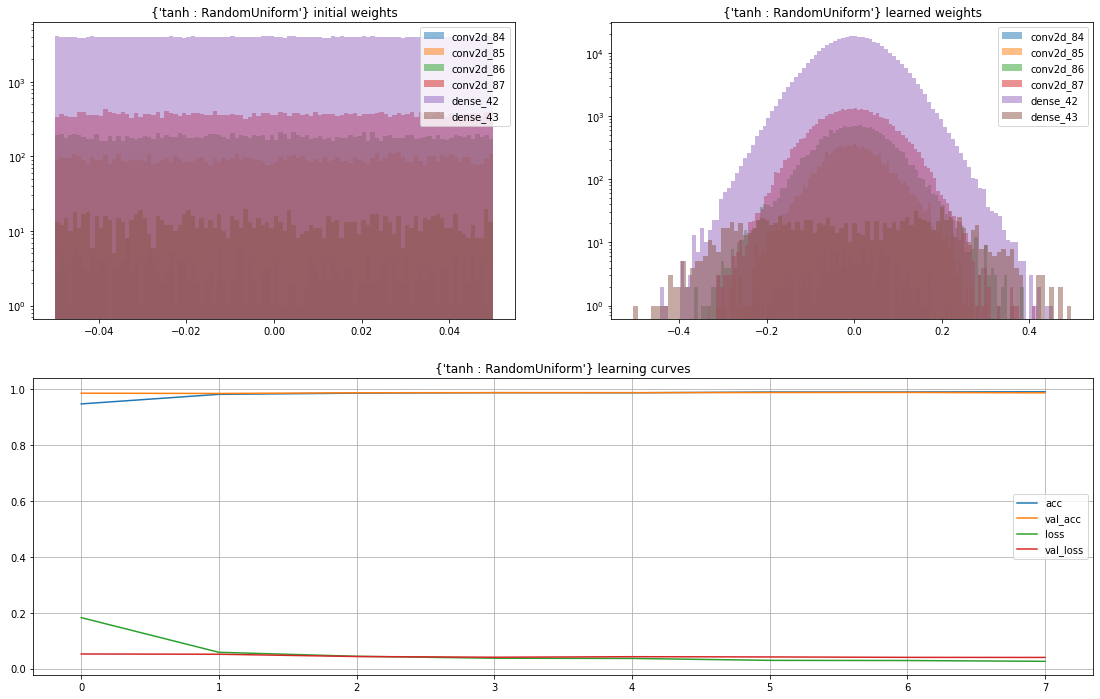

____________________ <keras.engine.sequential.Sequential object at 0x7f42d786f150> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0304 - accuracy: 0.9908


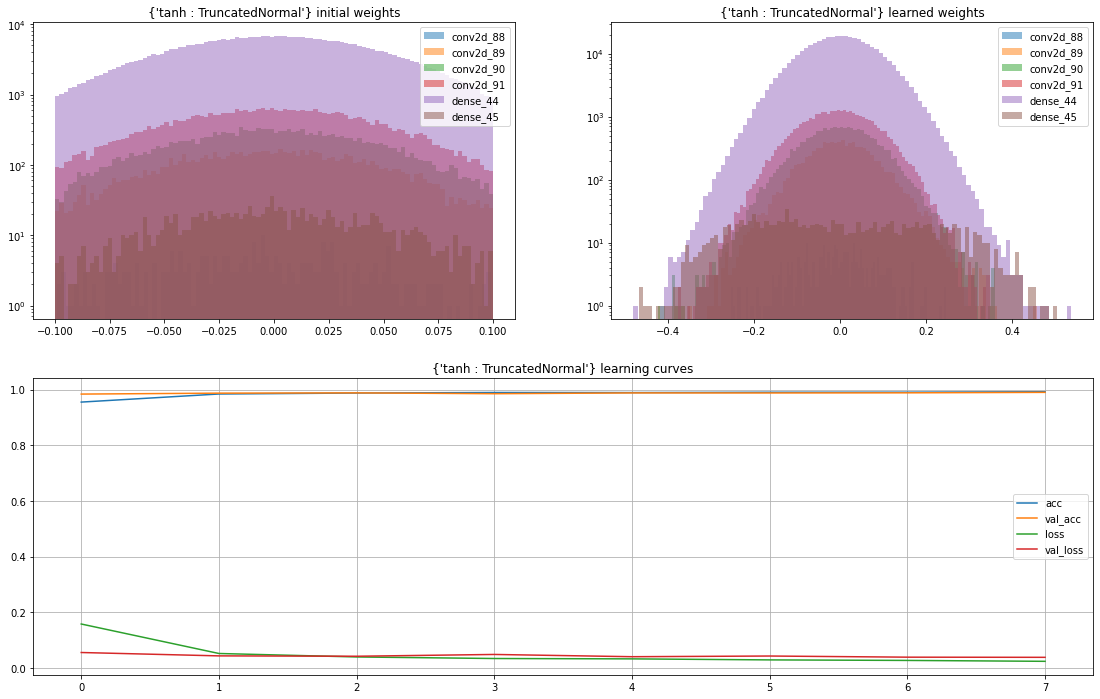

____________________ <keras.engine.sequential.Sequential object at 0x7f42d782f810> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1135


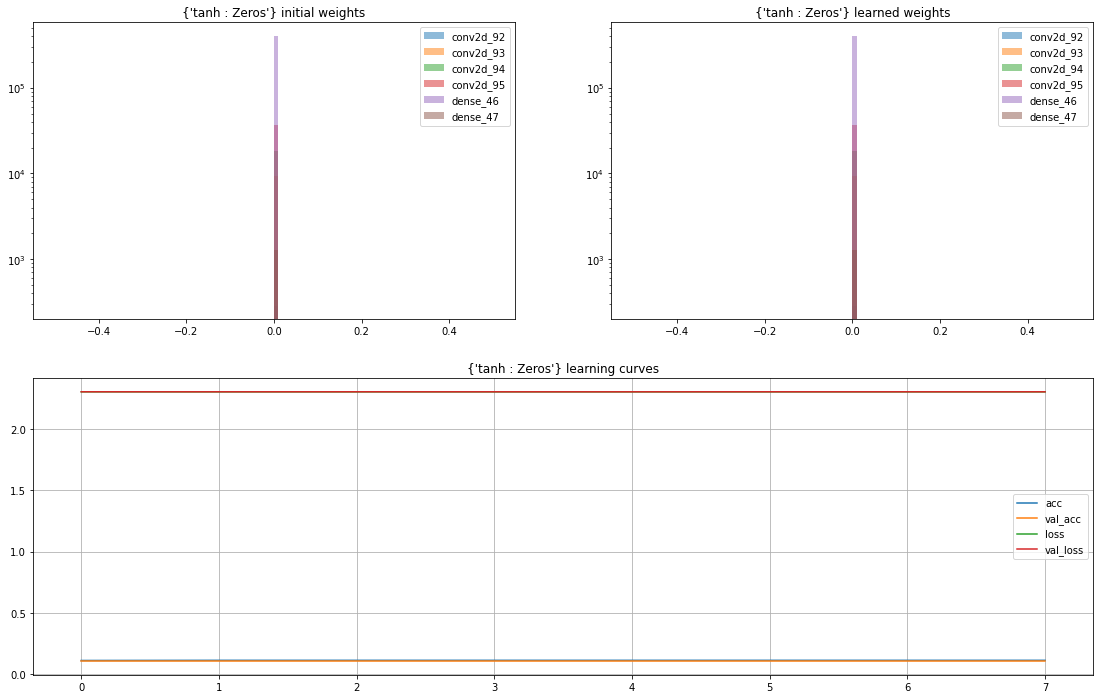

____________________ <keras.engine.sequential.Sequential object at 0x7f42d783cb10> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 2.3143 - accuracy: 0.0974


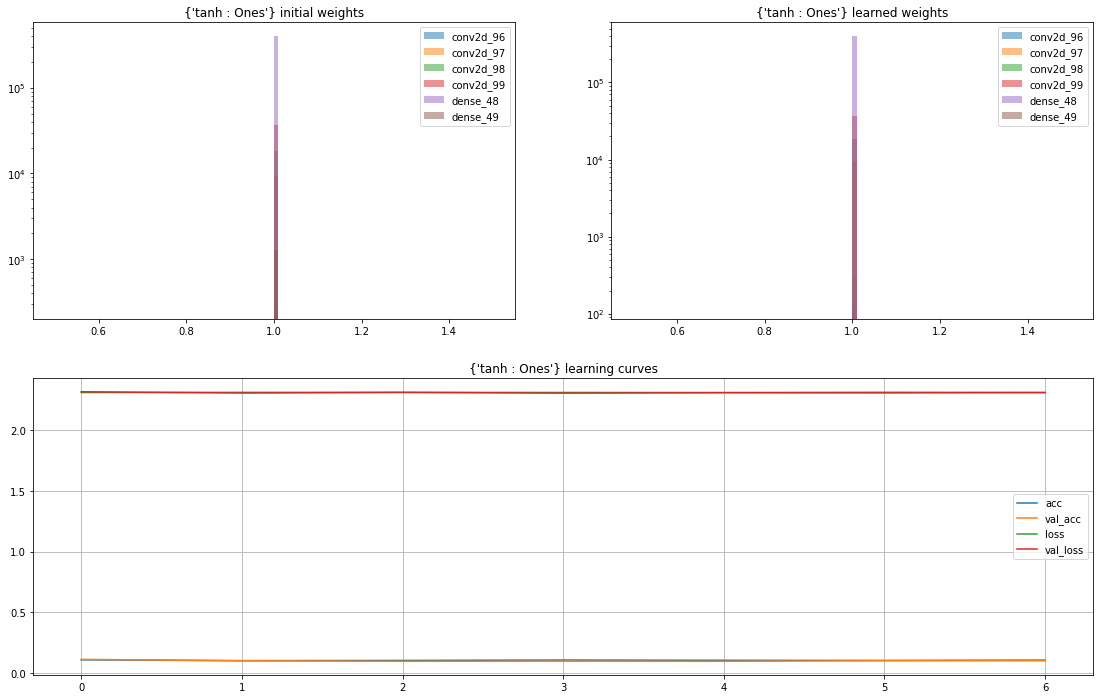

____________________ <keras.engine.sequential.Sequential object at 0x7f42ec036fd0> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9880


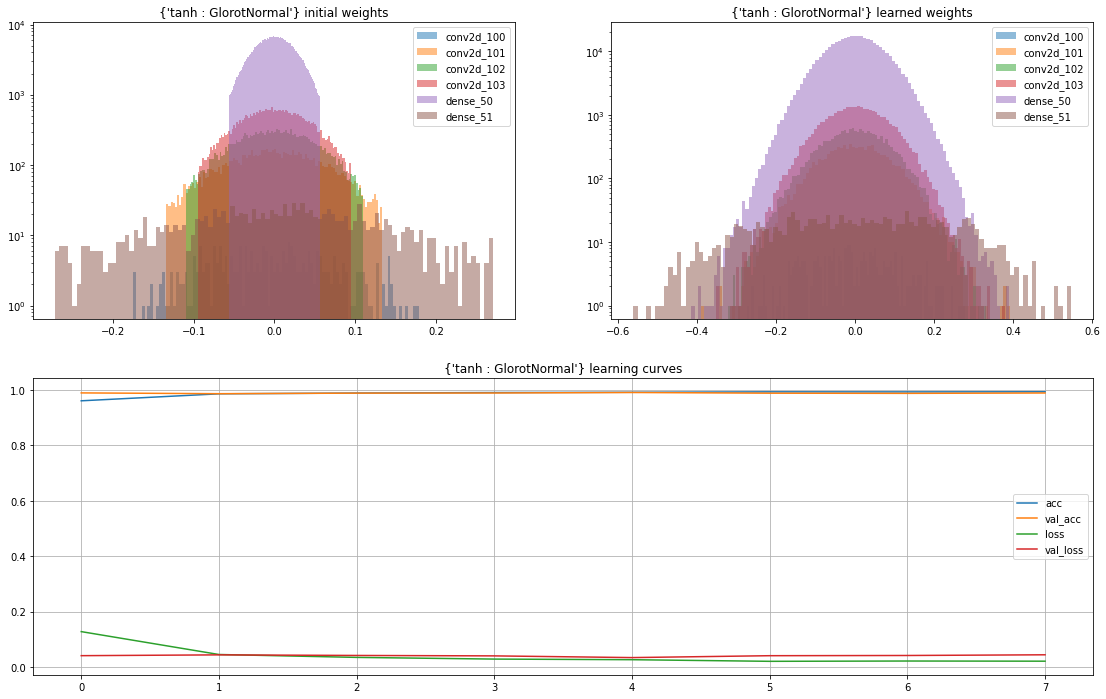

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7acc750> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0355 - accuracy: 0.9883


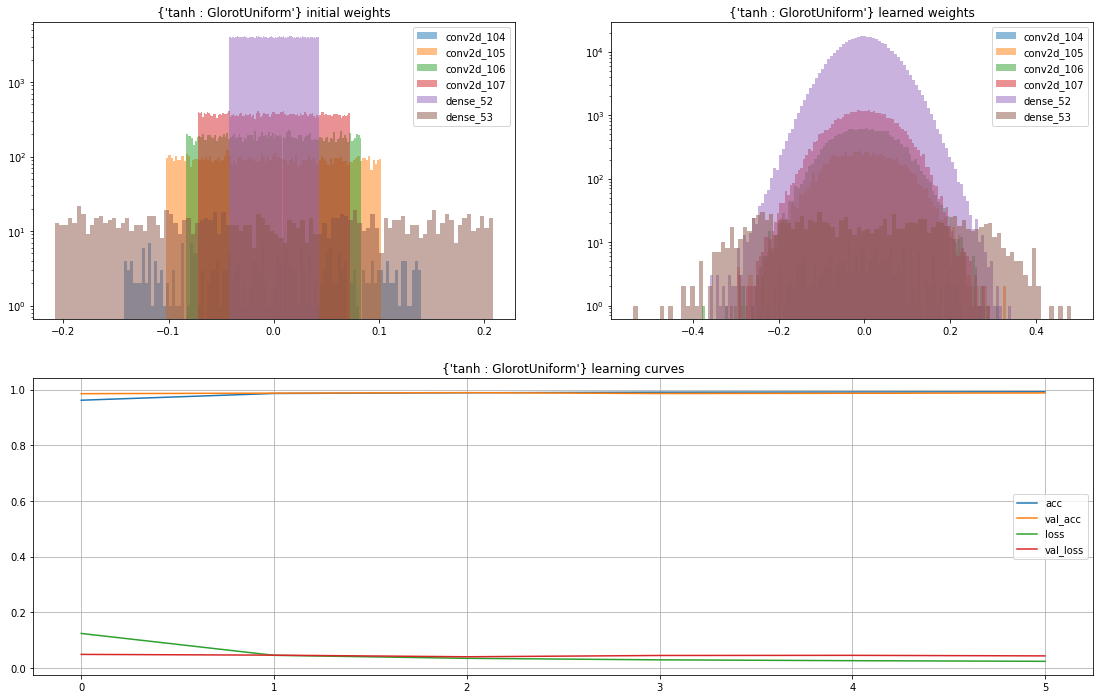

____________________ <keras.engine.sequential.Sequential object at 0x7f42d7a0ea50> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0404 - accuracy: 0.9871


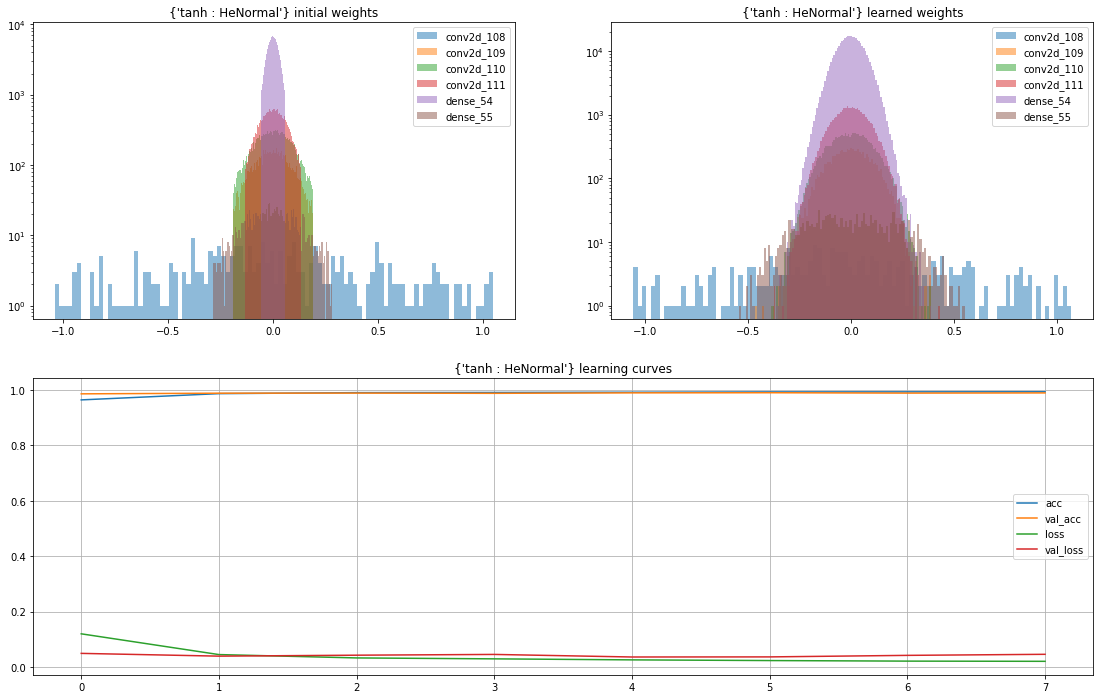

____________________ <keras.engine.sequential.Sequential object at 0x7f42d78e6510> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9889


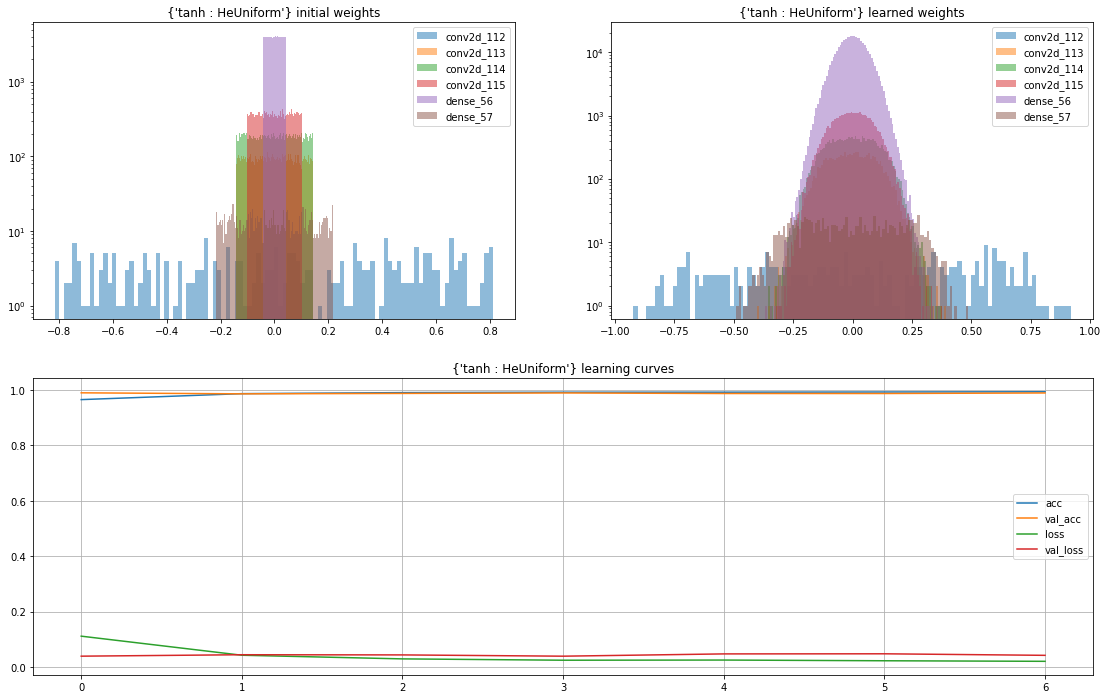

____________________ <keras.engine.sequential.Sequential object at 0x7f42ec01b810> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0310 - accuracy: 0.9891


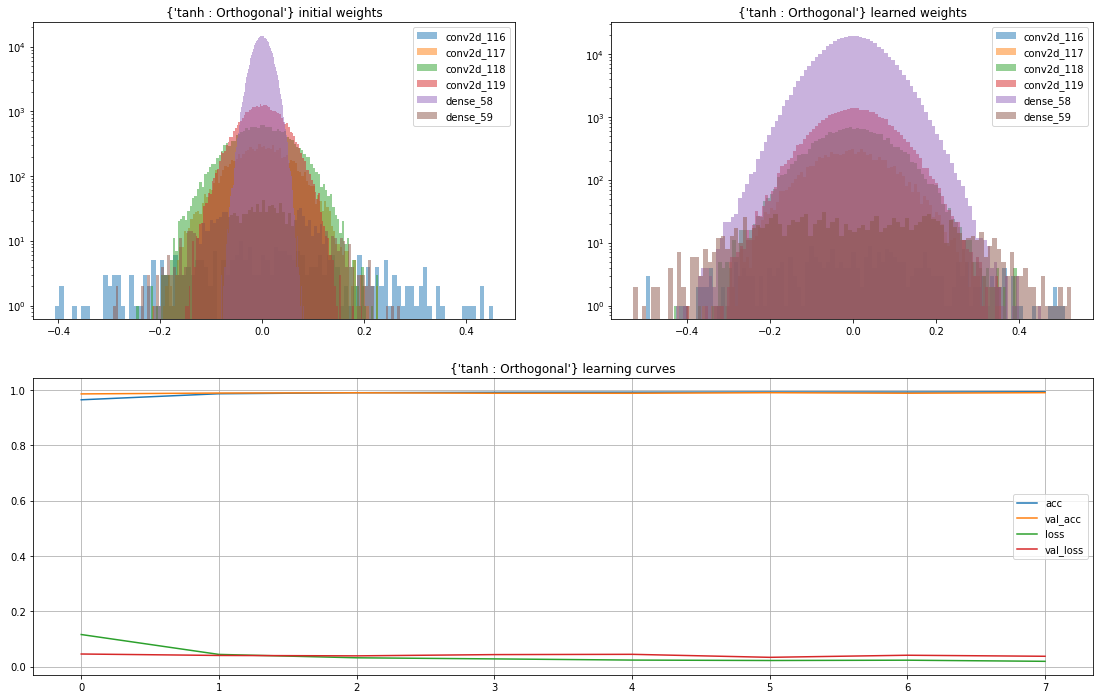

In [11]:
all_evalutes=[]
for i,Lst in enumerate(all_models):
  evalutes=[]
  for j,model in enumerate(Lst):
    if("class_name" in initializers[j]):
      title={activation[i]+" : "+initializers[j]["class_name"]}
    else:
      title={activation[i]+" : "+initializers[j]} 
      
    print('_'*20, model, '_'*20) # Print model name to separate plots

    # Creating plot of layers weights before train process
    fig = plt.figure(figsize = (19, 12))
    gs = gridspec.GridSpec(2, 2)
    ax = fig.add_subplot(gs[0, 0])
    plot_weights(model,f'{title} initial weights')

    # Training model
    history=model.fit(X_train, y_train, epochs = 8, batch_size = 64, validation_split = 0.1, verbose = 0,callbacks=[es])

    # Predicting test data and creating submission file
    eva = model.evaluate(X_test,y_test)
    evalutes.append(eva)

    # Creating plot of layers weights after training process
    ax = fig.add_subplot(gs[0, 1])
    plot_weights(model,f'{title} learned weights')    

    # Plot learning curves
    ax = fig.add_subplot(gs[1, :])
    learning_curves(history.history, title)
    plt.show()
  all_evalutes.append(evalutes)
      

after 8 epochs

In [13]:
columns=['RandomNormal','RandomUniform',  'TruncatedNormal', 'Zeros','Ones','GlorotNormal','GlorotUniform', 'HeNormal','HeUniform','Orthogonal'] 

In [29]:
columns=['RandomNormal','RandomUniform',  'TruncatedNormal', 'Zeros','Ones','GlorotNormal','GlorotUniform', 'HeNormal','HeUniform','Orthogonal'] 
import pandas as pd
df_acc = pd.DataFrame(np.array(all_evalutes)[:,:,1], columns=columns,index=activation)
df_loss = pd.DataFrame(np.array(all_evalutes)[:,:,0], columns=columns,index=activation)


In [30]:
df_acc

RandomNormal  RandomUniform  TruncatedNormal   Zeros    Ones  \
relu           0.9929         0.9914           0.9914  0.1135  0.0958   
sigmoid        0.1032         0.9885           0.1010  0.1135  0.0974   
tanh           0.9882         0.9884           0.9908  0.1135  0.0974   

         GlorotNormal  GlorotUniform  HeNormal  HeUniform  Orthogonal  
relu           0.9910         0.9912    0.9912     0.9924      0.9902  
sigmoid        0.9909         0.9871    0.9899     0.9918      0.9864  
tanh           0.9880         0.9883    0.9871     0.9889      0.9891

In [31]:
df_loss

RandomNormal  RandomUniform  TruncatedNormal     Zeros          Ones  \
relu         0.026591       0.027601         0.029103  2.301003  3.019125e+06   
sigmoid      2.303879       0.035665         2.303975  2.301003  2.314321e+00   
tanh         0.034637       0.034707         0.030439  2.301003  2.314321e+00   

         GlorotNormal  GlorotUniform  HeNormal  HeUniform  Orthogonal  
relu         0.034604       0.028888  0.030775   0.029140    0.030613  
sigmoid      0.026971       0.037664  0.029167   0.025625    0.039598  
tanh         0.037996       0.035503  0.040362   0.035702    0.031049

train for 15 epochs

____________________ <keras.engine.sequential.Sequential object at 0x7f420256ad10> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9904


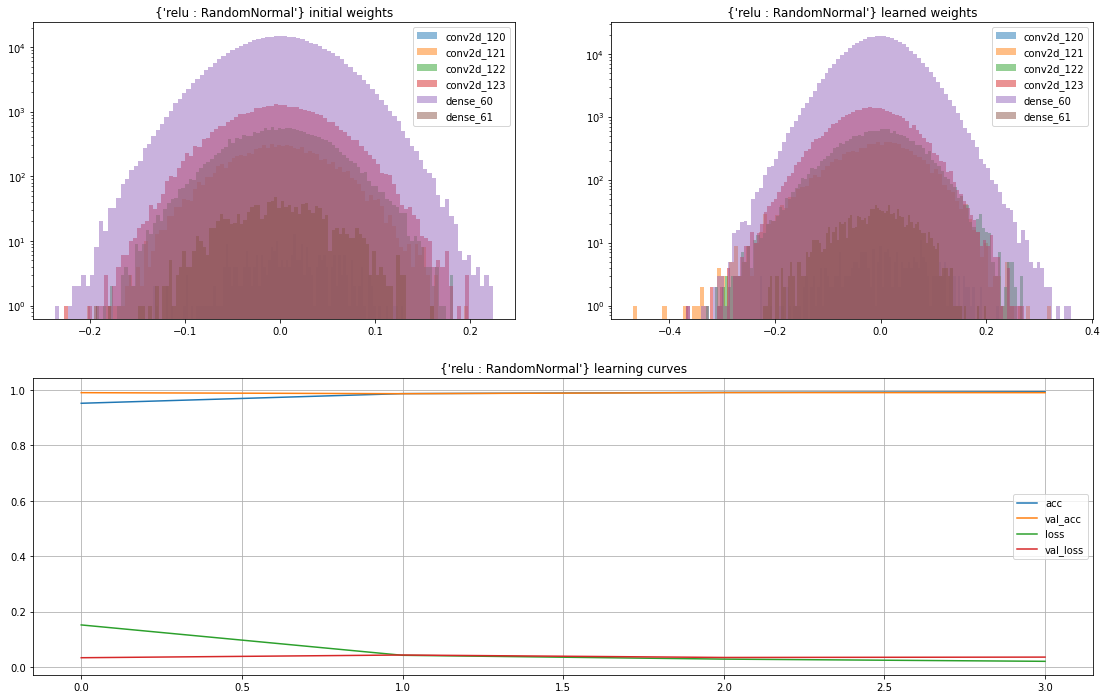

____________________ <keras.engine.sequential.Sequential object at 0x7f420693a950> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9924


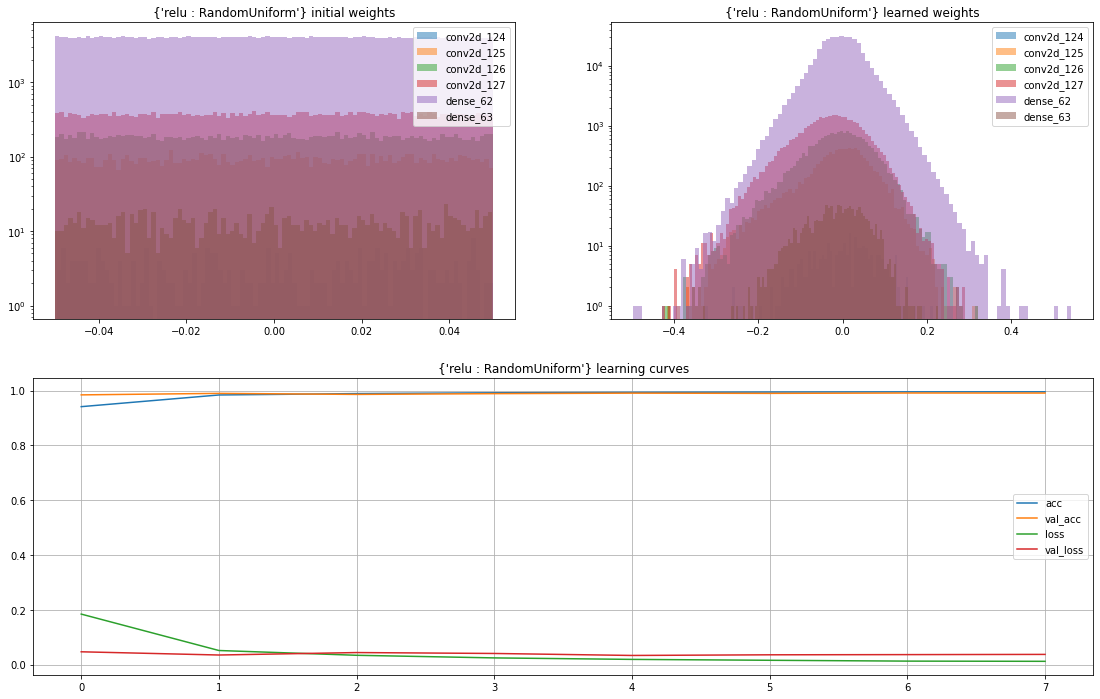

____________________ <keras.engine.sequential.Sequential object at 0x7f4218277b10> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9925


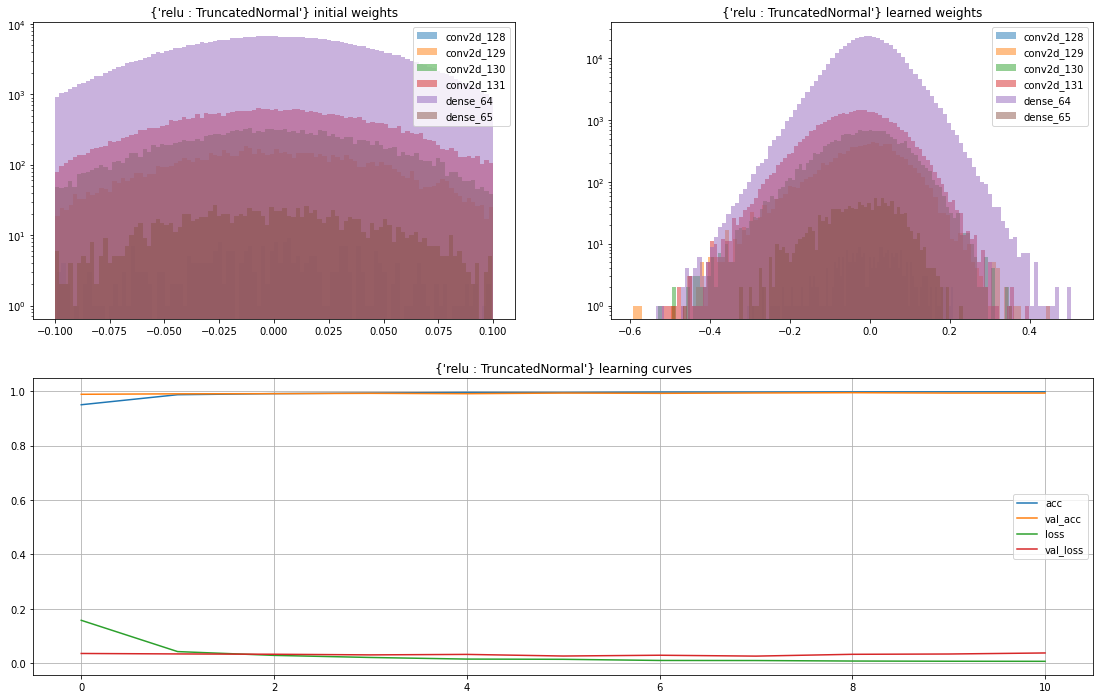

____________________ <keras.engine.sequential.Sequential object at 0x7f420258f4d0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1135


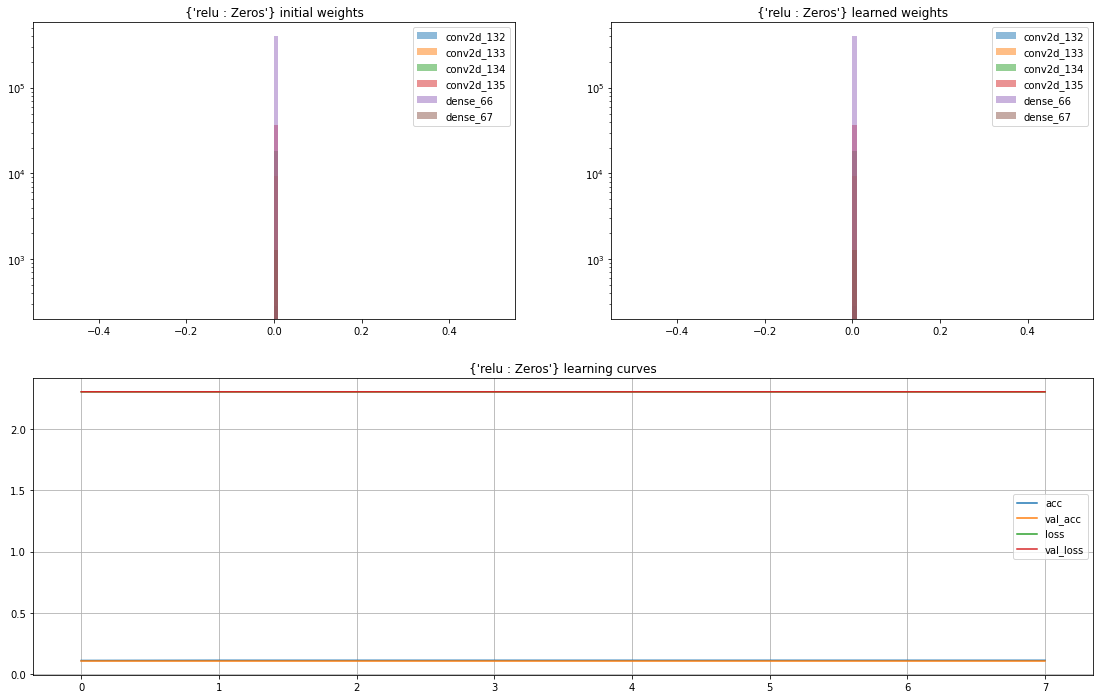

____________________ <keras.engine.sequential.Sequential object at 0x7f42068a0a10> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 141.4933 - accuracy: 0.1133


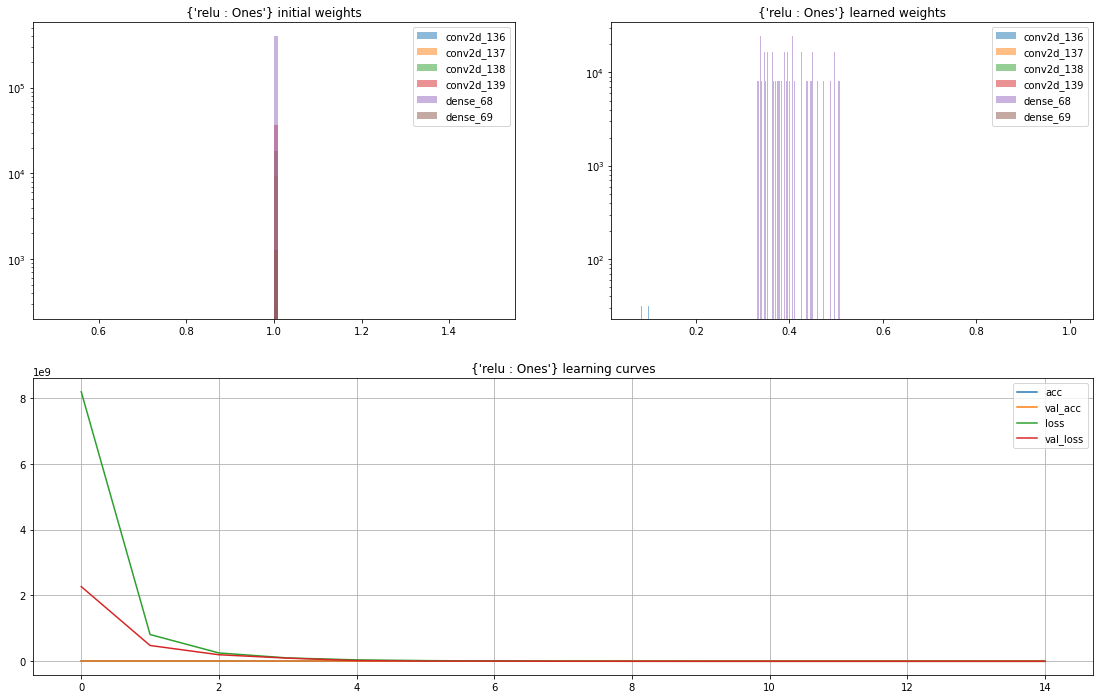

____________________ <keras.engine.sequential.Sequential object at 0x7f41fcf6d8d0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0284 - accuracy: 0.9920


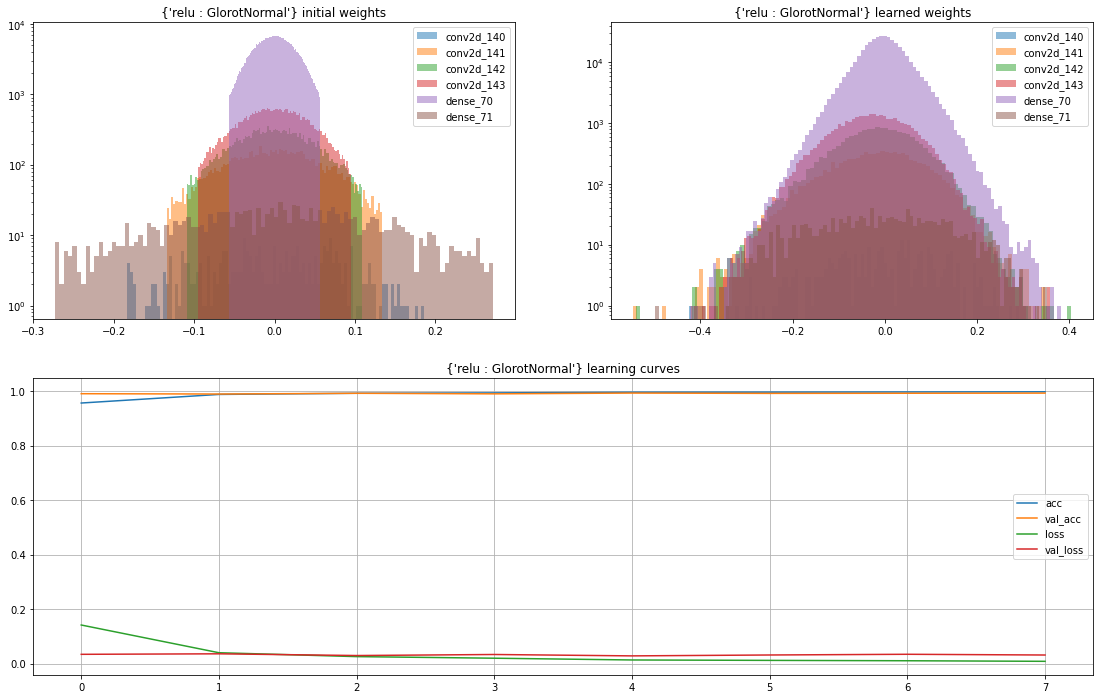

____________________ <keras.engine.sequential.Sequential object at 0x7f41fcf6d710> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9927


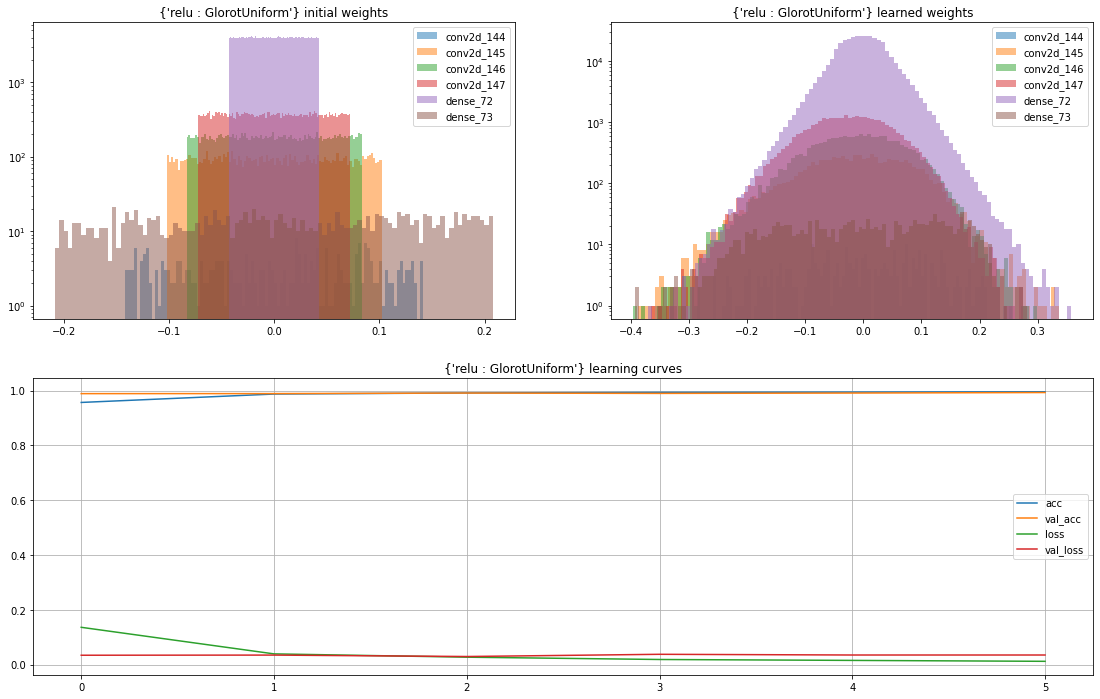

____________________ <keras.engine.sequential.Sequential object at 0x7f42be442f90> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9917


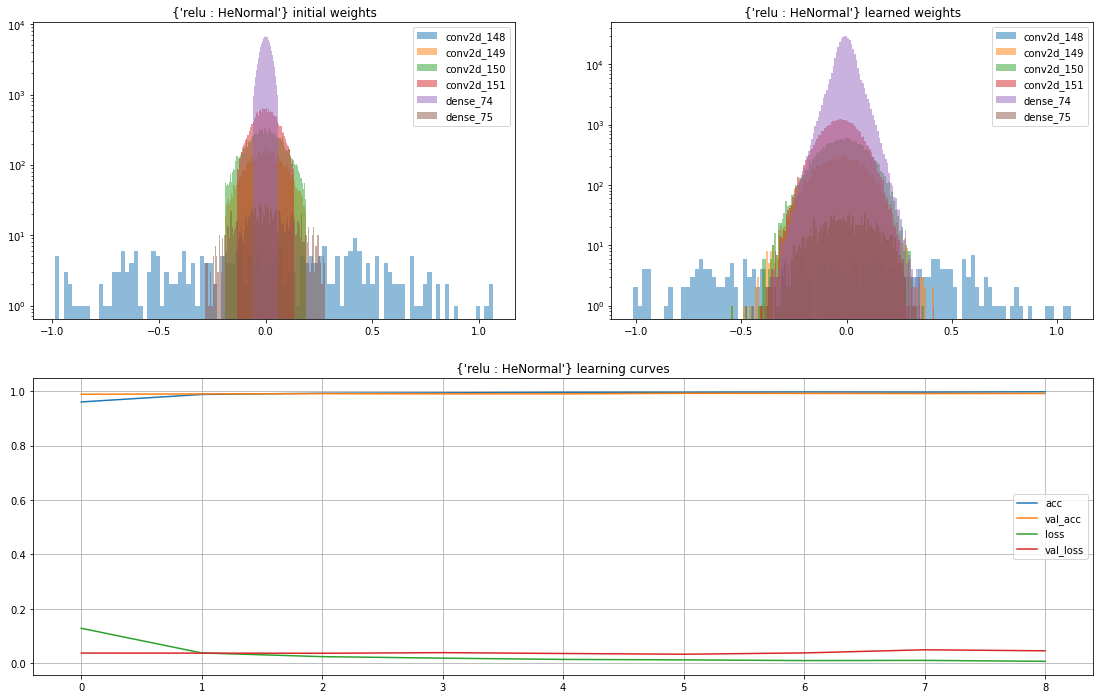

____________________ <keras.engine.sequential.Sequential object at 0x7f4298257a50> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0299 - accuracy: 0.9922


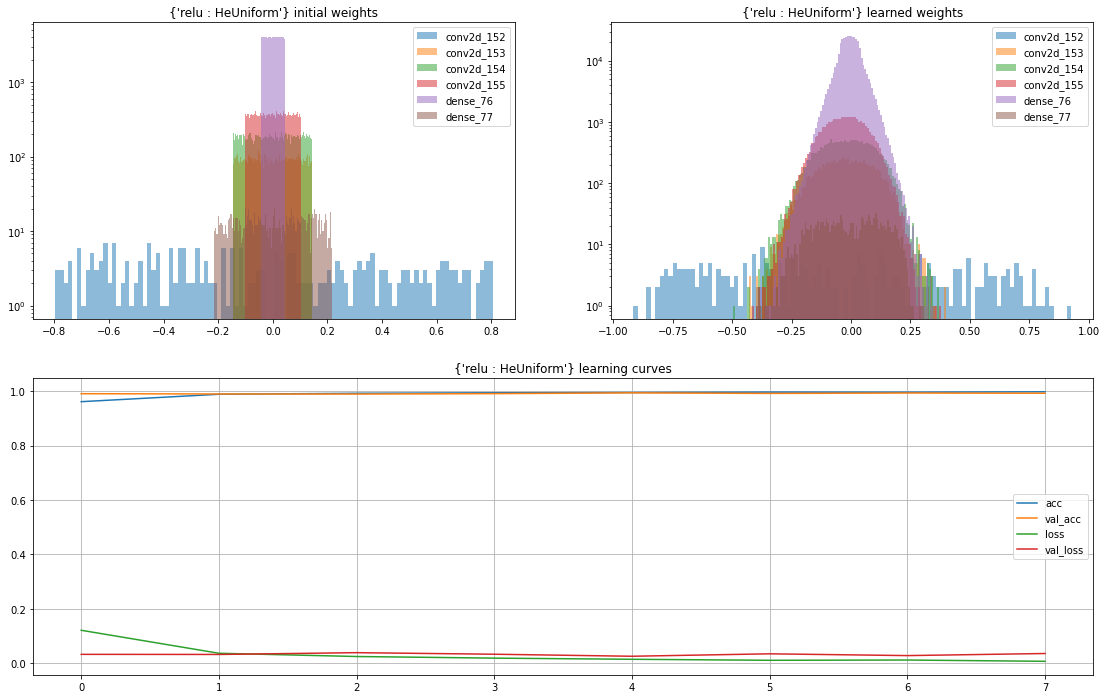

____________________ <keras.engine.sequential.Sequential object at 0x7f42be4fdc90> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.9929


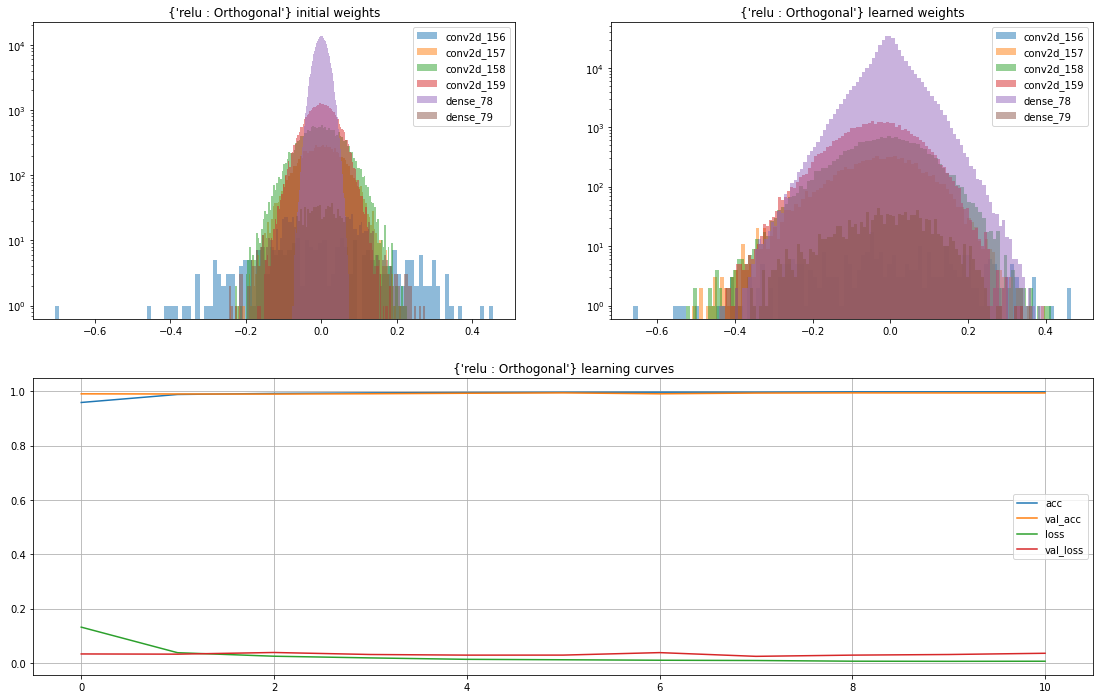

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc99c050> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3039 - accuracy: 0.1010


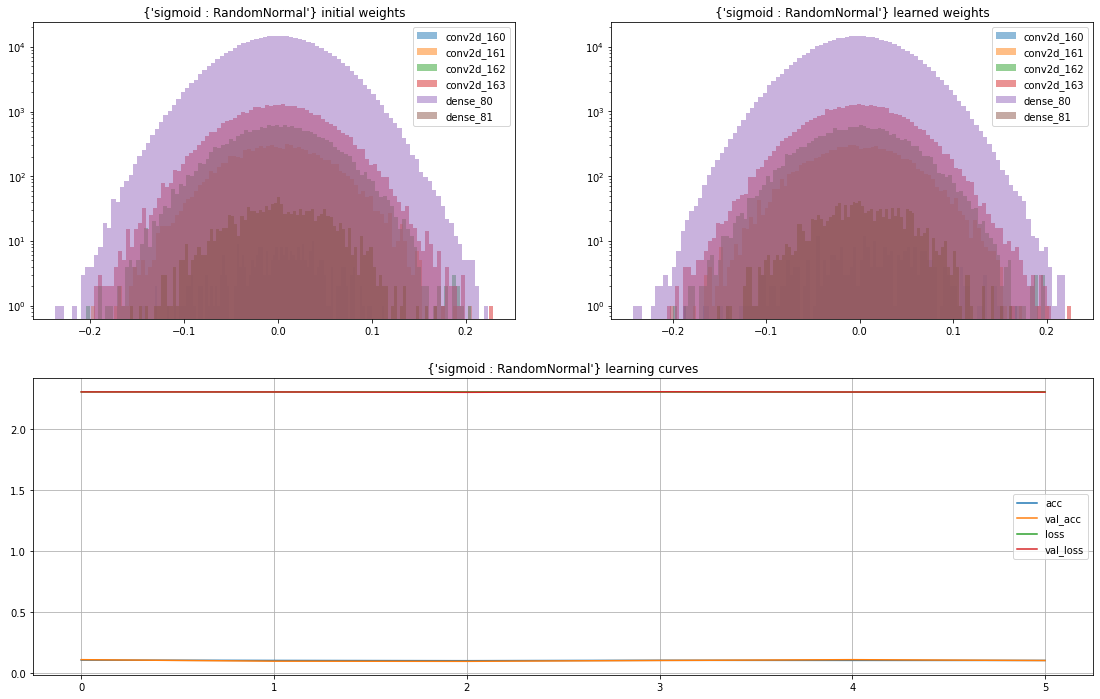

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc9c5310> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0304 - accuracy: 0.9896


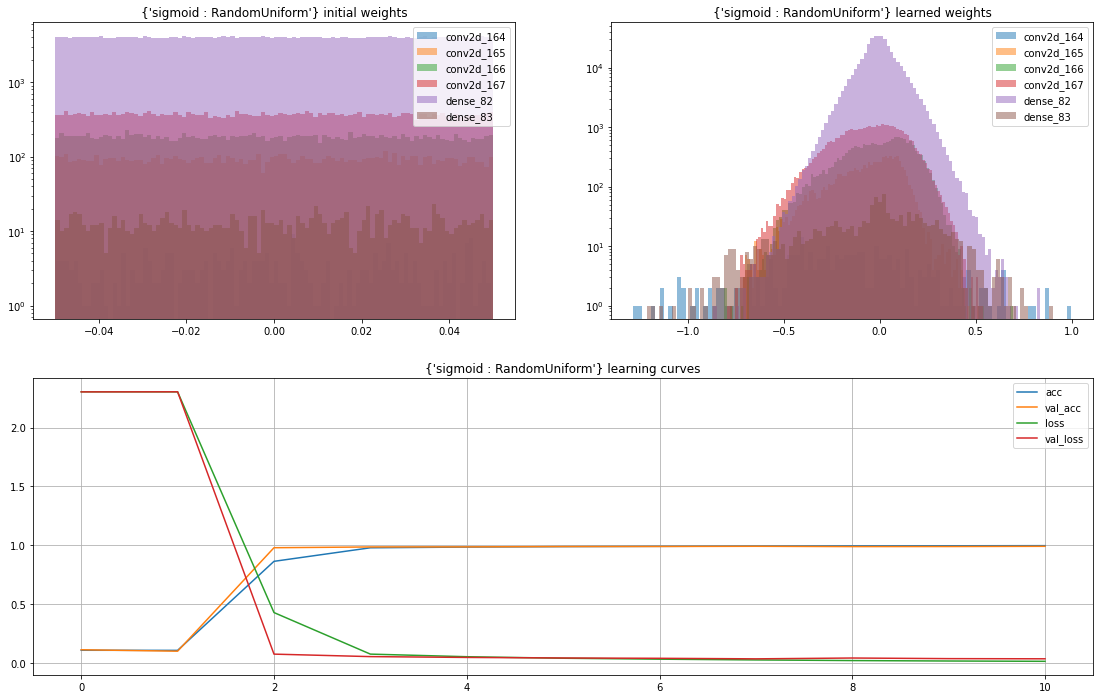

____________________ <keras.engine.sequential.Sequential object at 0x7f41fcbffe50> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9908


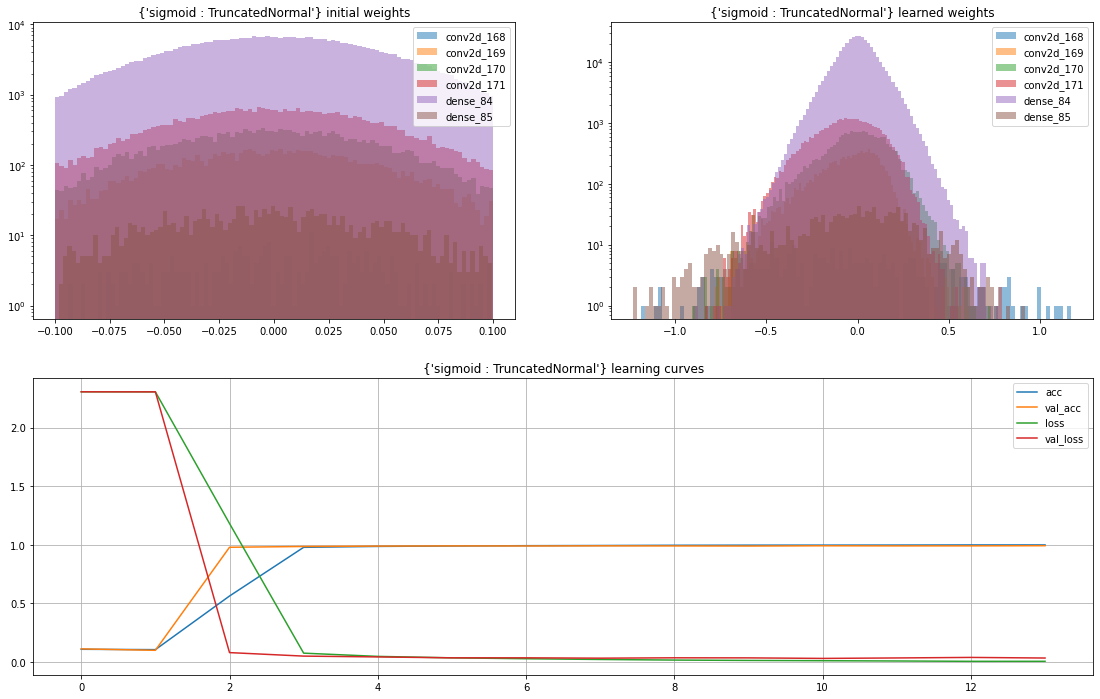

____________________ <keras.engine.sequential.Sequential object at 0x7f423646ddd0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1135


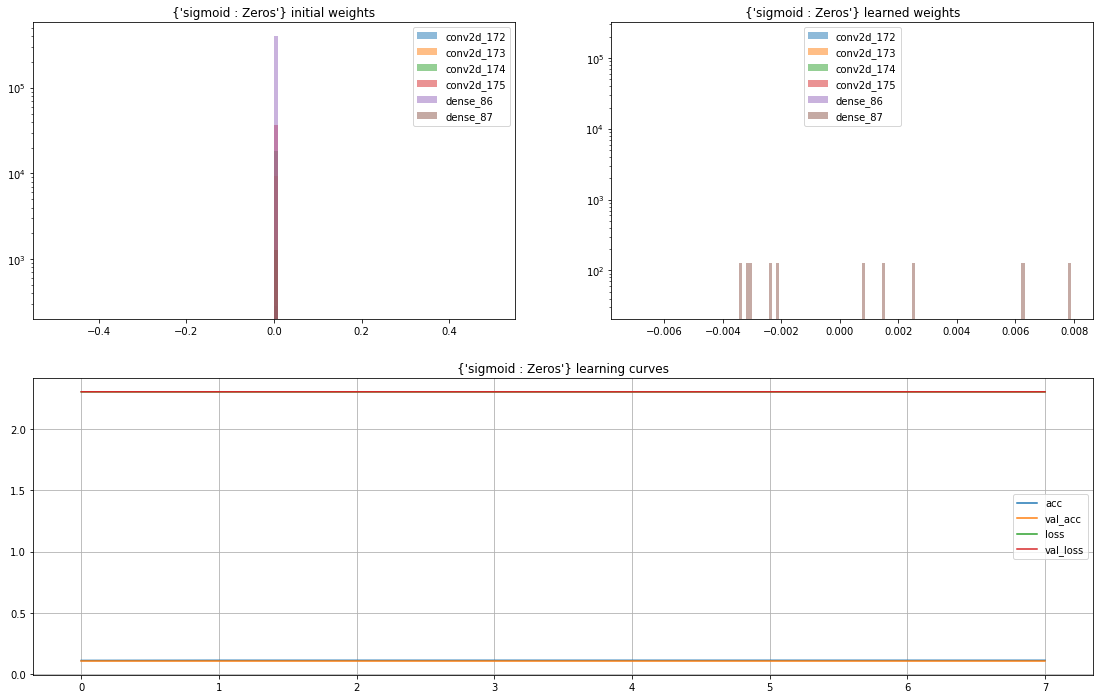

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc967390> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3143 - accuracy: 0.0974


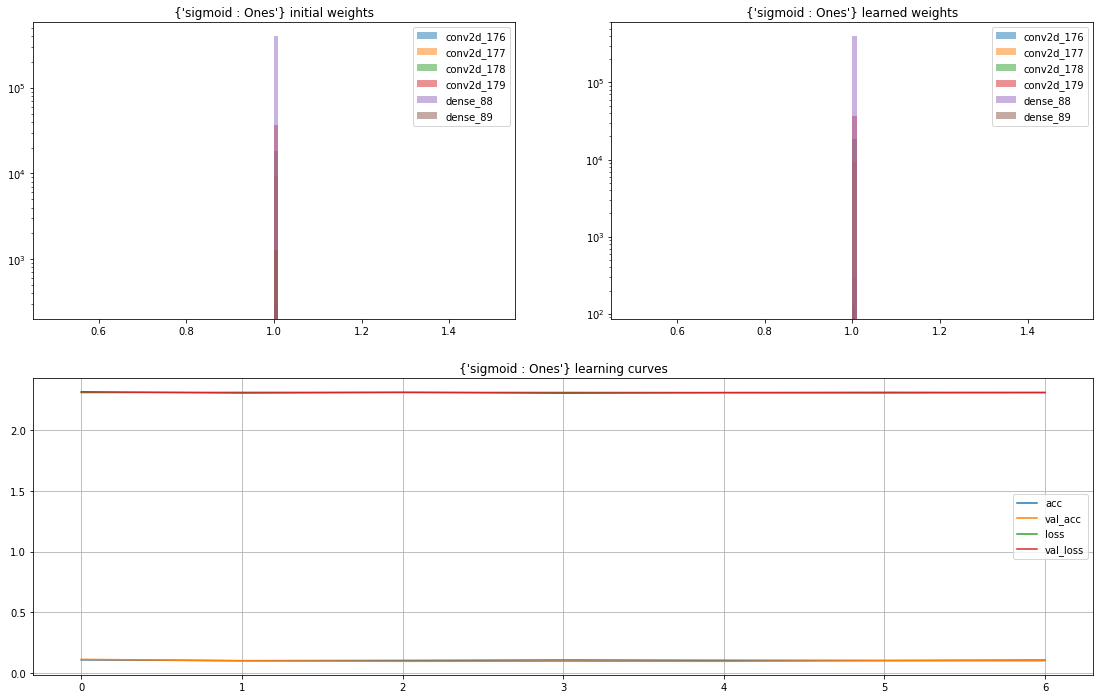

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc925890> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9891


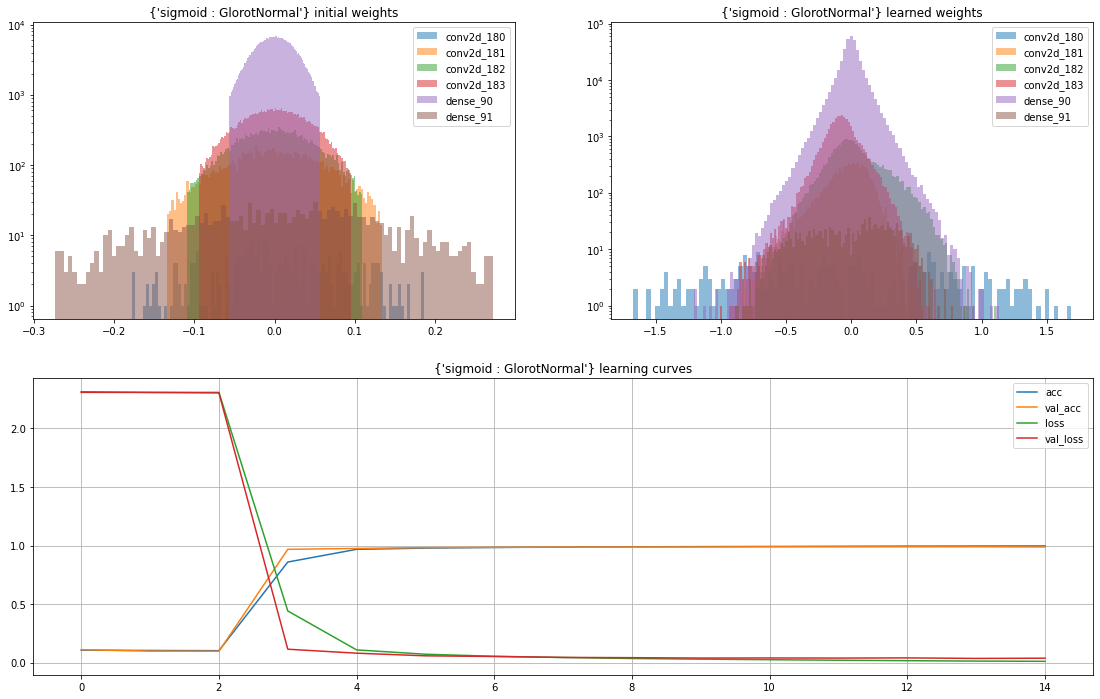

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc910550> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9901


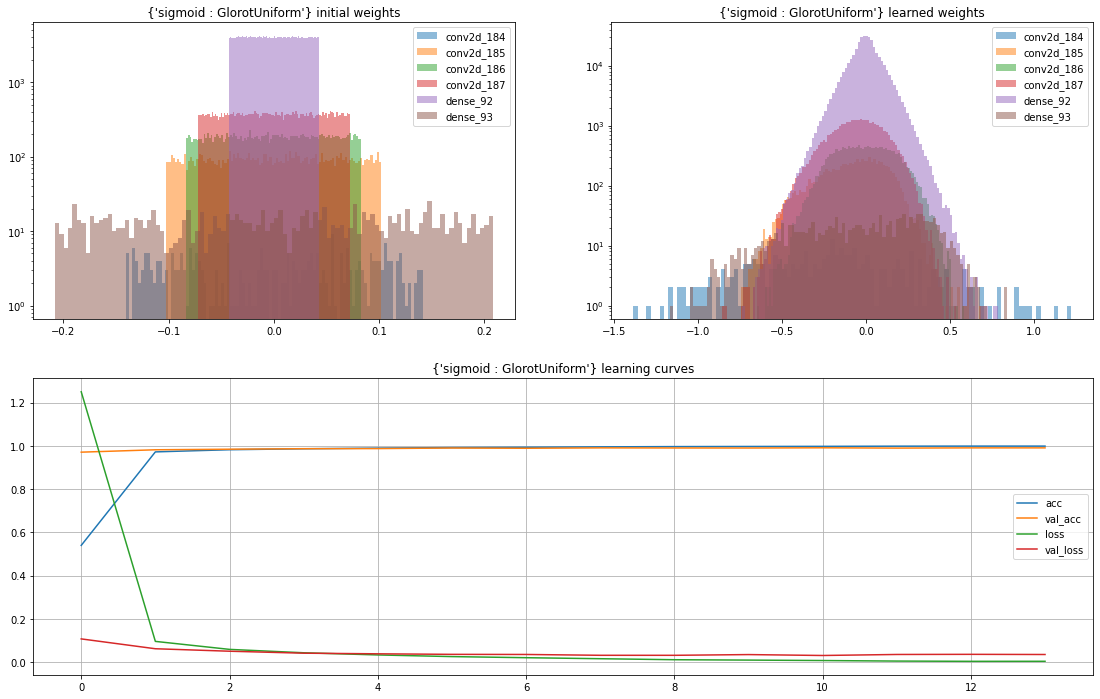

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc9951d0> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0367 - accuracy: 0.9882


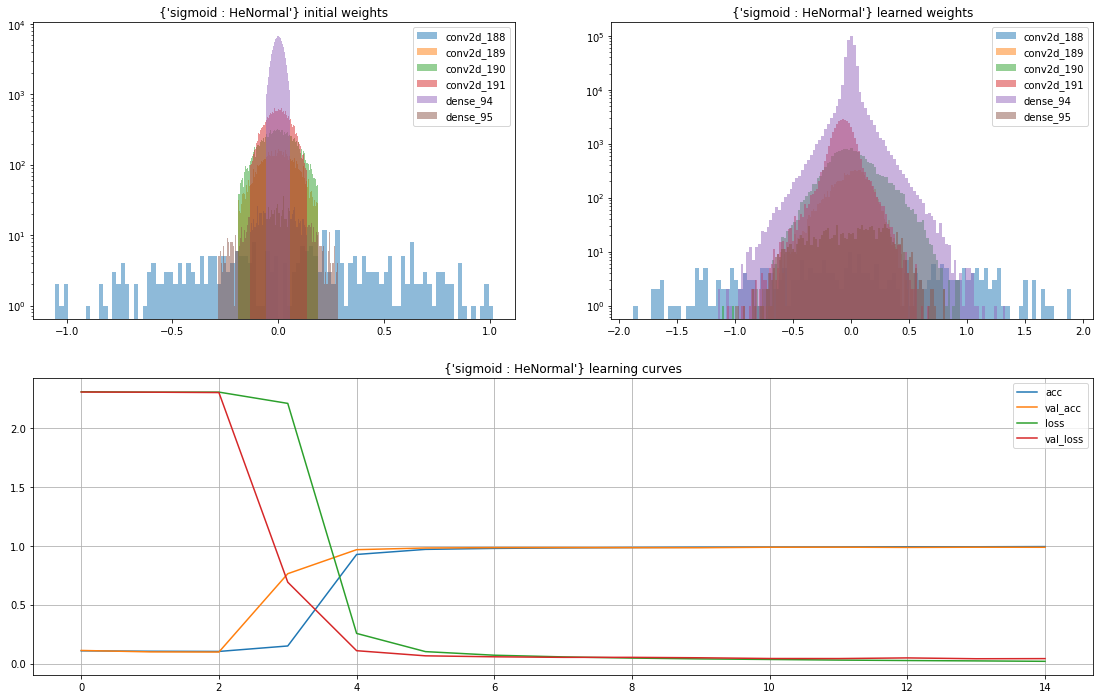

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc8dd190> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9908


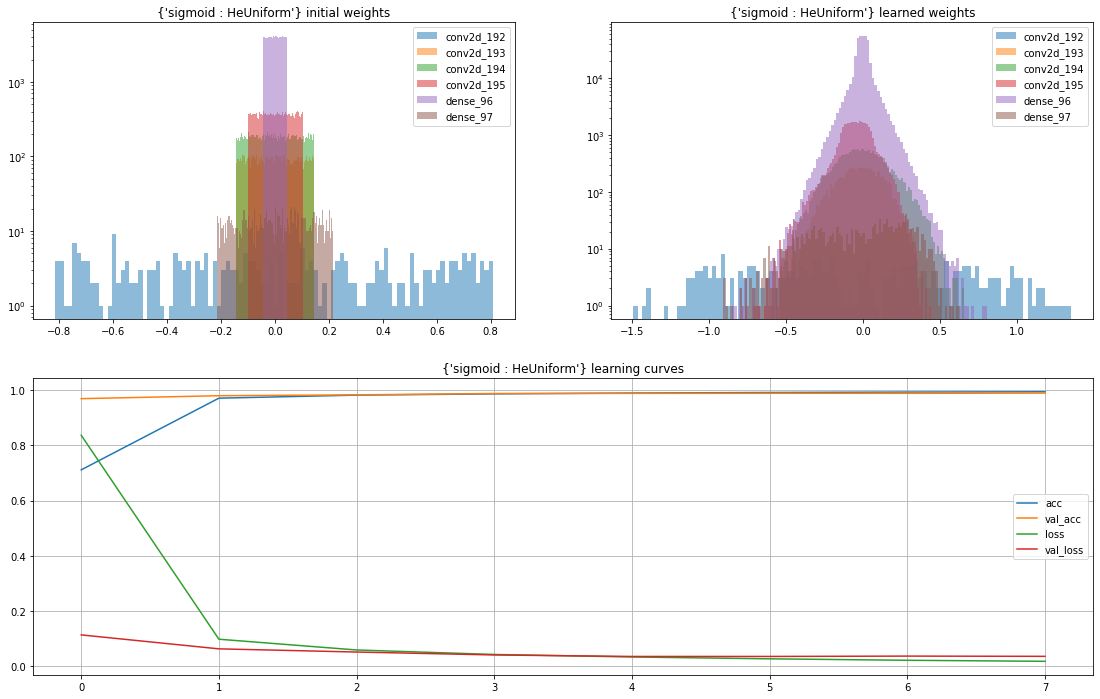

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc976d50> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0419 - accuracy: 0.9859


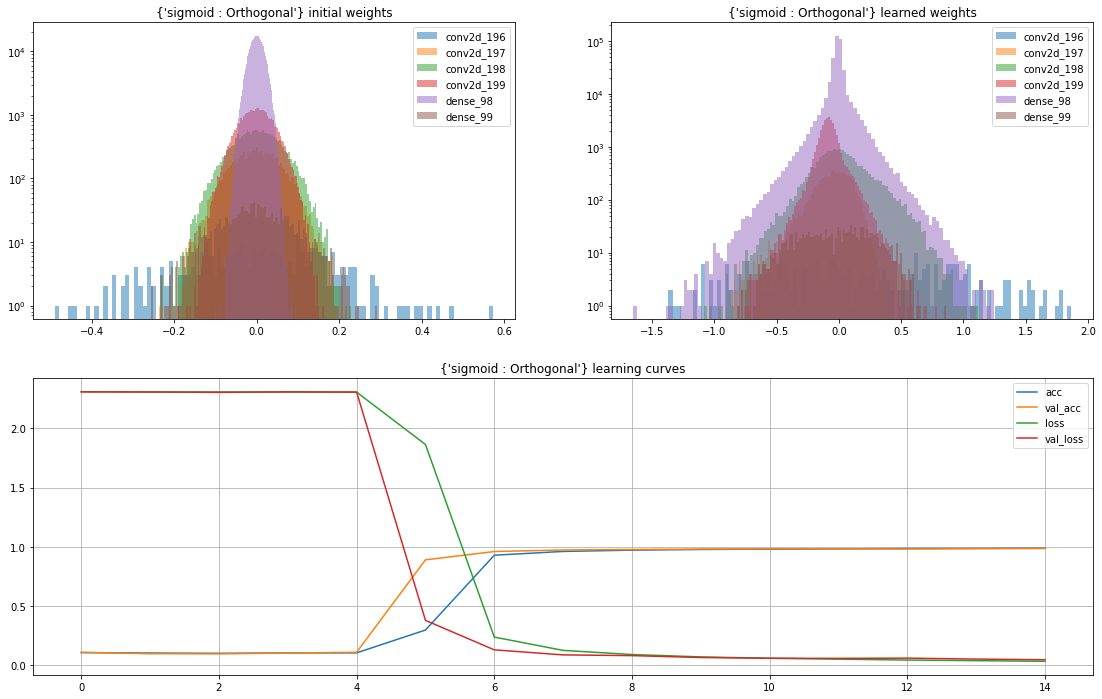

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc8fa390> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0365 - accuracy: 0.9878


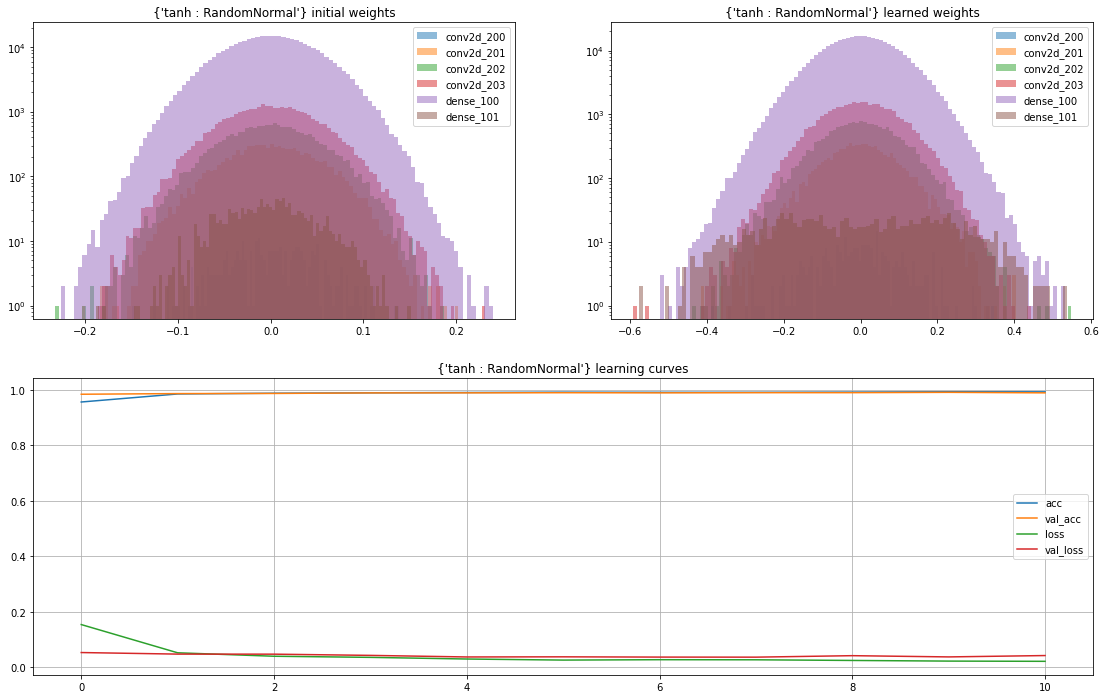

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc8cca90> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0384 - accuracy: 0.9866


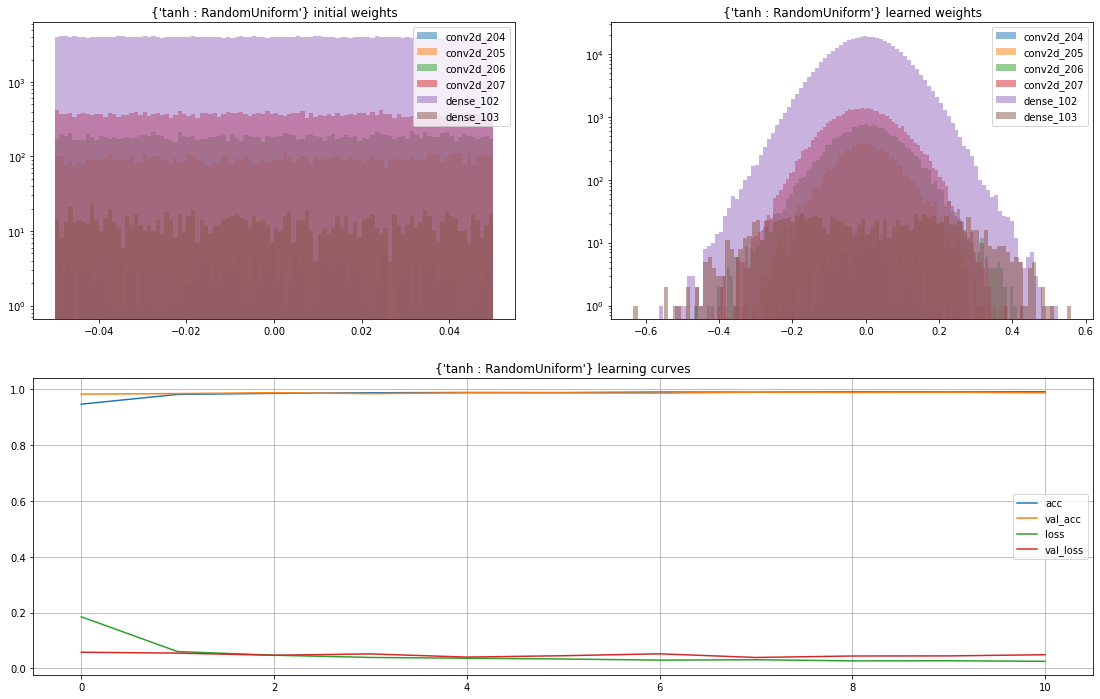

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc864750> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0396 - accuracy: 0.9873


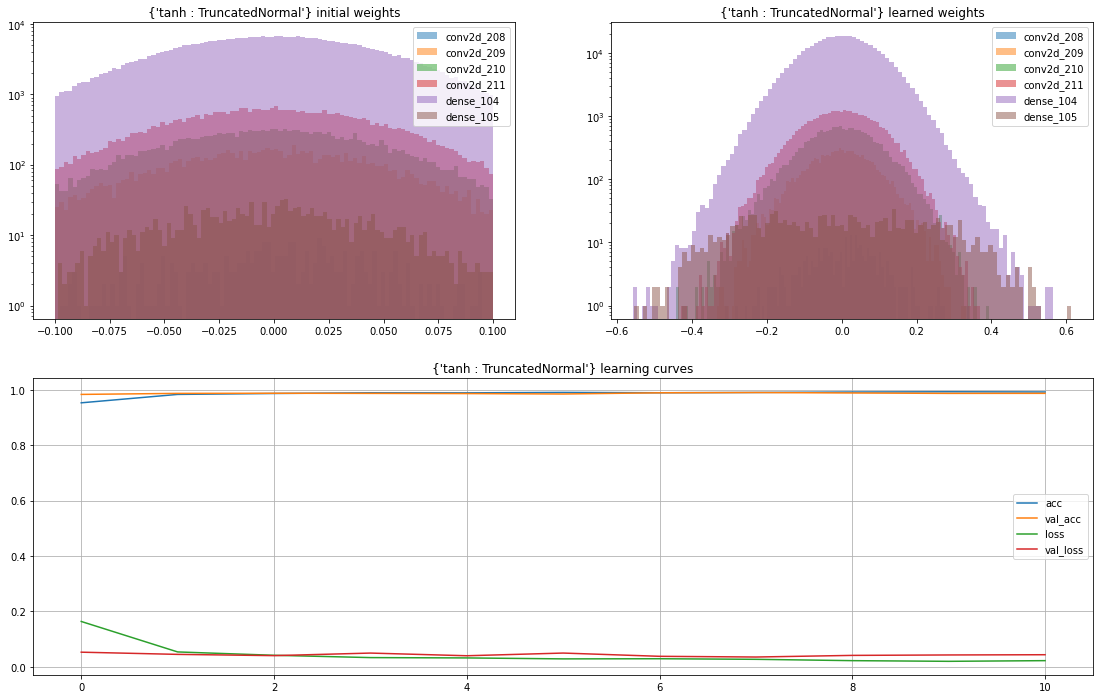

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc883110> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1135


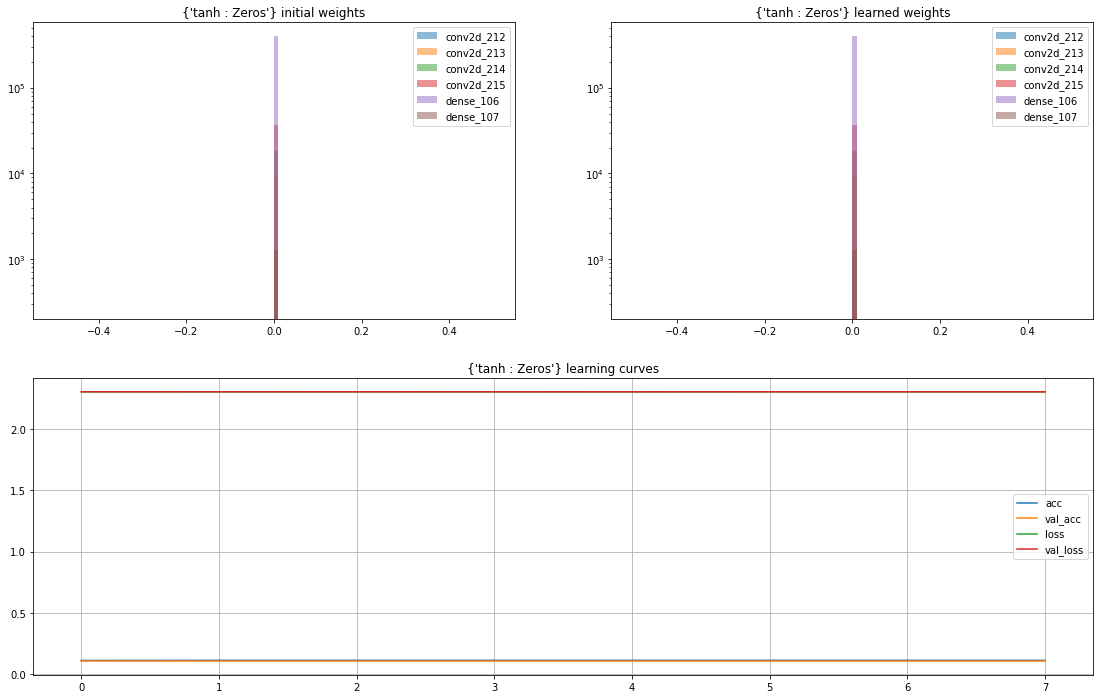

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc8b8550> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 2.3143 - accuracy: 0.0974


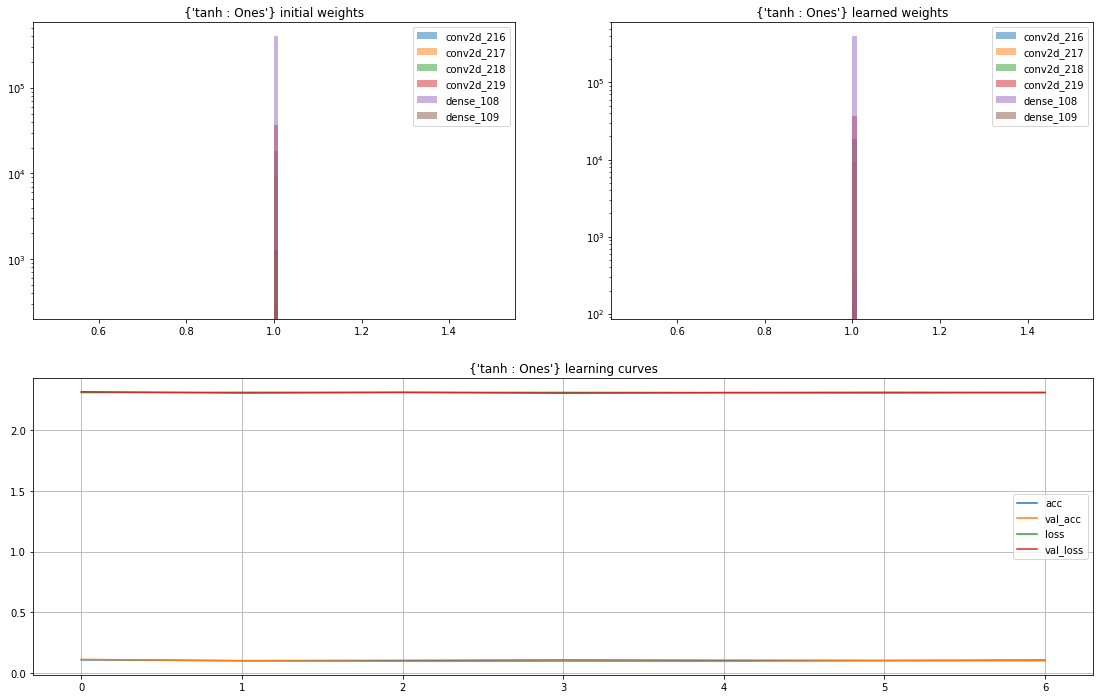

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc816a90> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0365 - accuracy: 0.9881


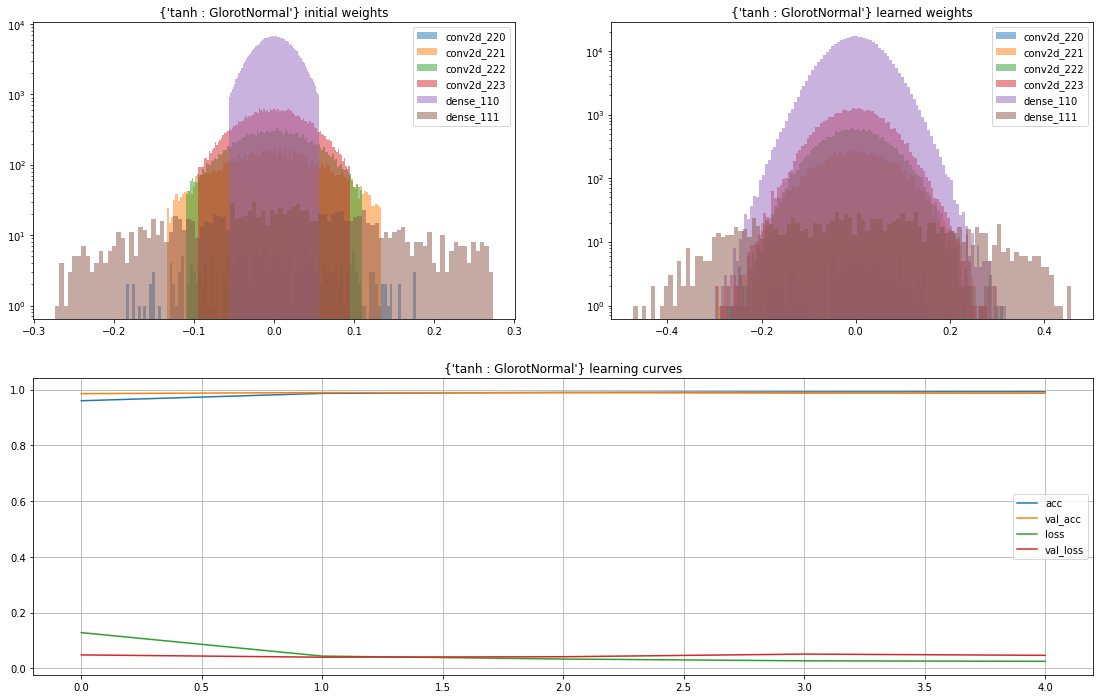

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc82c190> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0382 - accuracy: 0.9878


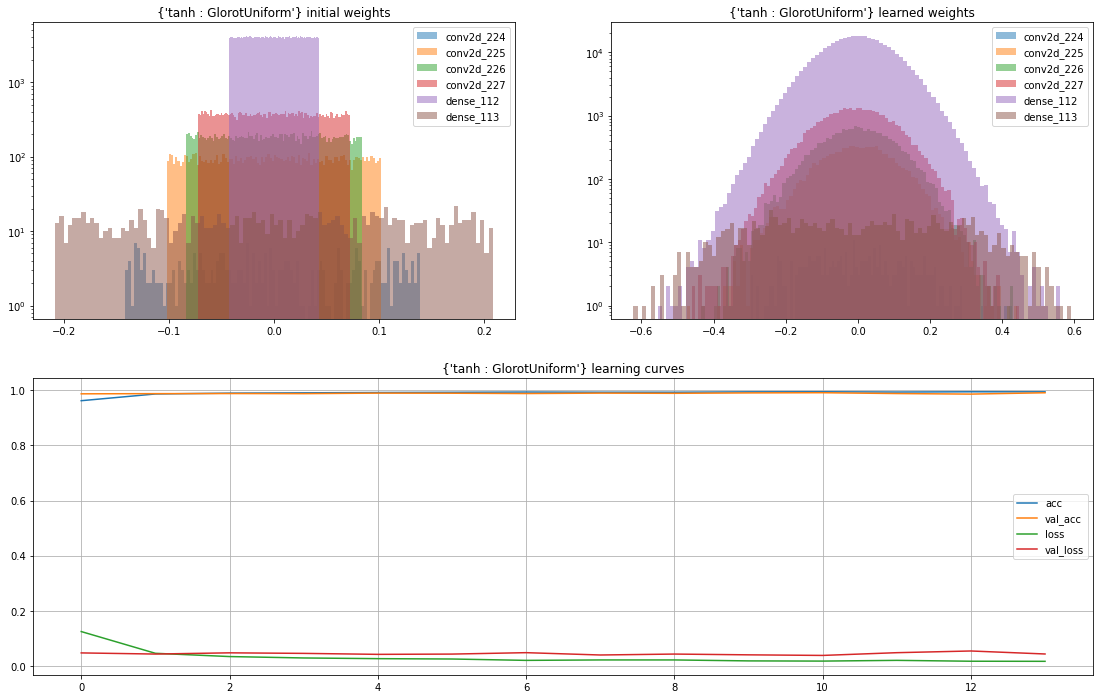

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc7f4790> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.9879


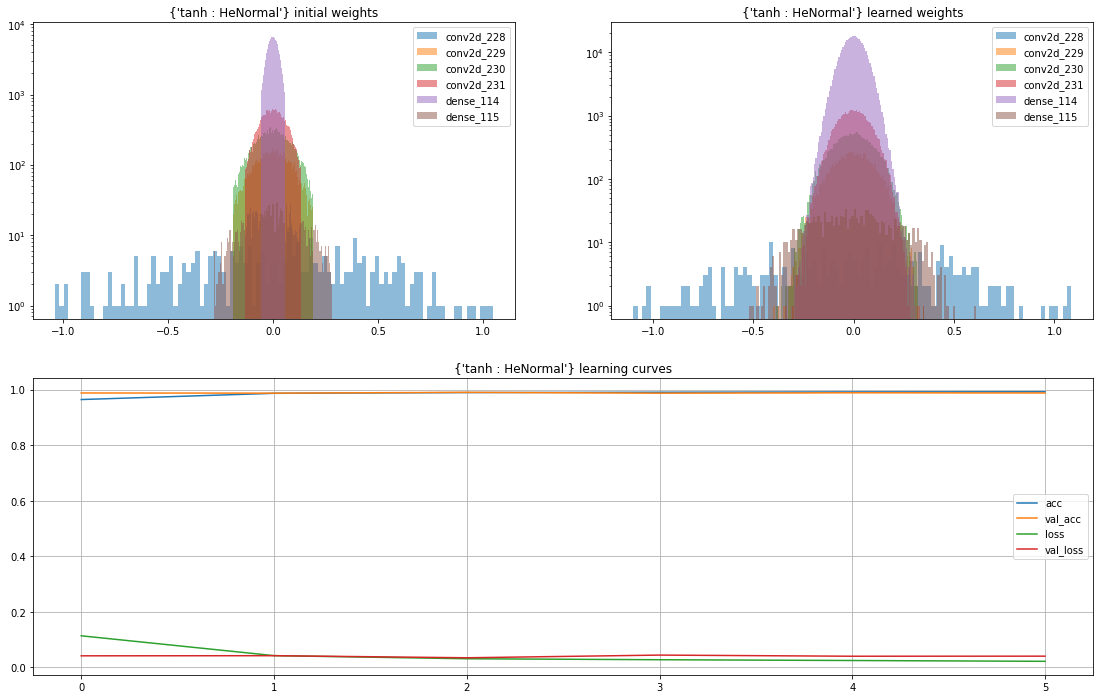

____________________ <keras.engine.sequential.Sequential object at 0x7f41f979a610> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9897


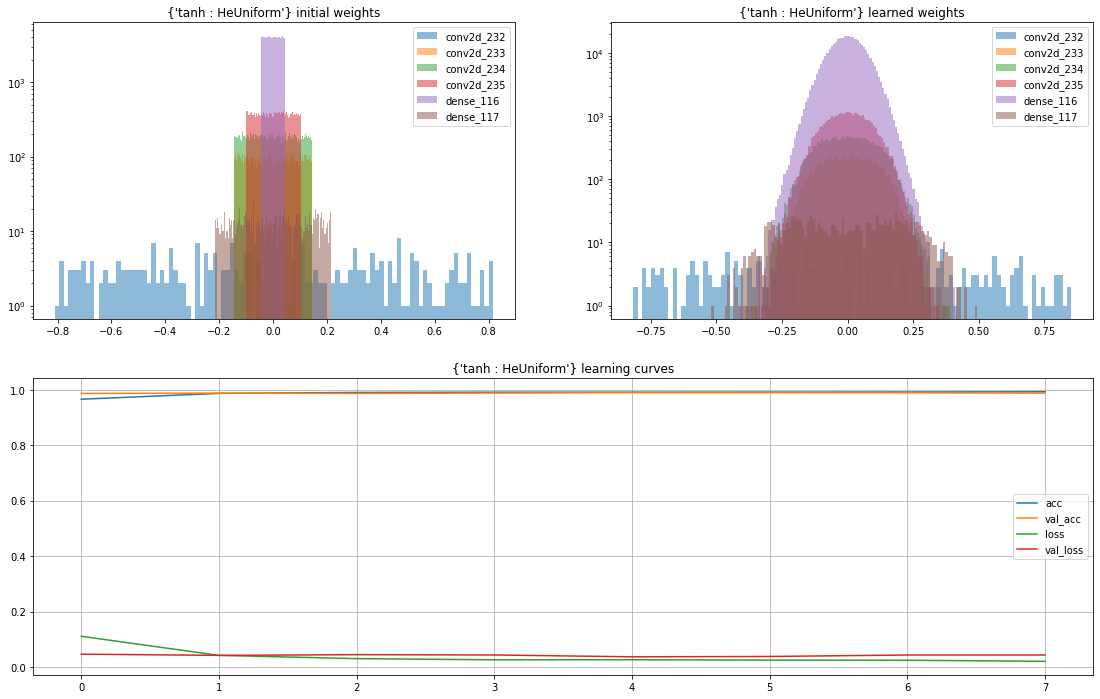

____________________ <keras.engine.sequential.Sequential object at 0x7f41f97c6bd0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9868


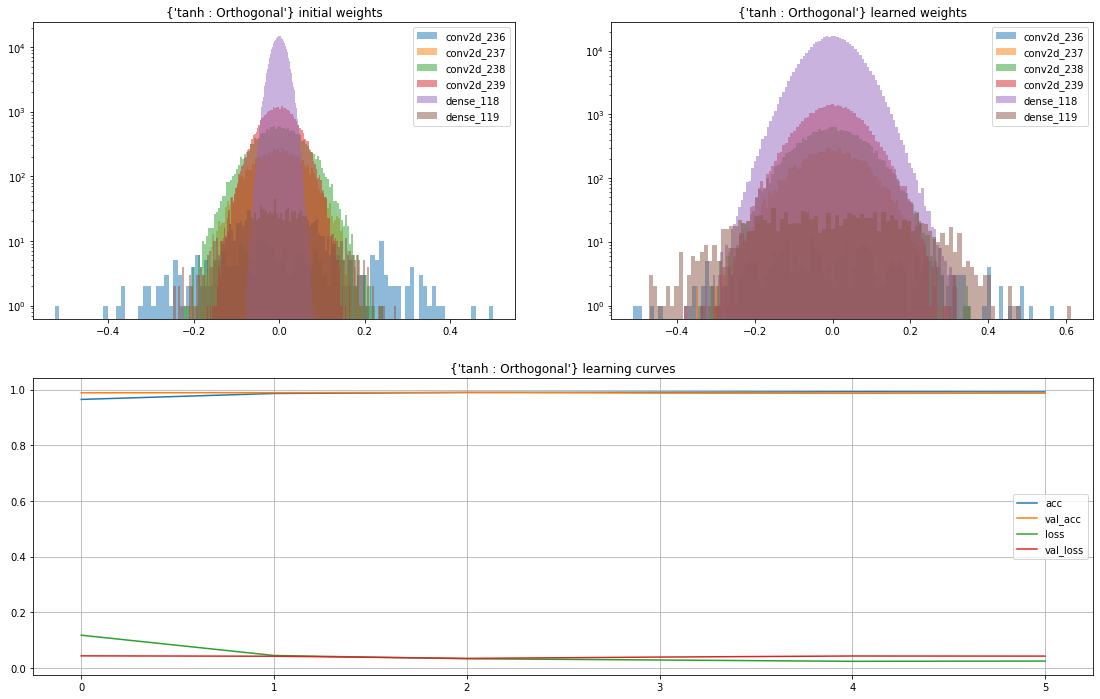

In [32]:
all_models=[]
for act in activation:
  models=[]
  for cfg in initializers:
    models.append(create_model(act,cfg))
  all_models.append(models)  
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)  
all_evalutes=[]
for i,Lst in enumerate(all_models):
  evalutes=[]
  for j,model in enumerate(Lst):
    if("class_name" in initializers[j]):
      title={activation[i]+" : "+initializers[j]["class_name"]}
    else:
      title={activation[i]+" : "+initializers[j]} 
      
    print('_'*20, model, '_'*20) # Print model name to separate plots

    # Creating plot of layers weights before train process
    fig = plt.figure(figsize = (19, 12))
    gs = gridspec.GridSpec(2, 2)
    ax = fig.add_subplot(gs[0, 0])
    plot_weights(model,f'{title} initial weights')

    # Training model
    history=model.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.1, verbose = 0,callbacks=[es])

    # Predicting test data and creating submission file
    eva = model.evaluate(X_test,y_test)
    evalutes.append(eva)

    # Creating plot of layers weights after training process
    ax = fig.add_subplot(gs[0, 1])
    plot_weights(model,f'{title} learned weights')    

    # Plot learning curves
    ax = fig.add_subplot(gs[1, :])
    learning_curves(history.history, title)
    plt.show()
  all_evalutes.append(evalutes)
      

after 15 epochs

In [33]:
columns=['RandomNormal','RandomUniform',  'TruncatedNormal', 'Zeros','Ones','GlorotNormal','GlorotUniform', 'HeNormal','HeUniform','Orthogonal'] 
import pandas as pd
df_acc = pd.DataFrame(np.array(all_evalutes)[:,:,1], columns=columns,index=activation)
df_loss = pd.DataFrame(np.array(all_evalutes)[:,:,0], columns=columns,index=activation)


In [34]:
df_acc

RandomNormal  RandomUniform  TruncatedNormal   Zeros    Ones  \
relu           0.9904         0.9924           0.9925  0.1135  0.1133   
sigmoid        0.1010         0.9896           0.9908  0.1135  0.0974   
tanh           0.9878         0.9866           0.9873  0.1135  0.0974   

         GlorotNormal  GlorotUniform  HeNormal  HeUniform  Orthogonal  
relu           0.9920         0.9927    0.9917     0.9922      0.9929  
sigmoid        0.9891         0.9901    0.9882     0.9908      0.9859  
tanh           0.9881         0.9878    0.9879     0.9897      0.9868

In [35]:
df_loss

RandomNormal  RandomUniform  TruncatedNormal     Zeros        Ones  \
relu         0.029129       0.026944         0.039754  2.301003  141.493332   
sigmoid      2.303876       0.030363         0.030742  2.301003    2.314322   
tanh         0.036453       0.038443         0.039583  2.301003    2.314322   

         GlorotNormal  GlorotUniform  HeNormal  HeUniform  Orthogonal  
relu         0.028404       0.026425  0.029278   0.029852    0.024209  
sigmoid      0.036675       0.030759  0.036749   0.030598    0.041892  
tanh         0.036486       0.038180  0.037126   0.030446    0.038002

train for 20 epochs

____________________ <keras.engine.sequential.Sequential object at 0x7f42d731bd50> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0260 - accuracy: 0.9927


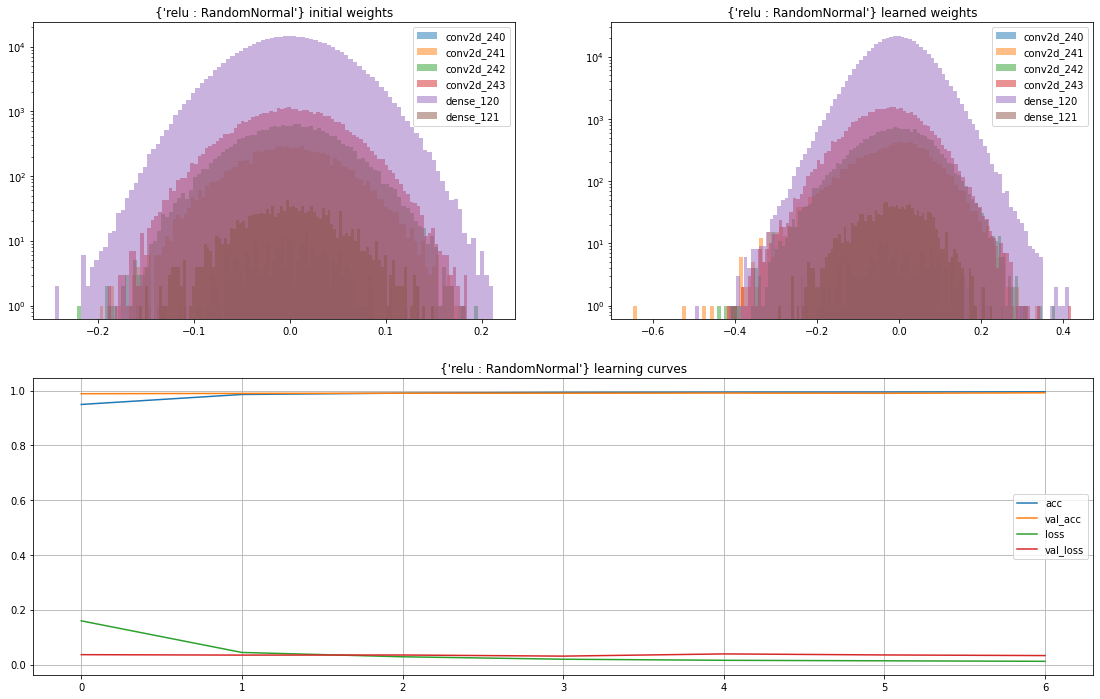

____________________ <keras.engine.sequential.Sequential object at 0x7f42d731ba50> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9915


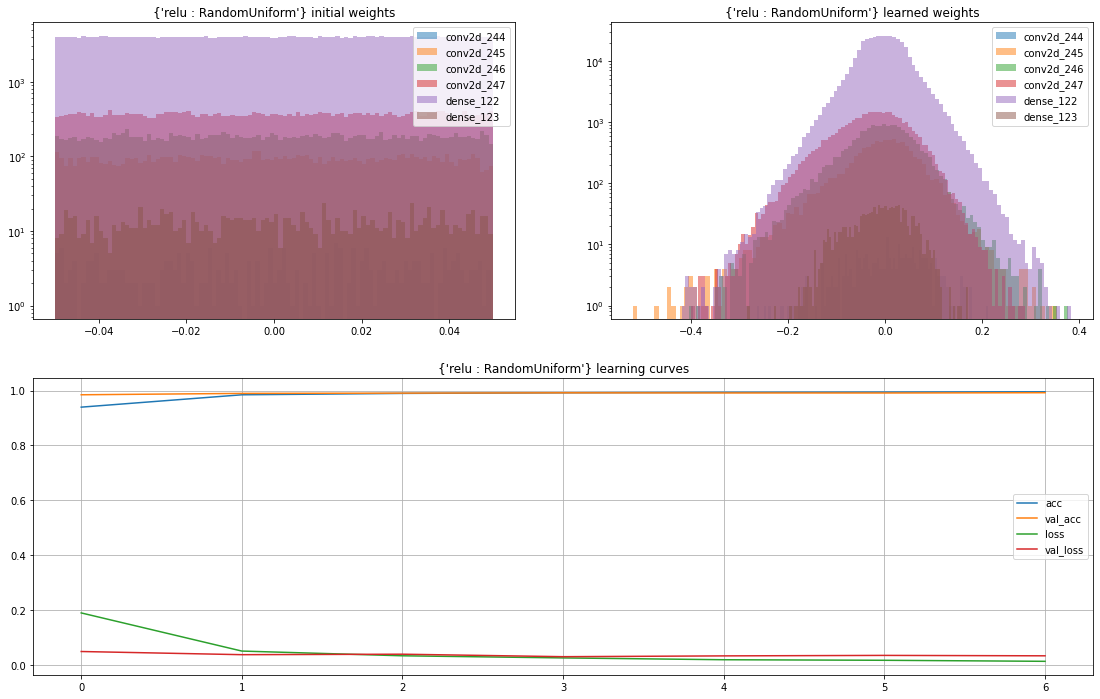

____________________ <keras.engine.sequential.Sequential object at 0x7f41fcdba6d0> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0330 - accuracy: 0.9908


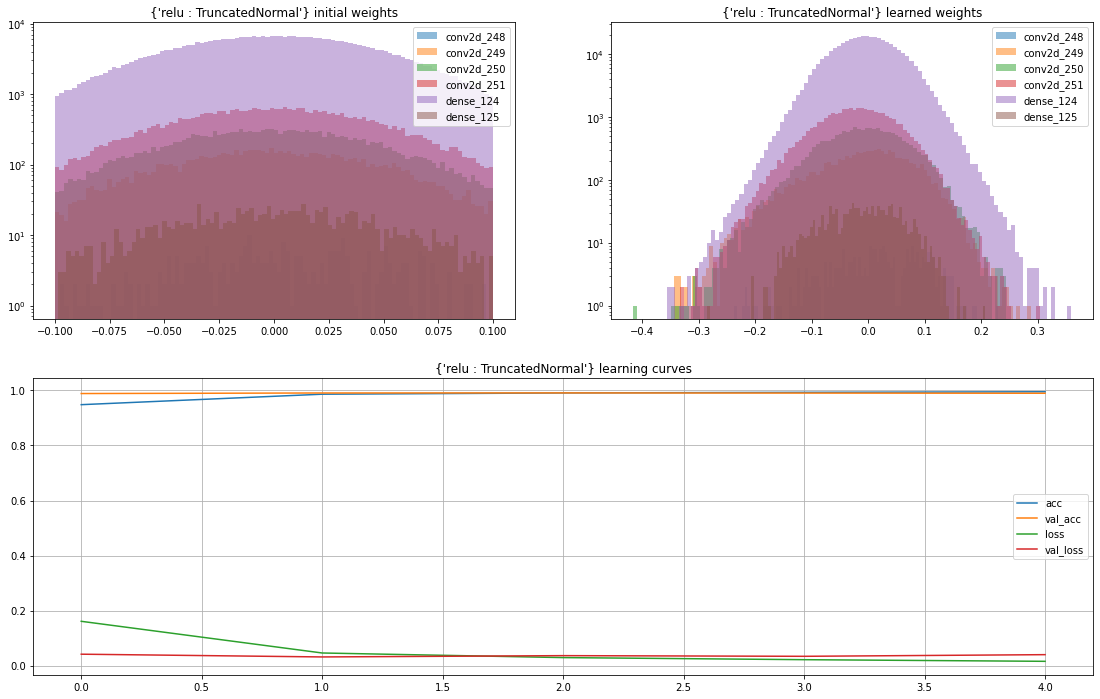

____________________ <keras.engine.sequential.Sequential object at 0x7f420fc28e90> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1135


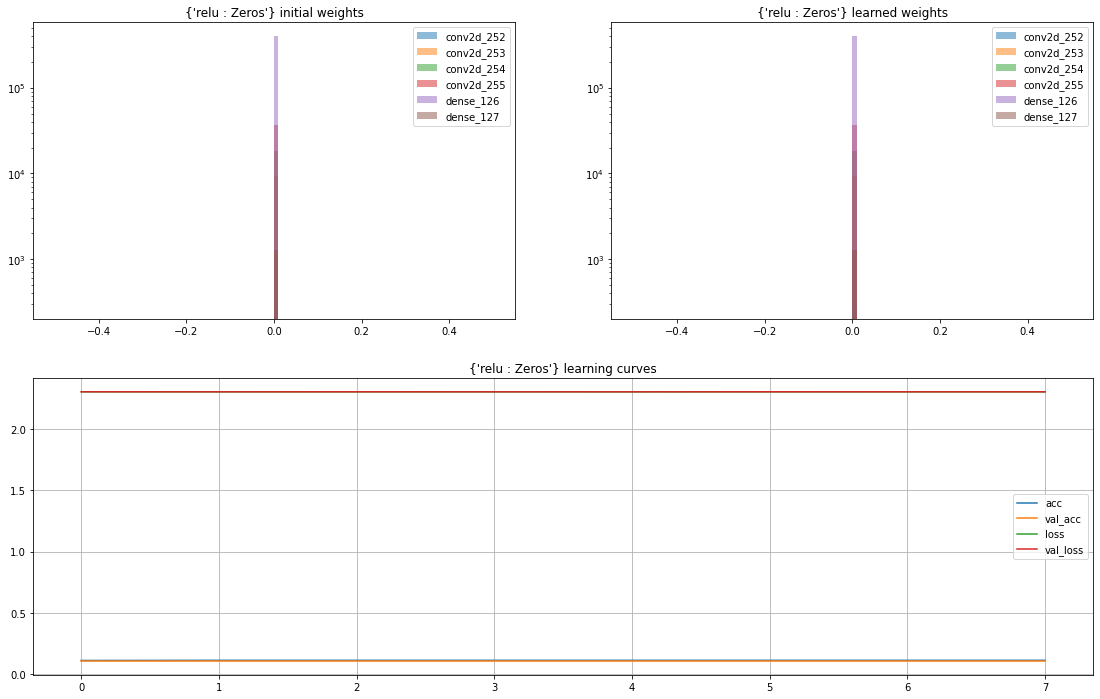

____________________ <keras.engine.sequential.Sequential object at 0x7f42d785be90> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.7196 - accuracy: 0.1147


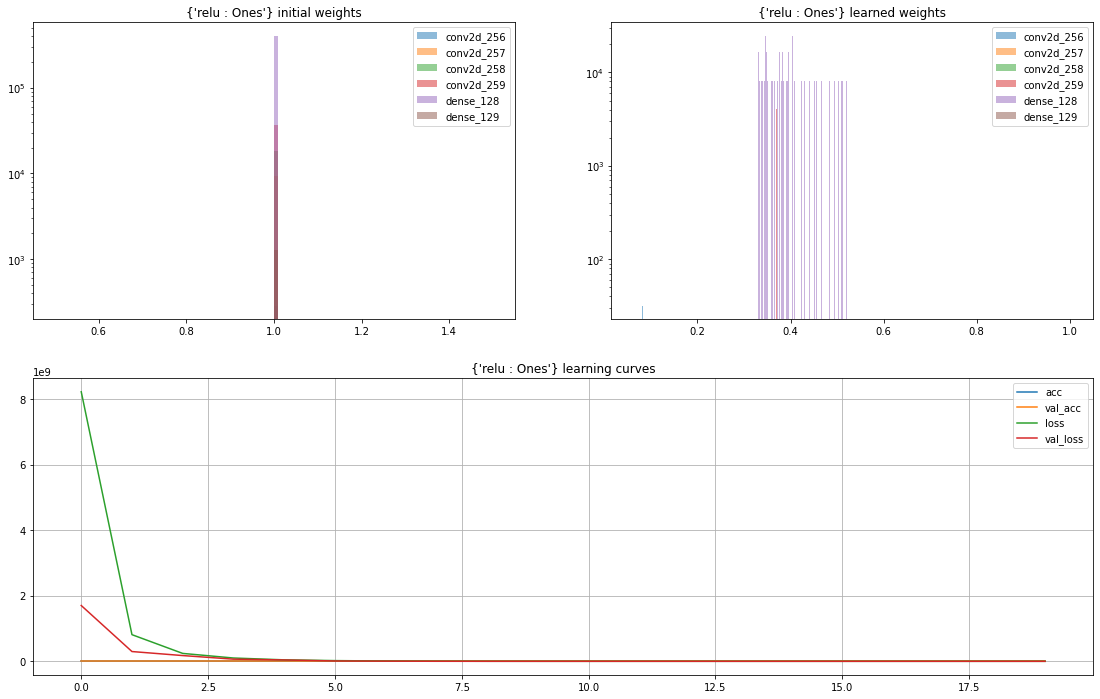

____________________ <keras.engine.sequential.Sequential object at 0x7f42bed9e850> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9917


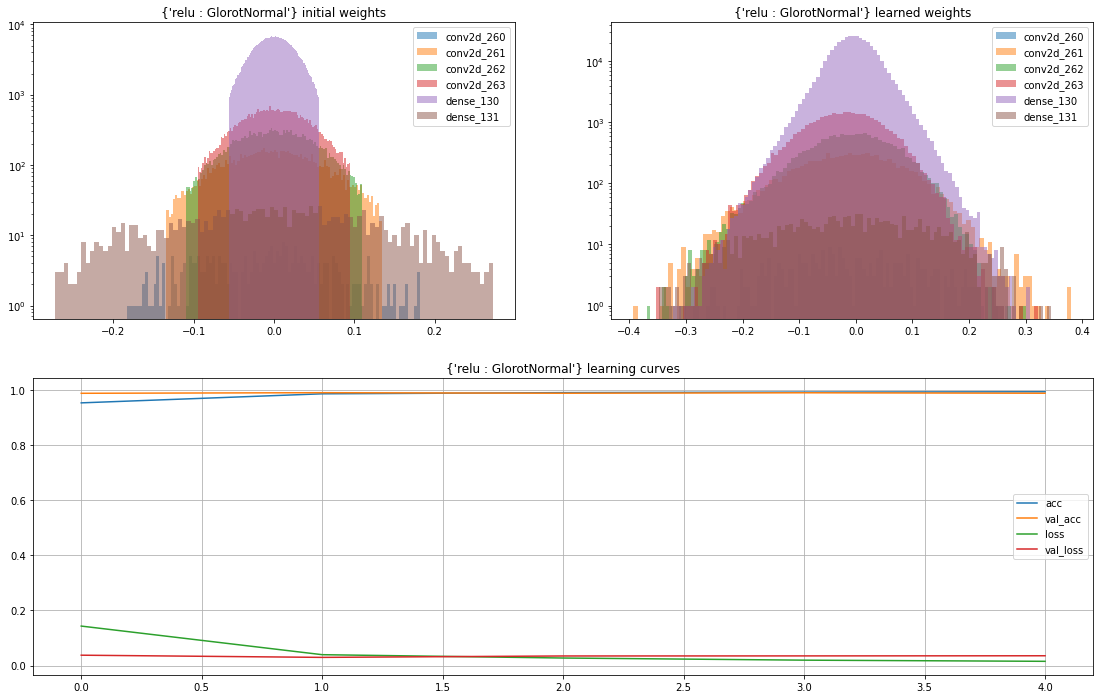

____________________ <keras.engine.sequential.Sequential object at 0x7f42bfd73450> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9911


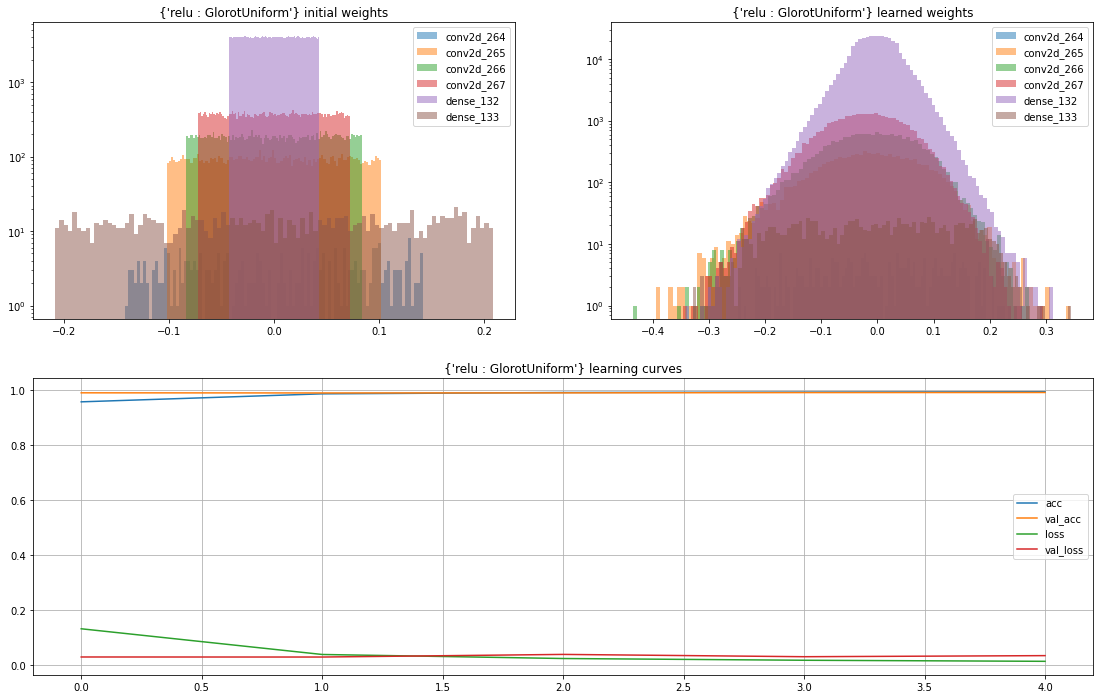

____________________ <keras.engine.sequential.Sequential object at 0x7f42d6c7ffd0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9913


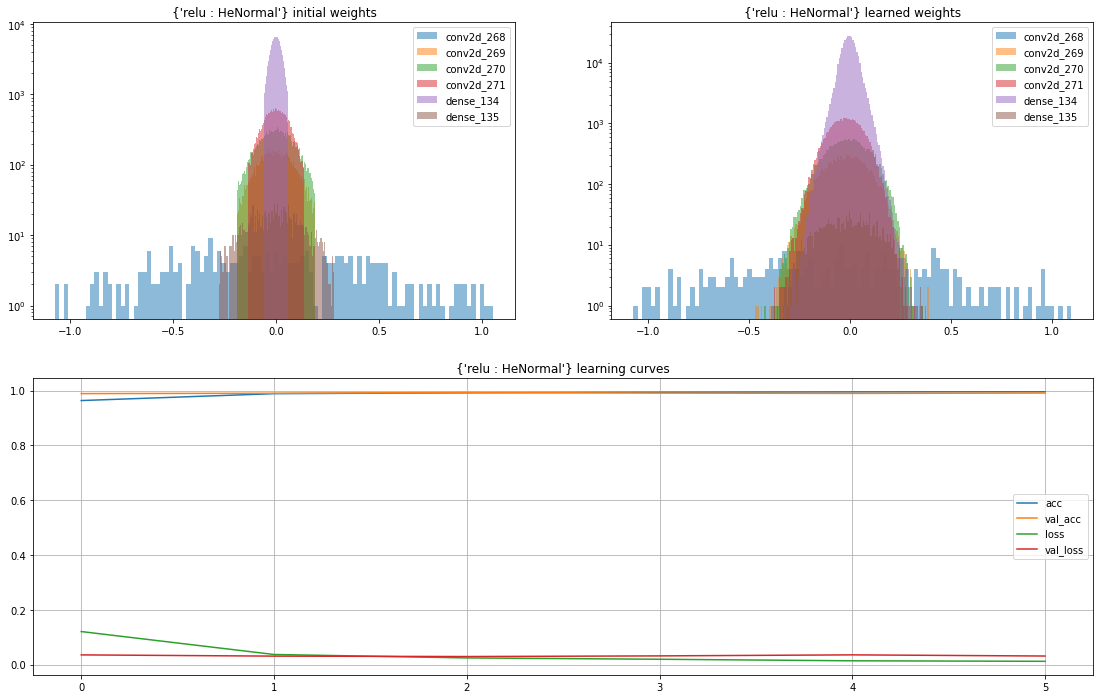

____________________ <keras.engine.sequential.Sequential object at 0x7f42d6f894d0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.9928


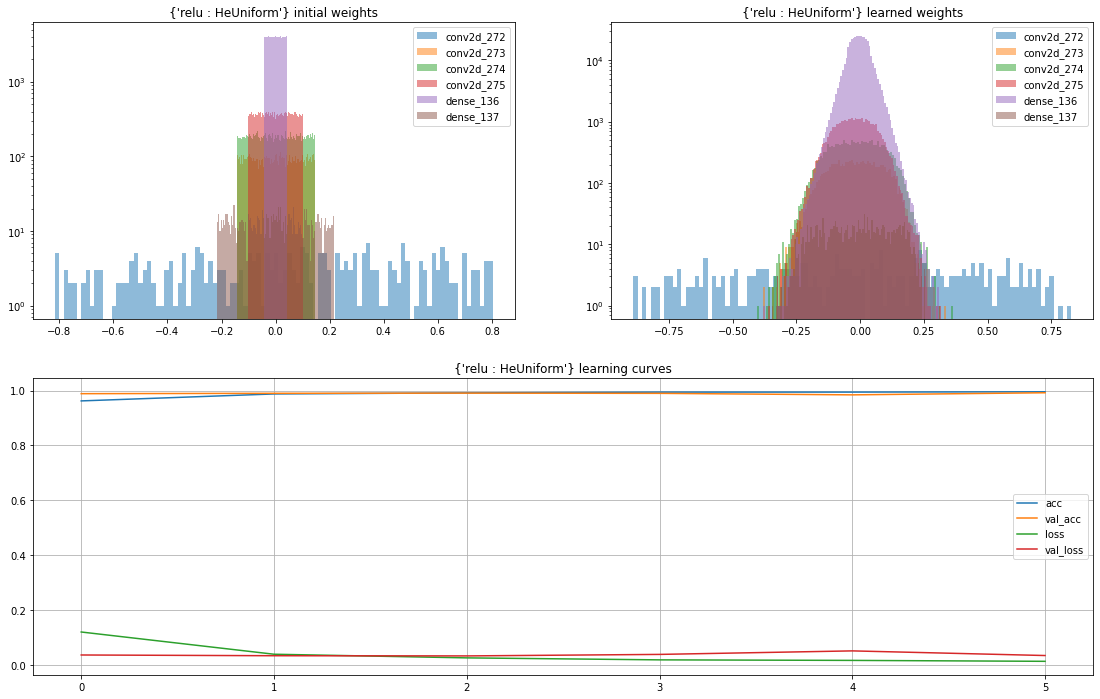

____________________ <keras.engine.sequential.Sequential object at 0x7f4298e1d390> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9915


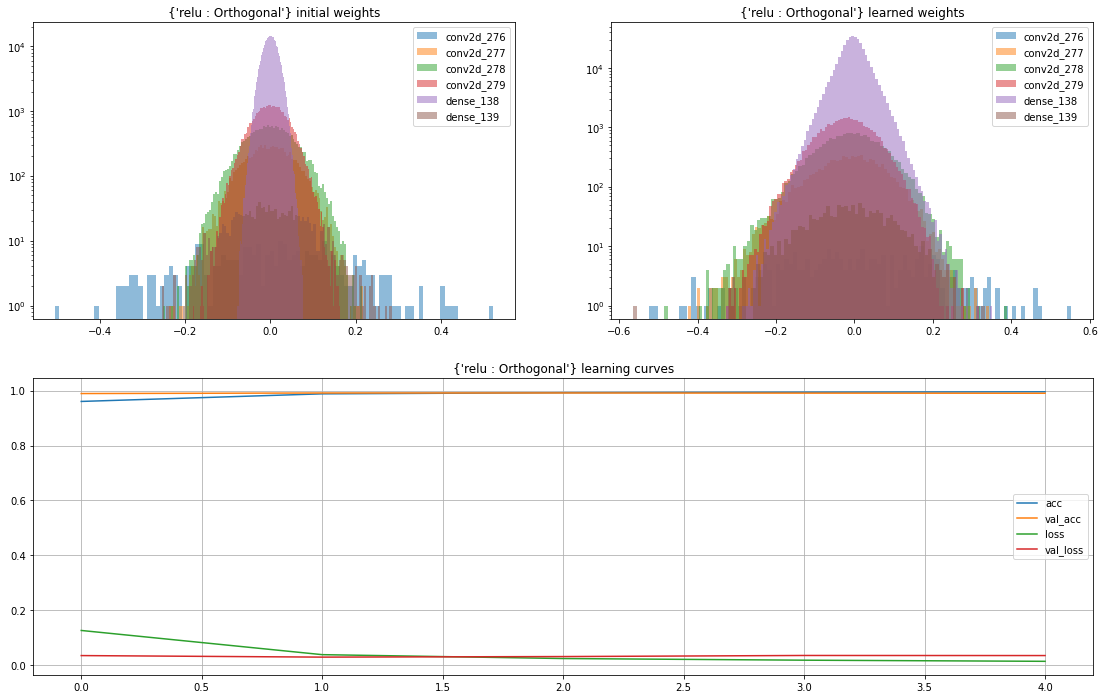

____________________ <keras.engine.sequential.Sequential object at 0x7f42067e2a90> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3039 - accuracy: 0.1010


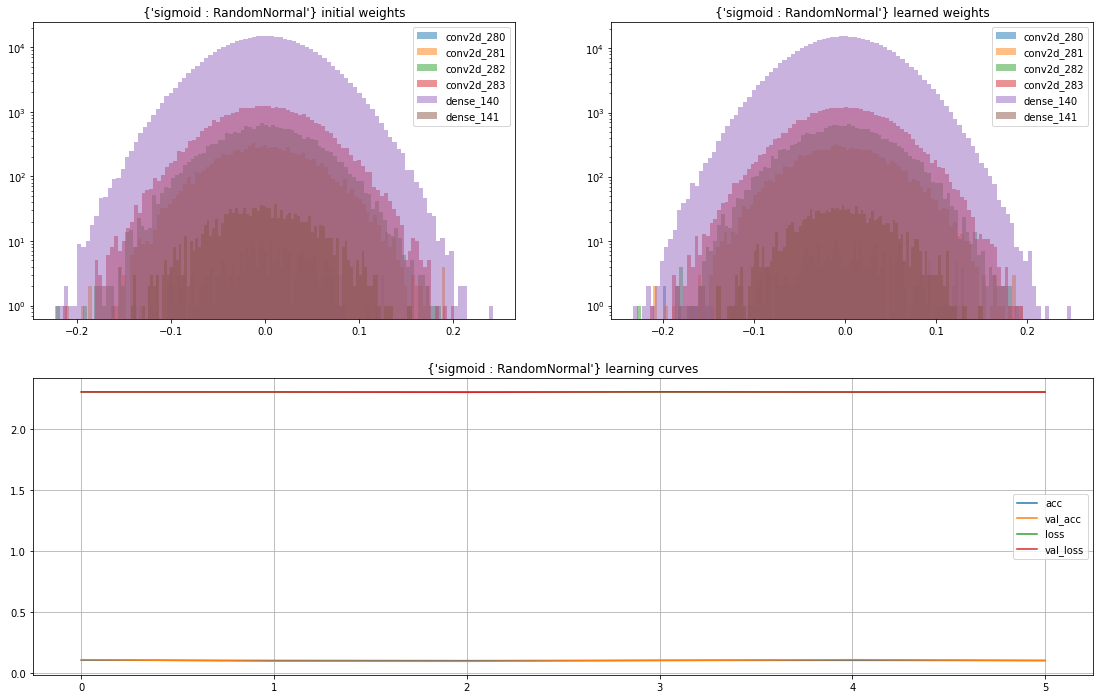

____________________ <keras.engine.sequential.Sequential object at 0x7f42bfc05750> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0312 - accuracy: 0.9900


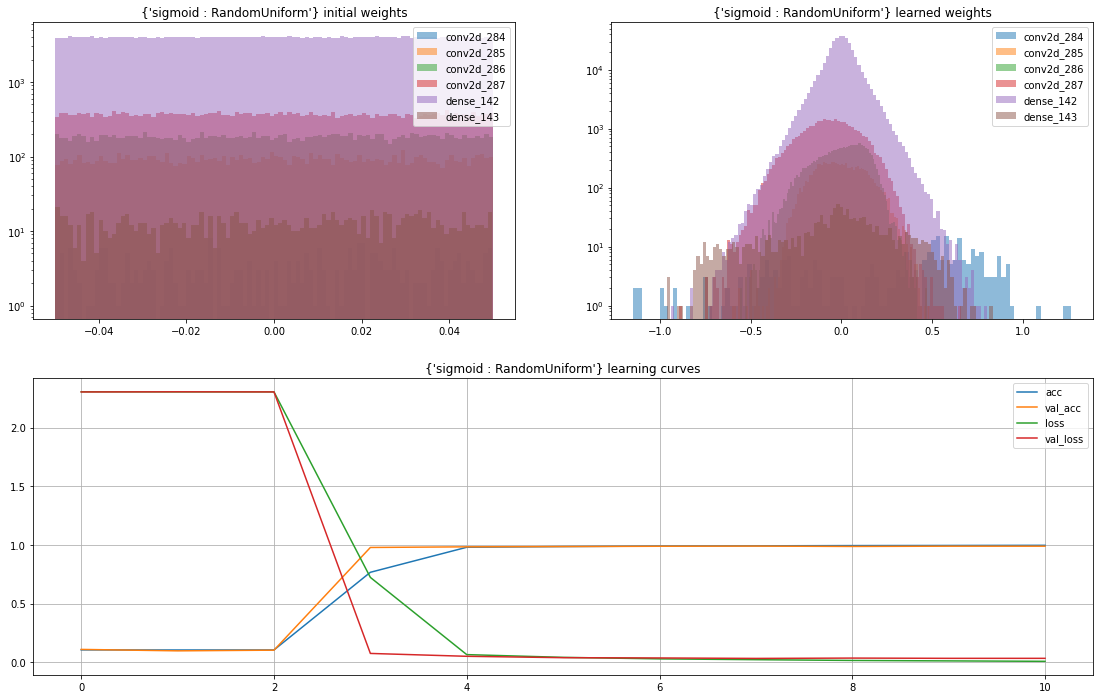

____________________ <keras.engine.sequential.Sequential object at 0x7f41fca982d0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3039 - accuracy: 0.1010


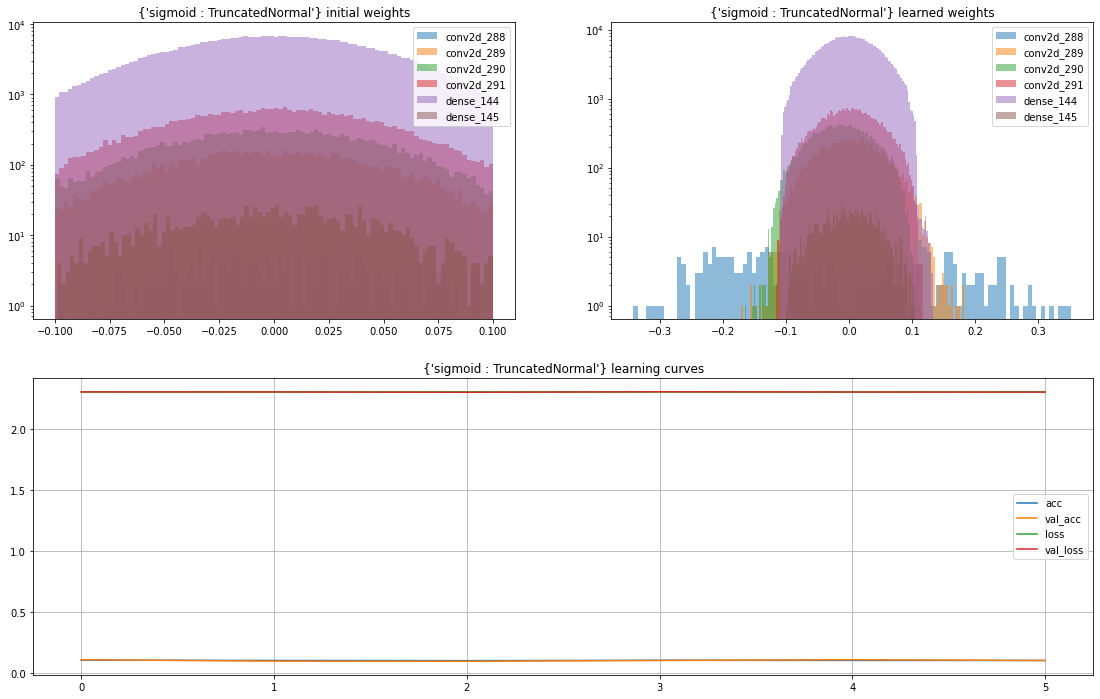

____________________ <keras.engine.sequential.Sequential object at 0x7f4298d319d0> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1135


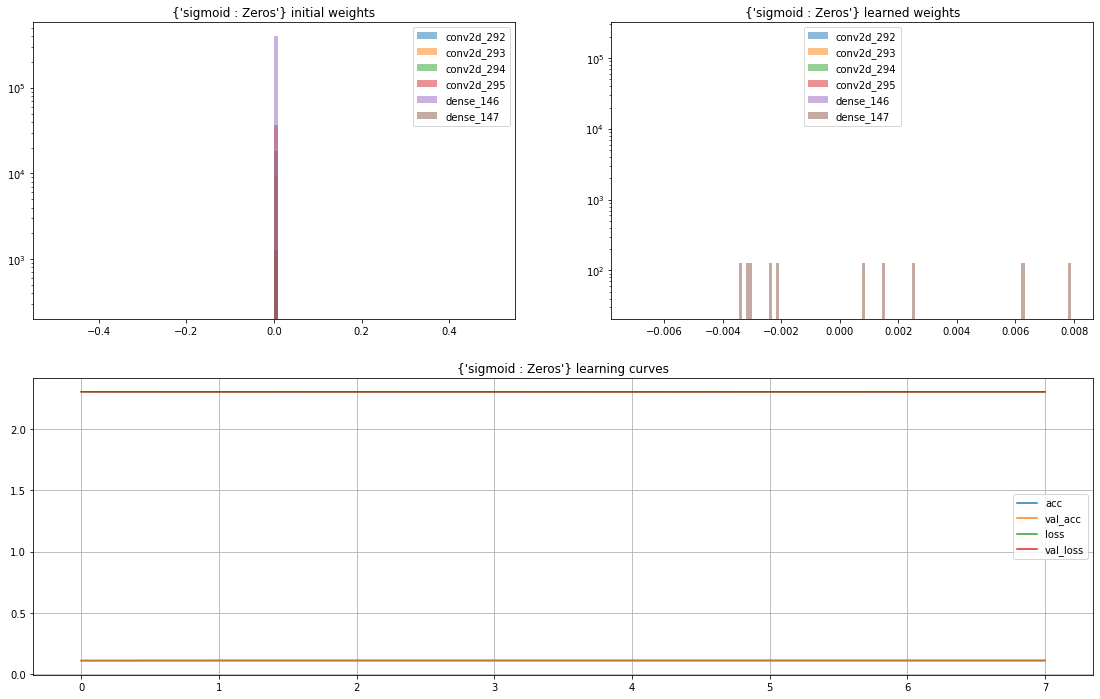

____________________ <keras.engine.sequential.Sequential object at 0x7f42be14b990> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3143 - accuracy: 0.0974


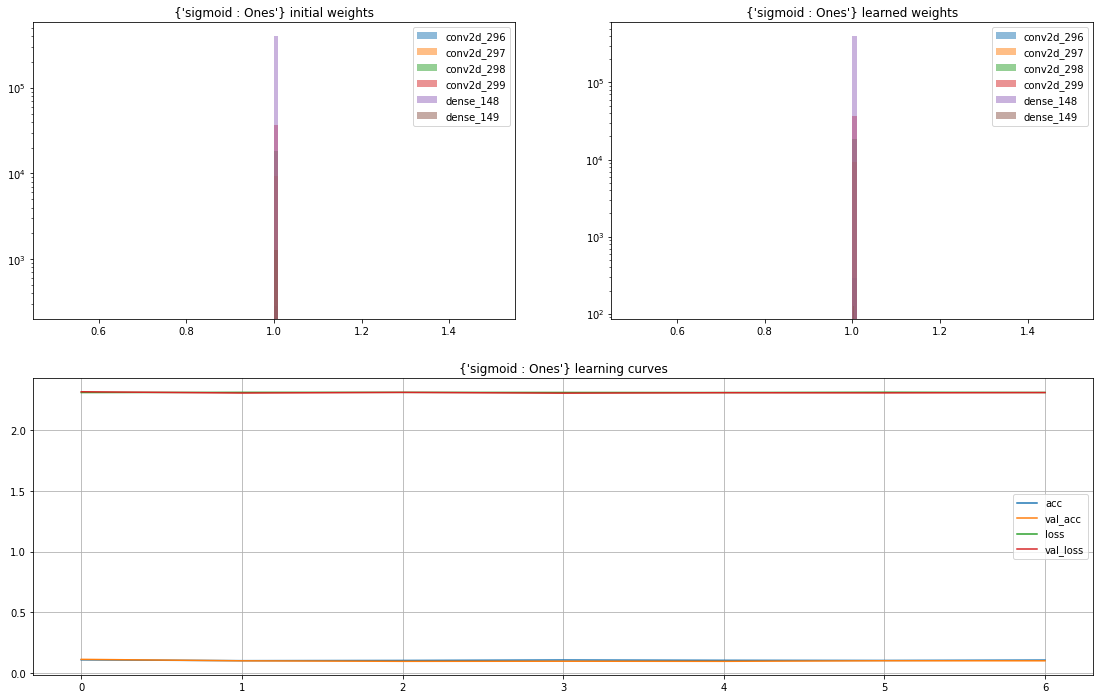

____________________ <keras.engine.sequential.Sequential object at 0x7f42bf86bdd0> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0300 - accuracy: 0.9906


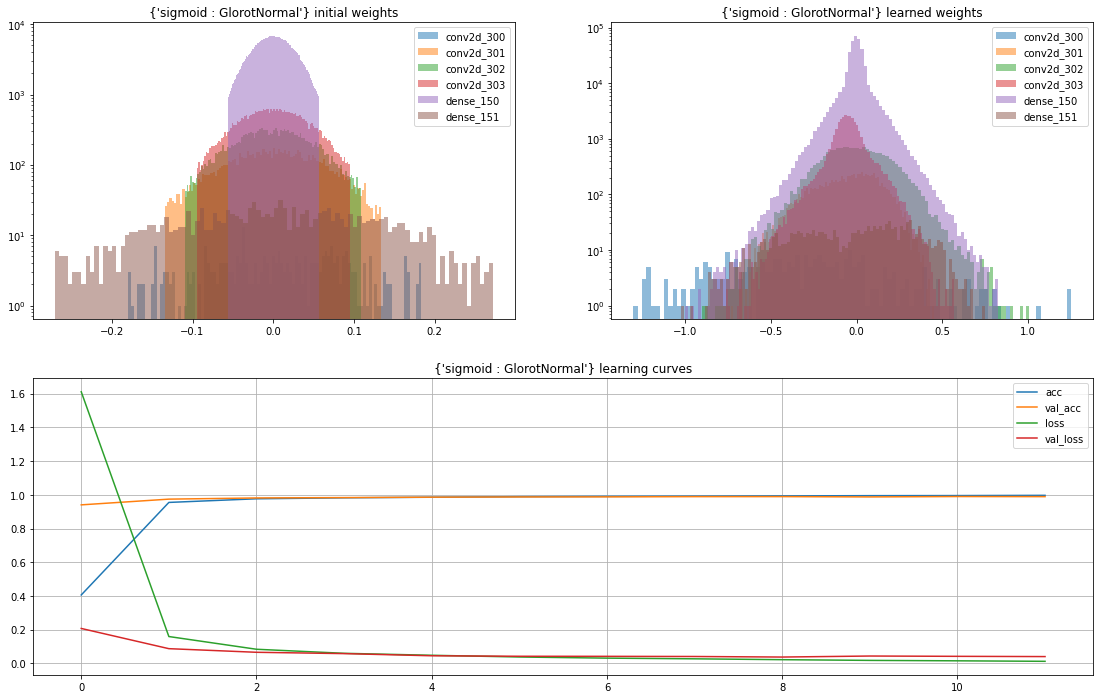

____________________ <keras.engine.sequential.Sequential object at 0x7f42d689fa50> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9897


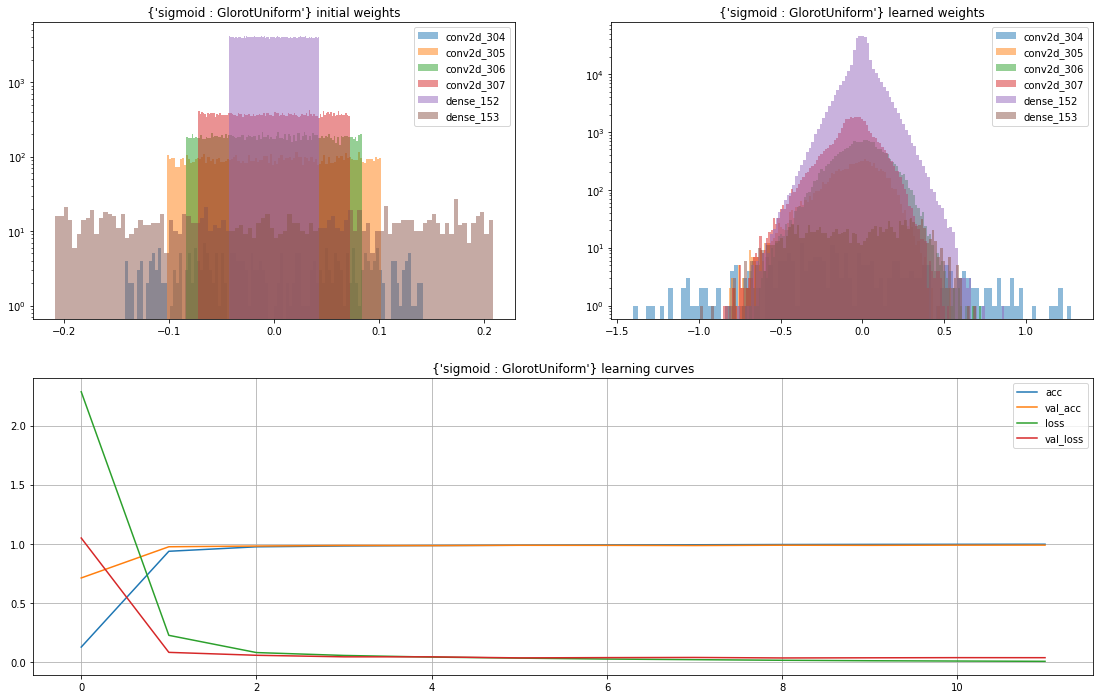

____________________ <keras.engine.sequential.Sequential object at 0x7f42be045690> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9904


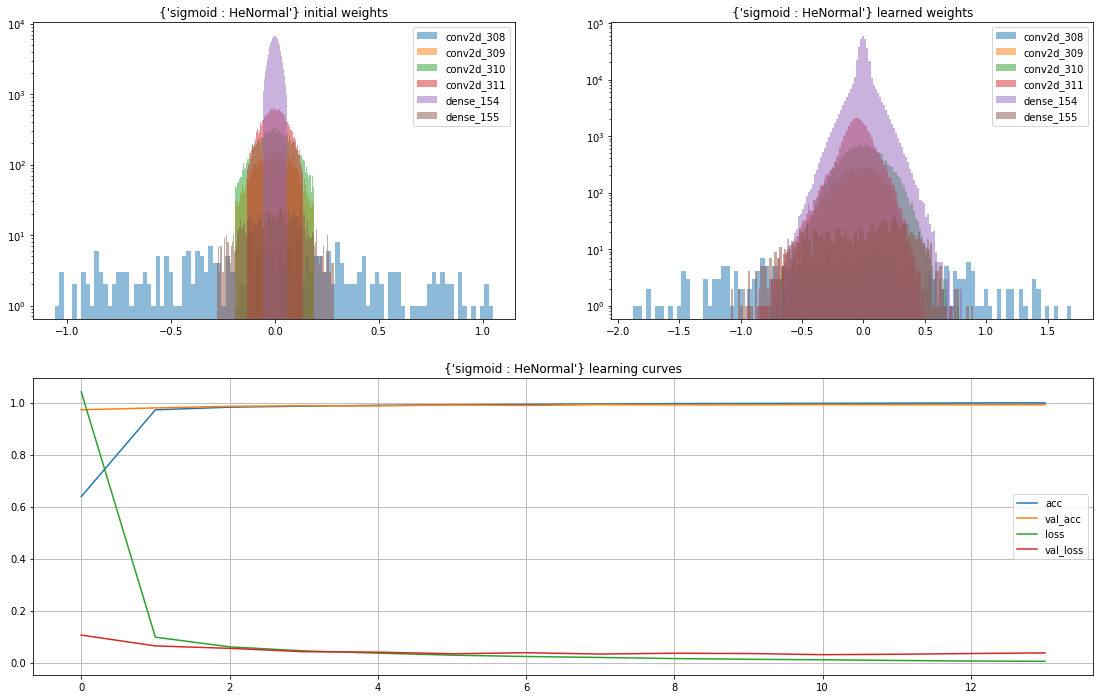

____________________ <keras.engine.sequential.Sequential object at 0x7f42d6bf2850> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9898


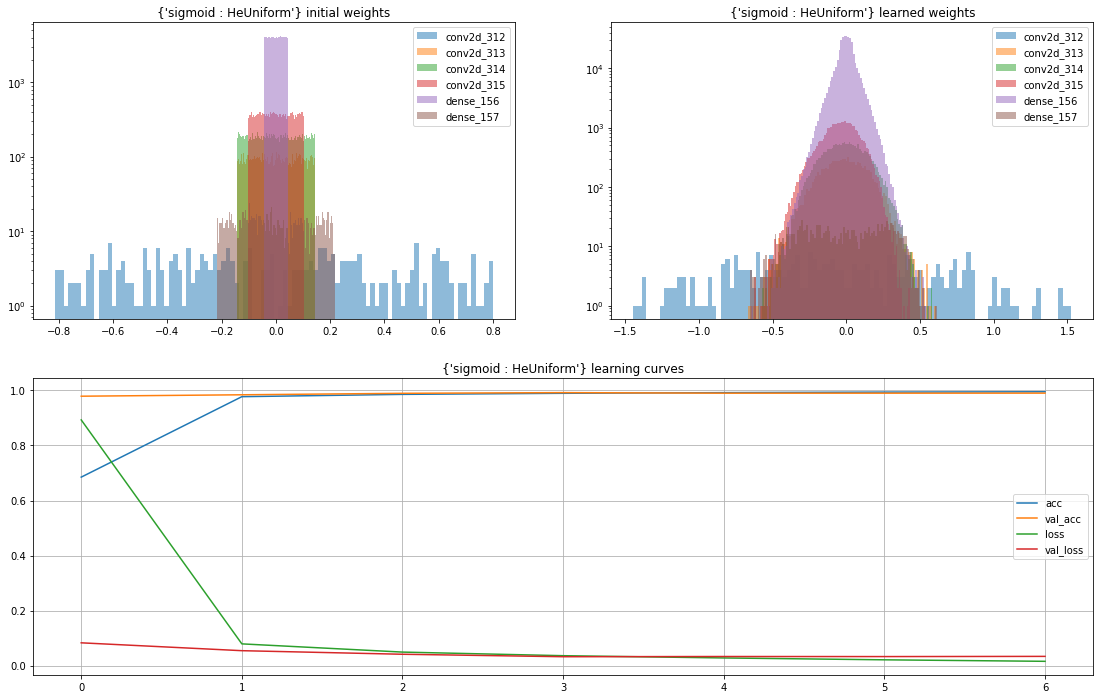

____________________ <keras.engine.sequential.Sequential object at 0x7f41fc9fdc90> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9892


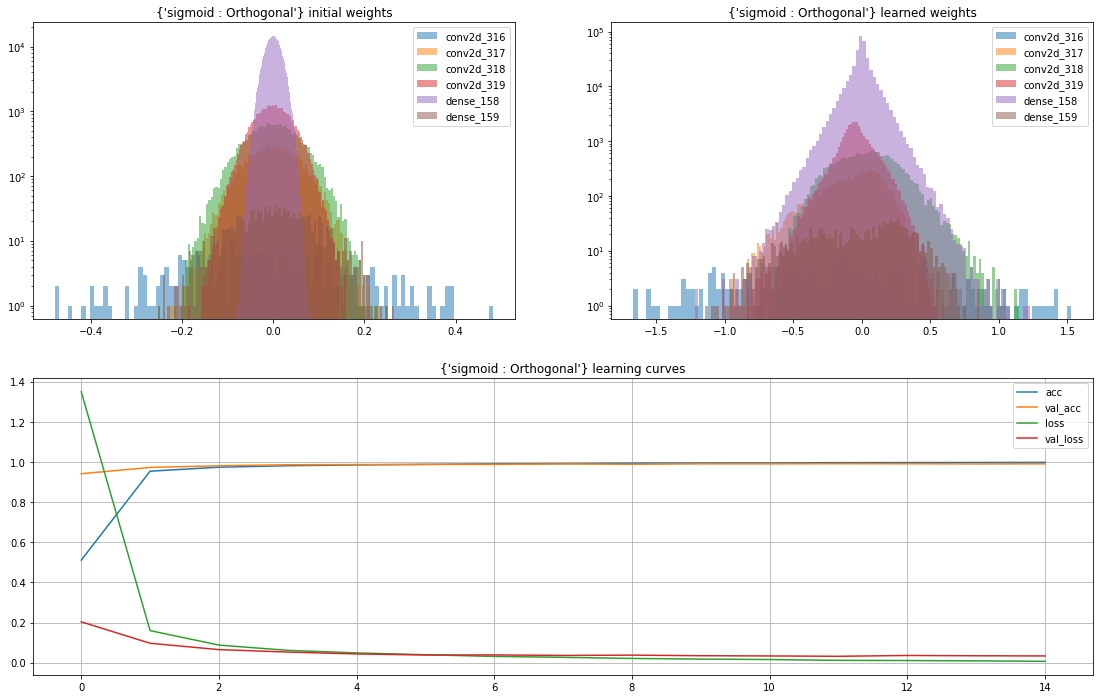

____________________ <keras.engine.sequential.Sequential object at 0x7f42362bc150> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0358 - accuracy: 0.9887


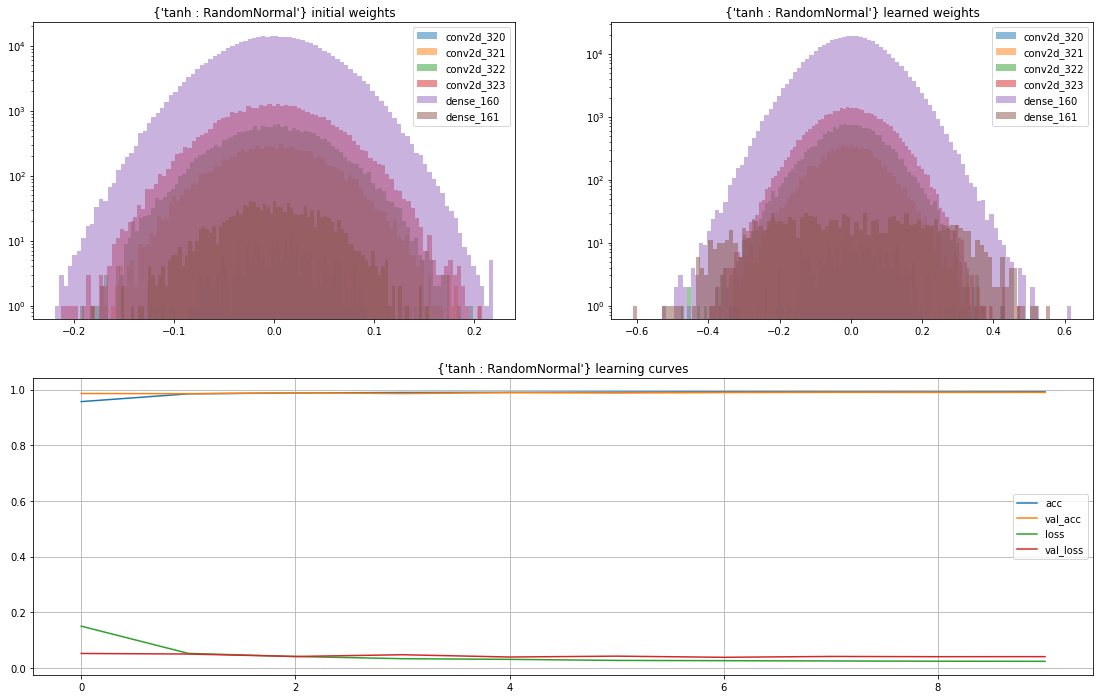

____________________ <keras.engine.sequential.Sequential object at 0x7f4202212250> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9874


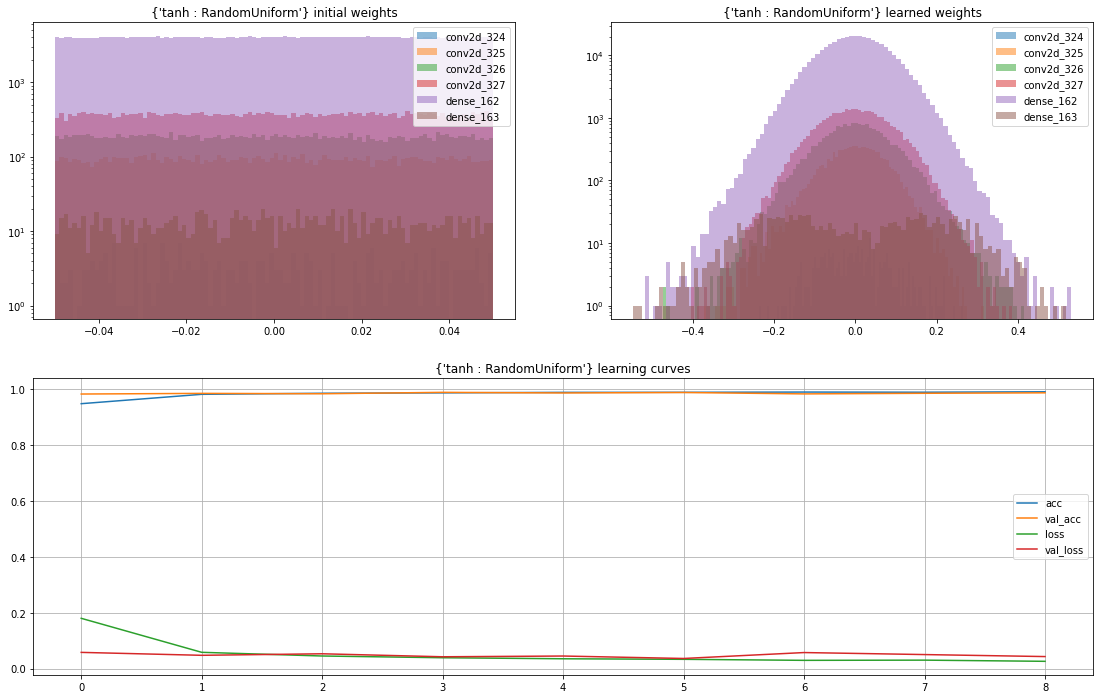

____________________ <keras.engine.sequential.Sequential object at 0x7f42be2e8050> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9889


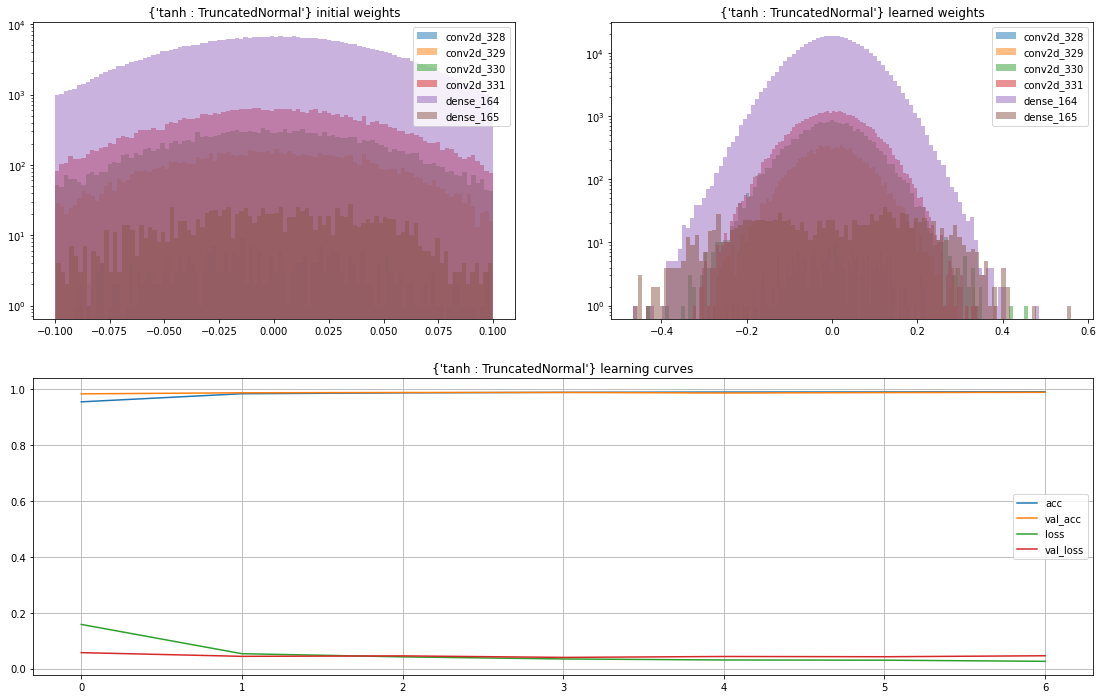

____________________ <keras.engine.sequential.Sequential object at 0x7f4202660c10> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1135


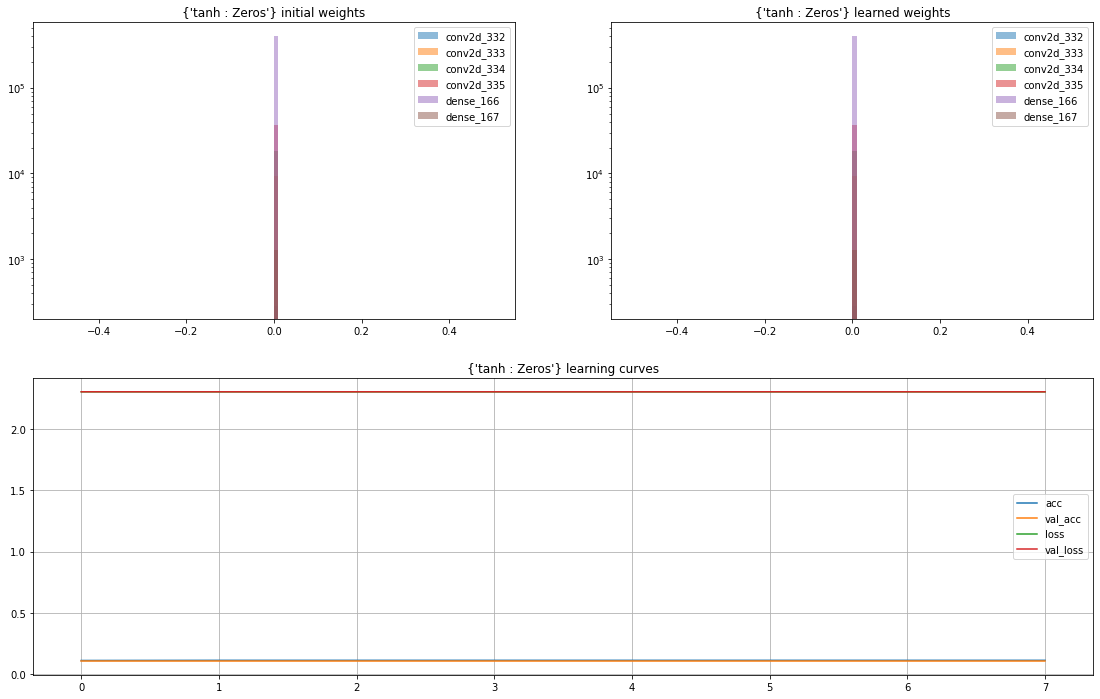

____________________ <keras.engine.sequential.Sequential object at 0x7f420e8ae690> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3143 - accuracy: 0.0974


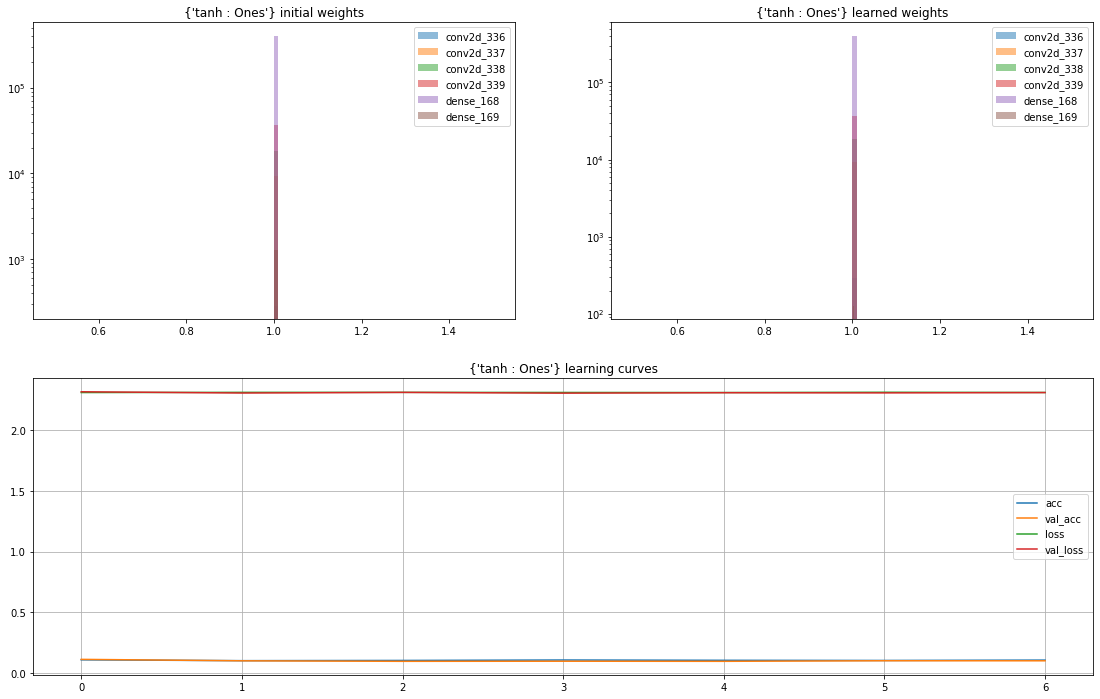

____________________ <keras.engine.sequential.Sequential object at 0x7f42ec07ef90> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9881


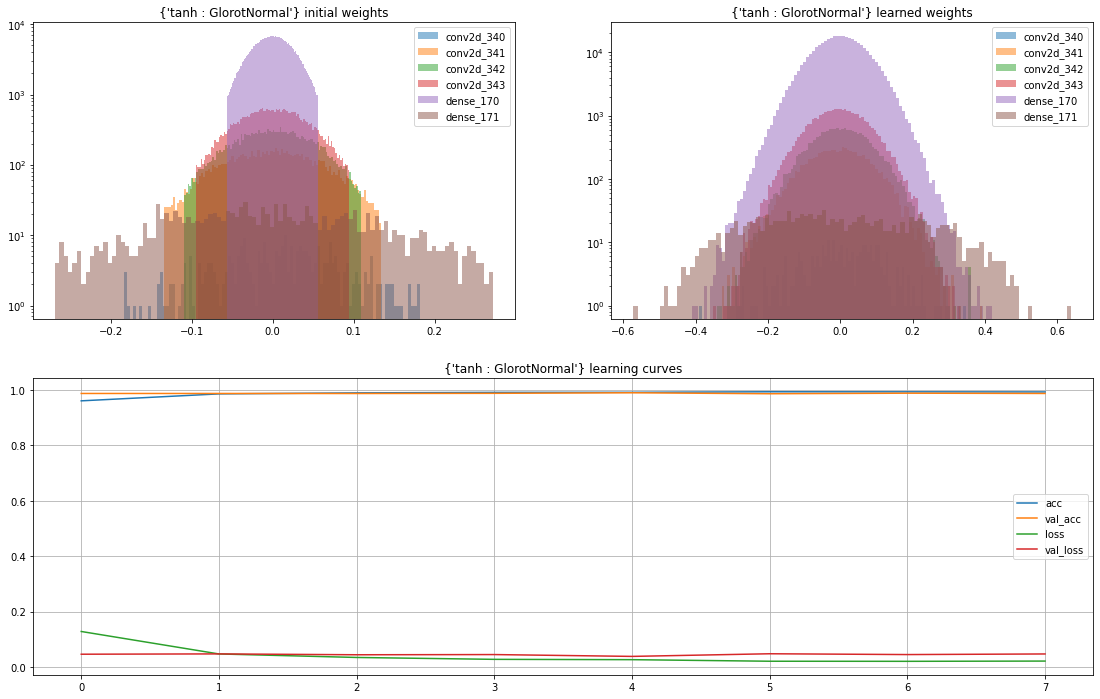

____________________ <keras.engine.sequential.Sequential object at 0x7f41f9767b90> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9870


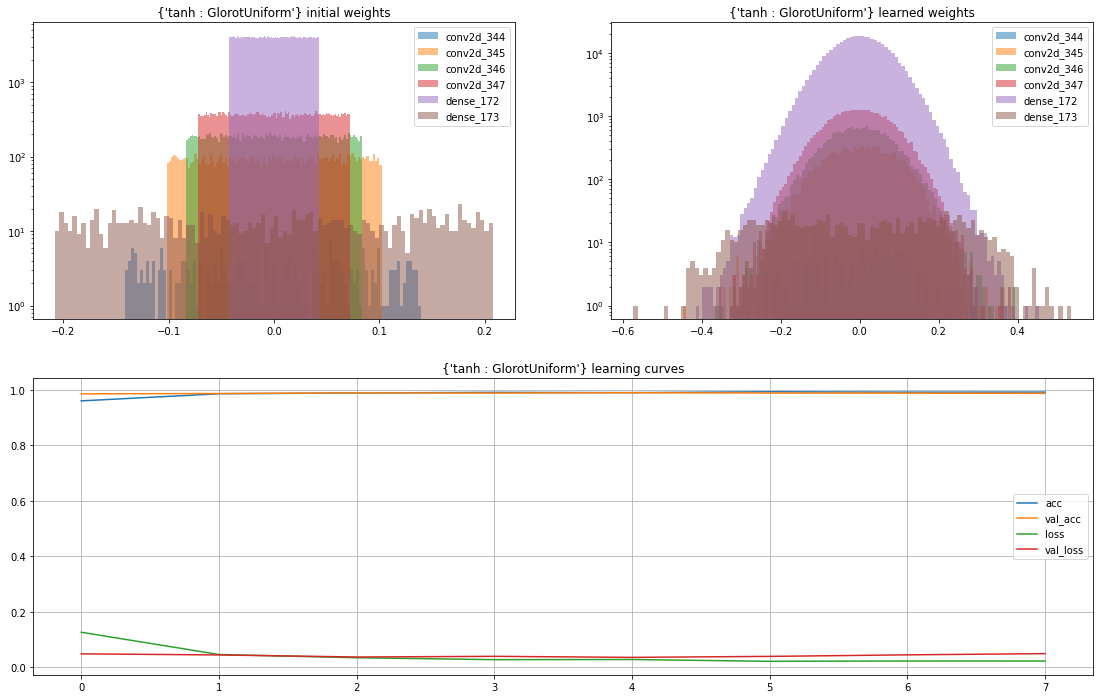

____________________ <keras.engine.sequential.Sequential object at 0x7f4206a74190> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0467 - accuracy: 0.9840


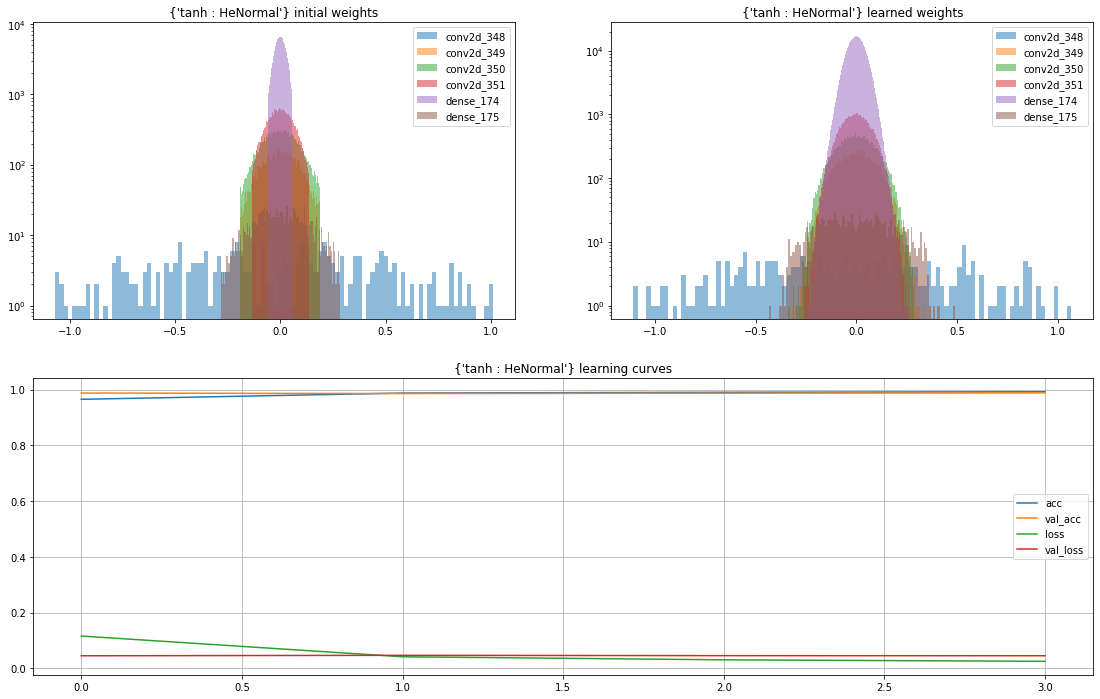

____________________ <keras.engine.sequential.Sequential object at 0x7f41fceee850> ____________________
313/313 [==============================] - 1s 4ms/step - loss: 0.0383 - accuracy: 0.9874


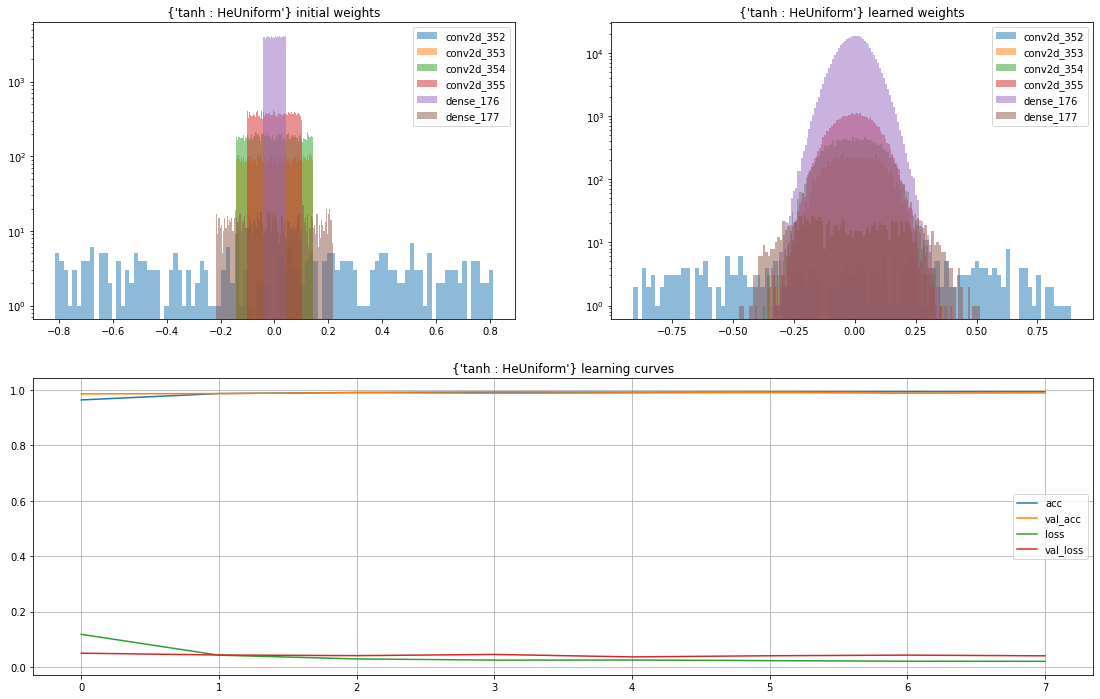

____________________ <keras.engine.sequential.Sequential object at 0x7f42bfa3d890> ____________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9891


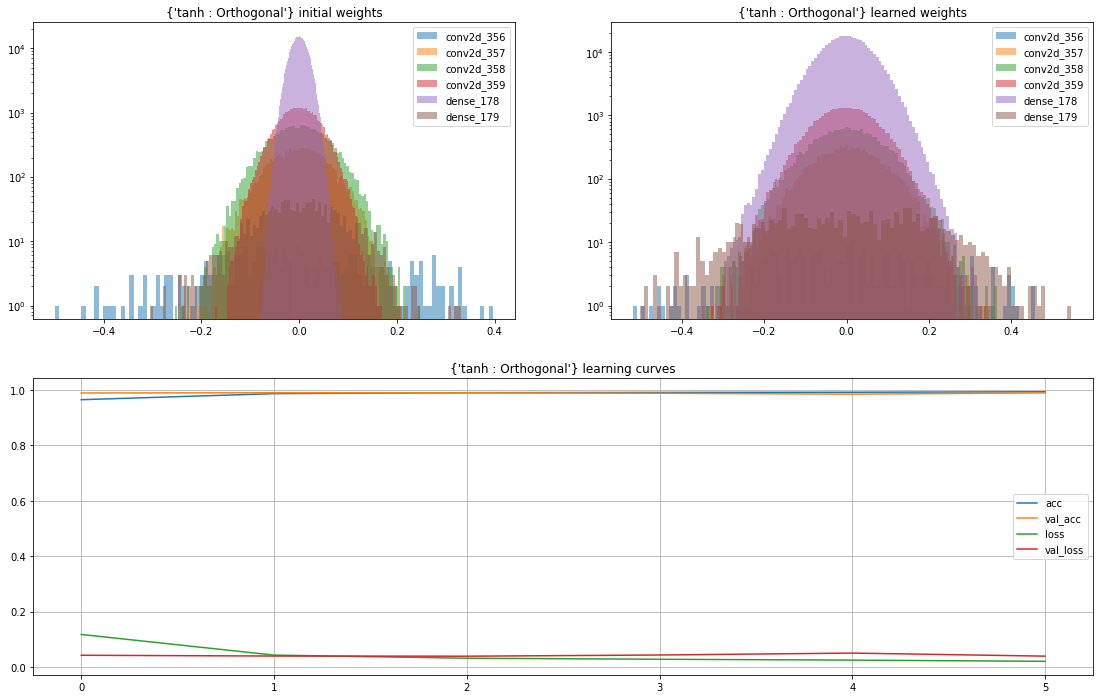

In [36]:
all_models=[]
for act in activation:
  models=[]
  for cfg in initializers:
    models.append(create_model(act,cfg))
  all_models.append(models)  
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)  
all_evalutes=[]
for i,Lst in enumerate(all_models):
  evalutes=[]
  for j,model in enumerate(Lst):
    if("class_name" in initializers[j]):
      title={activation[i]+" : "+initializers[j]["class_name"]}
    else:
      title={activation[i]+" : "+initializers[j]} 
      
    print('_'*20, model, '_'*20) # Print model name to separate plots

    # Creating plot of layers weights before train process
    fig = plt.figure(figsize = (19, 12))
    gs = gridspec.GridSpec(2, 2)
    ax = fig.add_subplot(gs[0, 0])
    plot_weights(model,f'{title} initial weights')

    # Training model
    history=model.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_split = 0.1, verbose = 0,callbacks=[es])

    # Predicting test data and creating submission file
    eva = model.evaluate(X_test,y_test)
    evalutes.append(eva)

    # Creating plot of layers weights after training process
    ax = fig.add_subplot(gs[0, 1])
    plot_weights(model,f'{title} learned weights')    

    # Plot learning curves
    ax = fig.add_subplot(gs[1, :])
    learning_curves(history.history, title)
    plt.show()
  all_evalutes.append(evalutes)
      

Result After 20 epochs

In [37]:
columns=['RandomNormal','RandomUniform',  'TruncatedNormal', 'Zeros','Ones','GlorotNormal','GlorotUniform', 'HeNormal','HeUniform','Orthogonal'] 
import pandas as pd
df_acc = pd.DataFrame(np.array(all_evalutes)[:,:,1], columns=columns,index=activation)
df_loss = pd.DataFrame(np.array(all_evalutes)[:,:,0], columns=columns,index=activation)


In [38]:
df_acc

RandomNormal  RandomUniform  TruncatedNormal   Zeros    Ones  \
relu           0.9927         0.9915           0.9908  0.1135  0.1147   
sigmoid        0.1010         0.9900           0.1010  0.1135  0.0974   
tanh           0.9887         0.9874           0.9889  0.1135  0.0974   

         GlorotNormal  GlorotUniform  HeNormal  HeUniform  Orthogonal  
relu           0.9917         0.9911    0.9913     0.9928      0.9915  
sigmoid        0.9906         0.9897    0.9904     0.9898      0.9892  
tanh           0.9881         0.9870    0.9840     0.9874      0.9891

In [39]:
df_loss

RandomNormal  RandomUniform  TruncatedNormal     Zeros      Ones  \
relu         0.026049       0.029829         0.033007  2.301003  2.719579   
sigmoid      2.303899       0.031236         2.303879  2.301003  2.314321   
tanh         0.035756       0.036073         0.035132  2.301003  2.314322   

         GlorotNormal  GlorotUniform  HeNormal  HeUniform  Orthogonal  
relu         0.028600       0.032183  0.032490   0.025270    0.030581  
sigmoid      0.030039       0.030129  0.029513   0.029473    0.035035  
tanh         0.034102       0.039202  0.046656   0.038336    0.031868